In [1]:
import numpy
import os
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')
import cv2
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [8]:
import xml.etree.ElementTree as ET
seed = 7
numpy.random.seed(seed)
size = (100, 100)
images = []
annotations = []
pos=[]
posplate = []
image_dir = r'C:\Users\kshruth\Documents\automated parking\UFPR-ALPR dataset\training'
folder_dir = os.listdir(image_dir)
print(folder_dir)
for file in folder_dir:
    path = os.path.join(image_dir,file)
    files = os.listdir(path)
    for each_file in files:
        imagepath = os.path.join(path,each_file)
        if imagepath.endswith('.png'):
            img = cv2.imread(imagepath)
            height, width, channels = img.shape
            img = cv2.resize(img,size)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            images.append(img)
            
            y_scale = 100/height
            x_scale = 100/width
        elif imagepath.endswith('.txt'):
            with open(imagepath, "r") as file: 
                data = file.readlines()
                elements = []
                for line in data: 
                    word = line.split() 
                    elements.append(word)
                l = len(elements)
                print(elements)
            for i in range(0,l):    
                if(elements[i][0]=='position_plate:'):
                    position1 = []
                    for j in range(1,5):
                        if(j==1 or j==3):
                            position1.append(x_scale*int(elements[i][j]))
                        elif(j==2 or j==4):
                            position1.append(y_scale*int(elements[i][j]))
            
            posplate.append(position1)

print(posplate)
print(len(images))
print(len(posplate))

['track0001', 'track0002', 'track0003', 'track0004', 'track0005', 'track0006', 'track0007', 'track0008', 'track0009', 'track0010', 'track0011', 'track0012', 'track0013', 'track0014', 'track0015', 'track0016', 'track0017', 'track0018', 'track0019', 'track0020', 'track0021', 'track0022', 'track0023', 'track0024', 'track0025', 'track0026', 'track0027', 'track0028', 'track0029', 'track0030', 'track0031', 'track0032', 'track0033', 'track0034', 'track0035', 'track0036', 'track0037', 'track0038', 'track0039', 'track0040', 'track0041', 'track0042', 'track0043', 'track0044', 'track0045', 'track0046', 'track0047', 'track0048', 'track0049', 'track0050', 'track0051', 'track0052', 'track0053', 'track0054', 'track0055', 'track0056', 'track0057', 'track0058', 'track0059', 'track0060', 'track0061', 'track0062', 'track0063', 'track0064', 'track0065', 'track0066', 'track0067', 'track0068', 'track0069', 'track0070', 'track0071', 'track0072', 'track0073', 'track0074', 'track0075', 'track0076', 'track0077'

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '909', '337', '279', '262'], ['type:', 'car'], ['make:', 'Suzuki'], ['model:', 'Grand', 'Vitara'], ['year:', '2013'], ['plate:', 'AXV-8804'], ['position_plate:', '998', '529', '65', '24'], ['char', '1:', '1000', '535', '8', '12'], ['char', '2:', '1008', '535', '8', '13'], ['char', '3:', '1016', '535', '7', '13'], ['char', '4:', '1027', '537', '8', '12'], ['char', '5:', '1035', '537', '7', '12'], ['char', '6:', '1043', '537', '7', '13'], ['char', '7:', '1051', '538', '6', '12']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '917', '338', '278', '260'], ['type:', 'car'], ['make:', 'Suzuki'], ['model:', 'Grand', 'Vitara'], ['year:', '2013'], ['plate:', 'AXV-8804'], ['position_plate:', '1006', '530', '64', '24'], ['char', '1:', '1008', '535', '8', '13'], ['char', '2:', '1016', '535', '8', '13'], ['char', '3:', '1024', '536', '8', '12'], ['char', '4:', '1035', '537', '8', '12'], ['char', '5:', '1043', '537', '

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '1075', '329', '280', '250'], ['type:', 'car'], ['make:', 'Suzuki'], ['model:', 'Grand', 'Vitara'], ['year:', '2013'], ['plate:', 'AXV-8804'], ['position_plate:', '1152', '506', '57', '25'], ['char', '1:', '1154', '511', '7', '12'], ['char', '2:', '1161', '512', '8', '12'], ['char', '3:', '1169', '512', '7', '12'], ['char', '4:', '1179', '514', '7', '12'], ['char', '5:', '1186', '516', '7', '11'], ['char', '6:', '1193', '517', '7', '11'], ['char', '7:', '1201', '518', '5', '11']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '786', '359', '249', '197'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Cruze'], ['year:', '2012'], ['plate:', 'AVL-8477'], ['position_plate:', '883', '451', '63', '21'], ['char', '1:', '887', '457', '7', '12'], ['char', '2:', '894', '456', '7', '13'], ['char', '3:', '901', '456', '8', '13'], ['char', '4:', '913', '457', '7', '13'], ['char', '5:', '920', '457', '7', '

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '779', '353', '263', '209'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Cruze'], ['year:', '2012'], ['plate:', 'AVL-8477'], ['position_plate:', '883', '451', '67', '23'], ['char', '1:', '887', '456', '8', '14'], ['char', '2:', '895', '457', '8', '13'], ['char', '3:', '903', '458', '8', '12'], ['char', '4:', '915', '458', '8', '12'], ['char', '5:', '923', '459', '7', '12'], ['char', '6:', '931', '459', '7', '12'], ['char', '7:', '938', '459', '7', '12']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '780', '353', '263', '211'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Cruze'], ['year:', '2012'], ['plate:', 'AVL-8477'], ['position_plate:', '882', '451', '68', '23'], ['char', '1:', '886', '457', '8', '13'], ['char', '2:', '894', '457', '8', '13'], ['char', '3:', '902', '458', '8', '12'], ['char', '4:', '915', '458', '7', '13'], ['char', '5:', '922', '458', '8', '13'], ['ch

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '739', '319', '311', '293'], ['type:', 'car'], ['make:', 'Fiat'], ['model:', 'Palio', 'Weekend'], ['year:', '2011'], ['plate:', 'AEI-6611'], ['position_plate:', '851', '468', '90', '31'], ['char', '1:', '858', '479', '10', '15'], ['char', '2:', '868', '478', '11', '16'], ['char', '3:', '881', '478', '4', '16'], ['char', '4:', '894', '479', '9', '15'], ['char', '5:', '904', '479', '10', '15'], ['char', '6:', '917', '479', '4', '16'], ['char', '7:', '927', '479', '4', '16']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '740', '320', '312', '294'], ['type:', 'car'], ['make:', 'Fiat'], ['model:', 'Palio', 'Weekend'], ['year:', '2011'], ['plate:', 'AEI-6611'], ['position_plate:', '851', '469', '91', '31'], ['char', '1:', '859', '480', '9', '16'], ['char', '2:', '869', '480', '10', '16'], ['char', '3:', '882', '480', '4', '16'], ['char', '4:', '894', '480', '10', '16'], ['char', '5:', '905', '480', '10', '16']

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '743', '310', '314', '298'], ['type:', 'car'], ['make:', 'Fiat'], ['model:', 'Palio', 'Weekend'], ['year:', '2011'], ['plate:', 'AEI-6611'], ['position_plate:', '858', '460', '90', '32'], ['char', '1:', '865', '471', '9', '15'], ['char', '2:', '875', '471', '11', '16'], ['char', '3:', '888', '471', '5', '16'], ['char', '4:', '901', '472', '10', '15'], ['char', '5:', '911', '472', '11', '15'], ['char', '6:', '924', '472', '5', '16'], ['char', '7:', '934', '472', '5', '17']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '743', '309', '312', '299'], ['type:', 'car'], ['make:', 'Fiat'], ['model:', 'Palio', 'Weekend'], ['year:', '2011'], ['plate:', 'AEI-6611'], ['position_plate:', '857', '459', '90', '33'], ['char', '1:', '864', '470', '10', '15'], ['char', '2:', '874', '470', '11', '15'], ['char', '3:', '887', '470', '5', '16'], ['char', '4:', '900', '471', '11', '16'], ['char', '5:', '910', '471', '11', '16'

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '783', '355', '201', '179'], ['type:', 'car'], ['make:', 'Fiat'], ['model:', 'Palio'], ['year:', '2010'], ['plate:', 'ASG-3793'], ['position_plate:', '856', '478', '55', '20'], ['char', '1:', '859', '485', '6', '10'], ['char', '2:', '865', '485', '6', '10'], ['char', '3:', '871', '485', '7', '9'], ['char', '4:', '882', '485', '6', '10'], ['char', '5:', '888', '485', '6', '10'], ['char', '6:', '894', '485', '7', '9'], ['char', '7:', '901', '485', '6', '9']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '785', '356', '200', '180'], ['type:', 'car'], ['make:', 'Fiat'], ['model:', 'Palio'], ['year:', '2010'], ['plate:', 'ASG-3793'], ['position_plate:', '856', '479', '55', '19'], ['char', '1:', '859', '486', '6', '10'], ['char', '2:', '865', '485', '7', '11'], ['char', '3:', '872', '485', '7', '11'], ['char', '4:', '882', '485', '6', '11'], ['char', '5:', '888', '485', '6', '10'], ['char', '6:', '895', '485', 

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '788', '357', '201', '179'], ['type:', 'car'], ['make:', 'Fiat'], ['model:', 'Palio'], ['year:', '2010'], ['plate:', 'ASG-3793'], ['position_plate:', '862', '482', '54', '19'], ['char', '1:', '865', '488', '5', '10'], ['char', '2:', '871', '488', '6', '10'], ['char', '3:', '877', '488', '7', '10'], ['char', '4:', '887', '488', '7', '10'], ['char', '5:', '894', '488', '6', '10'], ['char', '6:', '900', '488', '6', '10'], ['char', '7:', '906', '488', '7', '10']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '791', '359', '201', '178'], ['type:', 'car'], ['make:', 'Fiat'], ['model:', 'Palio'], ['year:', '2010'], ['plate:', 'ASG-3793'], ['position_plate:', '864', '483', '54', '19'], ['char', '1:', '866', '490', '7', '10'], ['char', '2:', '873', '490', '6', '10'], ['char', '3:', '879', '490', '7', '10'], ['char', '4:', '889', '489', '7', '11'], ['char', '5:', '896', '490', '6', '10'], ['char', '6:', '902', '489

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '777', '339', '266', '248'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Fox'], ['year:', '2007'], ['plate:', 'AOM-8734'], ['position_plate:', '879', '503', '65', '21'], ['char', '1:', '881', '510', '8', '11'], ['char', '2:', '890', '511', '8', '10'], ['char', '3:', '898', '510', '9', '12'], ['char', '4:', '909', '510', '8', '11'], ['char', '5:', '917', '511', '8', '10'], ['char', '6:', '925', '511', '8', '11'], ['char', '7:', '934', '511', '7', '11']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '776', '338', '270', '248'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Fox'], ['year:', '2007'], ['plate:', 'AOM-8734'], ['position_plate:', '879', '503', '65', '22'], ['char', '1:', '881', '511', '8', '11'], ['char', '2:', '890', '511', '8', '11'], ['char', '3:', '898', '511', '9', '11'], ['char', '4:', '909', '511', '8', '11'], ['char', '5:', '917', '511', '8', '11'], ['char', '6:', '92

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '768', '343', '274', '256'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Fox'], ['year:', '2007'], ['plate:', 'AOM-8734'], ['position_plate:', '872', '515', '67', '22'], ['char', '1:', '875', '523', '8', '11'], ['char', '2:', '883', '523', '8', '11'], ['char', '3:', '891', '522', '9', '12'], ['char', '4:', '903', '523', '7', '11'], ['char', '5:', '910', '523', '9', '11'], ['char', '6:', '920', '523', '7', '11'], ['char', '7:', '928', '523', '7', '11']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '768', '343', '273', '252'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Fox'], ['year:', '2007'], ['plate:', 'AOM-8734'], ['position_plate:', '872', '513', '67', '22'], ['char', '1:', '874', '521', '9', '11'], ['char', '2:', '883', '521', '7', '11'], ['char', '3:', '891', '521', '8', '11'], ['char', '4:', '902', '521', '8', '11'], ['char', '5:', '910', '521', '8', '11'], ['char', '6:', '91

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '823', '355', '226', '202'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Up'], ['year:', '2014'], ['plate:', 'AYN-8015'], ['position_plate:', '909', '480', '59', '21'], ['char', '1:', '912', '487', '8', '11'], ['char', '2:', '920', '486', '6', '12'], ['char', '3:', '926', '487', '8', '11'], ['char', '4:', '937', '487', '7', '12'], ['char', '5:', '945', '487', '6', '11'], ['char', '6:', '953', '487', '4', '12'], ['char', '7:', '958', '488', '7', '10']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '823', '355', '227', '204'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Up'], ['year:', '2014'], ['plate:', 'AYN-8015'], ['position_plate:', '909', '482', '60', '21'], ['char', '1:', '912', '488', '7', '12'], ['char', '2:', '919', '488', '7', '12'], ['char', '3:', '926', '488', '8', '12'], ['char', '4:', '937', '489', '7', '11'], ['char', '5:', '945', '489', '6', '11'], ['char', '6:', '953'

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '923', '294', '360', '305'], ['type:', 'car'], ['make:', 'Ford'], ['model:', 'Focus', 'Hatch'], ['year:', '2008'], ['plate:', 'AQF-6375'], ['position_plate:', '1069', '421', '98', '35'], ['char', '1:', '1076', '432', '10', '15'], ['char', '2:', '1088', '432', '9', '15'], ['char', '3:', '1098', '432', '11', '16'], ['char', '4:', '1117', '434', '9', '14'], ['char', '5:', '1127', '434', '10', '15'], ['char', '6:', '1139', '435', '9', '15'], ['char', '7:', '1151', '435', '9', '16']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '935', '295', '360', '313'], ['type:', 'car'], ['make:', 'Ford'], ['model:', 'Focus', 'Hatch'], ['year:', '2008'], ['plate:', 'AQF-6375'], ['position_plate:', '1081', '422', '98', '34'], ['char', '1:', '1088', '432', '11', '17'], ['char', '2:', '1100', '432', '9', '16'], ['char', '3:', '1111', '433', '10', '16'], ['char', '4:', '1128', '434', '11', '16'], ['char', '5:', '1139', '434', 

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '1059', '306', '378', '304'], ['type:', 'car'], ['make:', 'Ford'], ['model:', 'Focus', 'Hatch'], ['year:', '2008'], ['plate:', 'AQF-6375'], ['position_plate:', '1253', '436', '88', '36'], ['char', '1:', '1258', '445', '10', '16'], ['char', '2:', '1269', '446', '10', '16'], ['char', '3:', '1280', '447', '10', '15'], ['char', '4:', '1296', '449', '10', '15'], ['char', '5:', '1306', '450', '10', '16'], ['char', '6:', '1316', '451', '10', '16'], ['char', '7:', '1327', '452', '9', '16']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '1067', '305', '378', '305'], ['type:', 'car'], ['make:', 'Ford'], ['model:', 'Focus', 'Hatch'], ['year:', '2008'], ['plate:', 'AQF-6375'], ['position_plate:', '1264', '436', '88', '37'], ['char', '1:', '1270', '446', '10', '16'], ['char', '2:', '1281', '447', '10', '15'], ['char', '3:', '1292', '448', '9', '15'], ['char', '4:', '1307', '449', '10', '16'], ['char', '5:', '1317', '4

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '773', '316', '256', '220'], ['type:', 'car'], ['make:', 'Peugeot'], ['model:', '206'], ['year:', '2008'], ['plate:', 'AQU-9177'], ['position_plate:', '876', '421', '68', '24'], ['char', '1:', '881', '429', '7', '11'], ['char', '2:', '889', '429', '7', '12'], ['char', '3:', '896', '429', '9', '12'], ['char', '4:', '909', '430', '7', '11'], ['char', '5:', '919', '429', '3', '12'], ['char', '6:', '925', '430', '7', '12'], ['char', '7:', '933', '430', '7', '12']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '771', '316', '256', '223'], ['type:', 'car'], ['make:', 'Peugeot'], ['model:', '206'], ['year:', '2008'], ['plate:', 'AQU-9177'], ['position_plate:', '874', '422', '69', '24'], ['char', '1:', '879', '429', '7', '13'], ['char', '2:', '887', '429', '8', '13'], ['char', '3:', '895', '429', '8', '13'], ['char', '4:', '907', '430', '8', '12'], ['char', '5:', '917', '430', '4', '12'], ['char', '6:', '923', '4

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '740', '309', '290', '250'], ['type:', 'car'], ['make:', 'Peugeot'], ['model:', '206'], ['year:', '2008'], ['plate:', 'AQU-9177'], ['position_plate:', '860', '427', '78', '25'], ['char', '1:', '866', '435', '8', '14'], ['char', '2:', '874', '435', '10', '14'], ['char', '3:', '884', '435', '9', '14'], ['char', '4:', '898', '436', '8', '12'], ['char', '5:', '909', '435', '4', '14'], ['char', '6:', '916', '435', '8', '14'], ['char', '7:', '925', '436', '8', '13']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '740', '309', '290', '255'], ['type:', 'car'], ['make:', 'Peugeot'], ['model:', '206'], ['year:', '2008'], ['plate:', 'AQU-9177'], ['position_plate:', '860', '428', '78', '26'], ['char', '1:', '866', '437', '8', '14'], ['char', '2:', '875', '437', '8', '13'], ['char', '3:', '884', '436', '9', '15'], ['char', '4:', '898', '437', '9', '13'], ['char', '5:', '910', '437', '3', '13'], ['char', '6:', '915', '

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '673', '261', '325', '276'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Gol'], ['year:', '2012'], ['plate:', 'AVC-5538'], ['position_plate:', '787', '454', '90', '32'], ['char', '1:', '791', '463', '11', '18'], ['char', '2:', '802', '463', '10', '18'], ['char', '3:', '812', '464', '12', '17'], ['char', '4:', '829', '464', '11', '17'], ['char', '5:', '840', '464', '10', '17'], ['char', '6:', '850', '465', '11', '16'], ['char', '7:', '861', '465', '10', '16']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '677', '261', '325', '274'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Gol'], ['year:', '2012'], ['plate:', 'AVC-5538'], ['position_plate:', '790', '454', '90', '31'], ['char', '1:', '793', '463', '12', '18'], ['char', '2:', '805', '463', '11', '18'], ['char', '3:', '816', '464', '10', '16'], ['char', '4:', '832', '464', '11', '17'], ['char', '5:', '843', '464', '10', '17'], ['char

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '680', '265', '334', '280'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Gol'], ['year:', '2012'], ['plate:', 'AVC-5538'], ['position_plate:', '799', '463', '93', '33'], ['char', '1:', '802', '473', '12', '18'], ['char', '2:', '814', '473', '11', '18'], ['char', '3:', '825', '474', '11', '17'], ['char', '4:', '842', '474', '11', '17'], ['char', '5:', '853', '474', '11', '17'], ['char', '6:', '864', '474', '11', '17'], ['char', '7:', '875', '475', '11', '16']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '679', '262', '335', '284'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Gol'], ['year:', '2012'], ['plate:', 'AVC-5538'], ['position_plate:', '794', '461', '96', '32'], ['char', '1:', '799', '471', '12', '17'], ['char', '2:', '811', '470', '11', '18'], ['char', '3:', '822', '472', '12', '16'], ['char', '4:', '839', '472', '11', '16'], ['char', '5:', '850', '472', '11', '17'], ['char

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '693', '206', '305', '282'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Spin'], ['year:', '2016'], ['plate:', 'PYO-6759'], ['position_plate:', '809', '423', '80', '26'], ['char', '1:', '814', '433', '9', '15'], ['char', '2:', '823', '432', '10', '16'], ['char', '3:', '833', '433', '9', '14'], ['char', '4:', '847', '433', '9', '14'], ['char', '5:', '856', '432', '9', '15'], ['char', '6:', '866', '432', '9', '15'], ['char', '7:', '875', '432', '10', '15']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '691', '206', '307', '285'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Spin'], ['year:', '2016'], ['plate:', 'PYO-6759'], ['position_plate:', '808', '425', '80', '27'], ['char', '1:', '813', '434', '9', '15'], ['char', '2:', '822', '434', '9', '15'], ['char', '3:', '832', '434', '9', '15'], ['char', '4:', '846', '434', '9', '14'], ['char', '5:', '856', '434', '8', '14'], ['ch

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '674', '194', '332', '314'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Spin'], ['year:', '2016'], ['plate:', 'PYO-6759'], ['position_plate:', '797', '435', '88', '30'], ['char', '1:', '802', '445', '11', '16'], ['char', '2:', '813', '445', '10', '16'], ['char', '3:', '823', '445', '10', '16'], ['char', '4:', '839', '445', '10', '16'], ['char', '5:', '849', '445', '10', '16'], ['char', '6:', '859', '446', '11', '15'], ['char', '7:', '870', '446', '10', '15']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '673', '194', '334', '315'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Spin'], ['year:', '2016'], ['plate:', 'PYO-6759'], ['position_plate:', '797', '435', '88', '31'], ['char', '1:', '802', '445', '10', '17'], ['char', '2:', '813', '445', '10', '17'], ['char', '3:', '823', '446', '10', '15'], ['char', '4:', '839', '446', '10', '16'], ['char', '5:', '849', '446', '10', '

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '613', '0', '496', '448'], ['type:', 'car'], ['make:', 'Mercedes-Benz'], ['model:', 'OF-1418', 'Neobus', 'Mega'], ['year:', '2011'], ['plate:', 'AVA-1466'], ['position_plate:', '818', '320', '83', '27'], ['char', '1:', '822', '328', '10', '14'], ['char', '2:', '832', '328', '10', '14'], ['char', '3:', '842', '329', '10', '13'], ['char', '4:', '860', '329', '5', '14'], ['char', '5:', '867', '329', '11', '14'], ['char', '6:', '878', '329', '10', '14'], ['char', '7:', '888', '330', '10', '13']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '613', '0', '493', '447'], ['type:', 'car'], ['make:', 'Mercedes-Benz'], ['model:', 'OF-1418', 'Neobus', 'Mega'], ['year:', '2011'], ['plate:', 'AVA-1466'], ['position_plate:', '817', '319', '84', '26'], ['char', '1:', '822', '329', '10', '14'], ['char', '2:', '832', '329', '10', '14'], ['char', '3:', '842', '329', '10', '14'], ['char', '4:', '860', '329', '4', '14'], ['ch

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '753', '198', '129', '343'], ['type:', 'motorcycle'], ['make:', 'Yamaha'], ['model:', 'YBR'], ['year:', '2013'], ['plate:', 'AYB-7892'], ['position_plate:', '794', '393', '48', '42'], ['char', '1:', '802', '406', '8', '13'], ['char', '2:', '813', '404', '9', '14'], ['char', '3:', '825', '403', '9', '13'], ['char', '4:', '800', '419', '9', '14'], ['char', '5:', '810', '418', '8', '13'], ['char', '6:', '819', '417', '8', '13'], ['char', '7:', '828', '416', '8', '13']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '750', '200', '132', '344'], ['type:', 'motorcycle'], ['make:', 'Yamaha'], ['model:', 'YBR'], ['year:', '2013'], ['plate:', 'AYB-7892'], ['position_plate:', '793', '396', '47', '42'], ['char', '1:', '801', '408', '8', '13'], ['char', '2:', '811', '406', '9', '14'], ['char', '3:', '824', '405', '9', '13'], ['char', '4:', '799', '421', '8', '14'], ['char', '5:', '809', '420', '8', '13'], ['char', '6:

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '731', '208', '136', '356'], ['type:', 'motorcycle'], ['make:', 'Yamaha'], ['model:', 'YBR'], ['year:', '2013'], ['plate:', 'AYB-7892'], ['position_plate:', '775', '412', '49', '45'], ['char', '1:', '783', '426', '9', '14'], ['char', '2:', '794', '424', '9', '14'], ['char', '3:', '807', '423', '9', '13'], ['char', '4:', '782', '440', '8', '14'], ['char', '5:', '791', '439', '9', '13'], ['char', '6:', '800', '437', '9', '14'], ['char', '7:', '809', '436', '10', '14']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '733', '210', '138', '356'], ['type:', 'motorcycle'], ['make:', 'Yamaha'], ['model:', 'YBR'], ['year:', '2013'], ['plate:', 'AYB-7892'], ['position_plate:', '775', '411', '49', '45'], ['char', '1:', '782', '425', '9', '14'], ['char', '2:', '794', '423', '9', '14'], ['char', '3:', '807', '422', '9', '13'], ['char', '4:', '782', '439', '8', '14'], ['char', '5:', '791', '437', '9', '15'], ['char', '6

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '713', '208', '279', '258'], ['type:', 'car'], ['make:', 'Fiat'], ['model:', 'Toro'], ['year:', '2016'], ['plate:', 'BAL-3161'], ['position_plate:', '816', '391', '68', '24'], ['char', '1:', '819', '398', '9', '14'], ['char', '2:', '827', '398', '8', '14'], ['char', '3:', '835', '398', '8', '14'], ['char', '4:', '847', '399', '9', '13'], ['char', '5:', '857', '399', '5', '14'], ['char', '6:', '863', '399', '9', '14'], ['char', '7:', '874', '399', '4', '14']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '714', '207', '279', '255'], ['type:', 'car'], ['make:', 'Fiat'], ['model:', 'Toro'], ['year:', '2016'], ['plate:', 'BAL-3161'], ['position_plate:', '816', '391', '68', '25'], ['char', '1:', '819', '399', '9', '13'], ['char', '2:', '827', '399', '8', '13'], ['char', '3:', '835', '399', '8', '13'], ['char', '4:', '848', '400', '8', '13'], ['char', '5:', '858', '399', '4', '15'], ['char', '6:', '864', '400',

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '678', '203', '312', '277'], ['type:', 'car'], ['make:', 'Fiat'], ['model:', 'Toro'], ['year:', '2016'], ['plate:', 'BAL-3161'], ['position_plate:', '791', '405', '77', '27'], ['char', '1:', '796', '414', '8', '14'], ['char', '2:', '805', '414', '8', '14'], ['char', '3:', '813', '414', '9', '14'], ['char', '4:', '827', '415', '9', '13'], ['char', '5:', '839', '415', '4', '14'], ['char', '6:', '845', '415', '9', '13'], ['char', '7:', '857', '415', '4', '14']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '676', '199', '313', '281'], ['type:', 'car'], ['make:', 'Fiat'], ['model:', 'Toro'], ['year:', '2016'], ['plate:', 'BAL-3161'], ['position_plate:', '789', '404', '77', '27'], ['char', '1:', '794', '413', '8', '14'], ['char', '2:', '803', '413', '8', '14'], ['char', '3:', '812', '413', '8', '14'], ['char', '4:', '826', '414', '8', '13'], ['char', '5:', '837', '414', '4', '14'], ['char', '6:', '844', '414',

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '860', '256', '263', '225'], ['type:', 'car'], ['make:', 'Hyundai'], ['model:', 'HB20'], ['year:', '2016'], ['plate:', 'BAQ-6689'], ['position_plate:', '971', '405', '66', '23'], ['char', '1:', '974', '413', '6', '11'], ['char', '2:', '982', '413', '6', '11'], ['char', '3:', '990', '413', '6', '11'], ['char', '4:', '1002', '414', '6', '11'], ['char', '5:', '1009', '414', '7', '11'], ['char', '6:', '1018', '414', '6', '11'], ['char', '7:', '1025', '414', '7', '12']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '858', '257', '262', '224'], ['type:', 'car'], ['make:', 'Hyundai'], ['model:', 'HB20'], ['year:', '2016'], ['plate:', 'BAQ-6689'], ['position_plate:', '969', '405', '66', '23'], ['char', '1:', '972', '412', '7', '11'], ['char', '2:', '980', '412', '7', '12'], ['char', '3:', '987', '412', '8', '11'], ['char', '4:', '999', '412', '7', '12'], ['char', '5:', '1007', '412', '7', '12'], ['char', '6:', '1

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '844', '255', '230', '198'], ['type:', 'car'], ['make:', 'Hyundai'], ['model:', 'HB20'], ['year:', '2016'], ['plate:', 'BAQ-6689'], ['position_plate:', '938', '386', '57', '20'], ['char', '1:', '940', '392', '7', '11'], ['char', '2:', '947', '392', '7', '11'], ['char', '3:', '954', '392', '7', '11'], ['char', '4:', '964', '392', '7', '11'], ['char', '5:', '971', '392', '7', '11'], ['char', '6:', '978', '392', '7', '11'], ['char', '7:', '985', '392', '7', '11']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '841', '255', '231', '198'], ['type:', 'car'], ['make:', 'Hyundai'], ['model:', 'HB20'], ['year:', '2016'], ['plate:', 'BAQ-6689'], ['position_plate:', '935', '384', '58', '19'], ['char', '1:', '938', '390', '7', '11'], ['char', '2:', '945', '390', '7', '11'], ['char', '3:', '952', '390', '7', '11'], ['char', '4:', '962', '390', '7', '11'], ['char', '5:', '969', '390', '7', '11'], ['char', '6:', '976', 

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '944', '0', '626', '621'], ['type:', 'car'], ['make:', 'Thermo', 'Sara'], ['model:', 'BaÃº'], ['year:', '2009'], ['plate:', 'MFS-2455'], ['position_plate:', '1066', '487', '89', '34'], ['char', '1:', '1071', '497', '11', '18'], ['char', '2:', '1083', '498', '10', '17'], ['char', '3:', '1093', '499', '11', '16'], ['char', '4:', '1109', '500', '10', '16'], ['char', '5:', '1119', '501', '10', '16'], ['char', '6:', '1129', '501', '11', '16'], ['char', '7:', '1140', '502', '10', '15']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '947', '0', '627', '621'], ['type:', 'car'], ['make:', 'Thermo', 'Sara'], ['model:', 'BaÃº'], ['year:', '2009'], ['plate:', 'MFS-2455'], ['position_plate:', '1070', '487', '90', '35'], ['char', '1:', '1076', '497', '11', '18'], ['char', '2:', '1087', '498', '10', '17'], ['char', '3:', '1097', '499', '11', '17'], ['char', '4:', '1113', '500', '10', '16'], ['char', '5:', '1123', '501',

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '940', '0', '636', '623'], ['type:', 'car'], ['make:', 'Thermo', 'Sara'], ['model:', 'BaÃº'], ['year:', '2009'], ['plate:', 'MFS-2455'], ['position_plate:', '1077', '492', '89', '35'], ['char', '1:', '1082', '503', '11', '17'], ['char', '2:', '1094', '504', '10', '16'], ['char', '3:', '1104', '504', '11', '17'], ['char', '4:', '1119', '506', '11', '15'], ['char', '5:', '1130', '506', '10', '17'], ['char', '6:', '1140', '506', '11', '17'], ['char', '7:', '1151', '507', '10', '16']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '940', '0', '641', '630'], ['type:', 'car'], ['make:', 'Thermo', 'Sara'], ['model:', 'BaÃº'], ['year:', '2009'], ['plate:', 'MFS-2455'], ['position_plate:', '1079', '496', '89', '35'], ['char', '1:', '1084', '506', '11', '17'], ['char', '2:', '1095', '507', '11', '17'], ['char', '3:', '1105', '508', '11', '17'], ['char', '4:', '1121', '509', '11', '17'], ['char', '5:', '1132', '509',

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '642', '383', '251', '212'], ['type:', 'car'], ['make:', 'Fiat'], ['model:', 'Siena'], ['year:', '2015'], ['plate:', 'AZU-5133'], ['position_plate:', '718', '524', '63', '24'], ['char', '1:', '721', '531', '7', '12'], ['char', '2:', '728', '531', '8', '12'], ['char', '3:', '736', '531', '8', '12'], ['char', '4:', '747', '532', '8', '12'], ['char', '5:', '756', '532', '5', '13'], ['char', '6:', '761', '533', '8', '12'], ['char', '7:', '770', '533', '7', '12']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '639', '386', '253', '210'], ['type:', 'car'], ['make:', 'Fiat'], ['model:', 'Siena'], ['year:', '2015'], ['plate:', 'AZU-5133'], ['position_plate:', '715', '527', '63', '24'], ['char', '1:', '718', '533', '8', '12'], ['char', '2:', '726', '533', '7', '12'], ['char', '3:', '733', '533', '8', '13'], ['char', '4:', '744', '534', '8', '12'], ['char', '5:', '753', '534', '5', '13'], ['char', '6:', '759', '535

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '568', '283', '286', '271'], ['type:', 'car'], ['make:', 'Citroen'], ['model:', 'Jumper'], ['year:', '2014'], ['plate:', 'AYK-4028'], ['position_plate:', '660', '426', '53', '18'], ['char', '1:', '662', '431', '7', '11'], ['char', '2:', '669', '431', '6', '11'], ['char', '3:', '675', '431', '6', '11'], ['char', '4:', '685', '431', '5', '11'], ['char', '5:', '691', '432', '6', '10'], ['char', '6:', '697', '432', '7', '10'], ['char', '7:', '704', '432', '5', '10']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '569', '282', '286', '274'], ['type:', 'car'], ['make:', 'Citroen'], ['model:', 'Jumper'], ['year:', '2014'], ['plate:', 'AYK-4028'], ['position_plate:', '660', '425', '54', '19'], ['char', '1:', '663', '431', '7', '11'], ['char', '2:', '670', '431', '6', '11'], ['char', '3:', '676', '431', '7', '11'], ['char', '4:', '685', '431', '7', '11'], ['char', '5:', '692', '431', '6', '11'], ['char', '6:', '69

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '580', '285', '292', '277'], ['type:', 'car'], ['make:', 'Citroen'], ['model:', 'Jumper'], ['year:', '2014'], ['plate:', 'AYK-4028'], ['position_plate:', '677', '430', '54', '18'], ['char', '1:', '680', '435', '7', '12'], ['char', '2:', '686', '435', '7', '12'], ['char', '3:', '693', '435', '7', '12'], ['char', '4:', '702', '435', '7', '11'], ['char', '5:', '709', '435', '6', '11'], ['char', '6:', '715', '435', '7', '11'], ['char', '7:', '722', '435', '6', '11']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '581', '282', '293', '275'], ['type:', 'car'], ['make:', 'Citroen'], ['model:', 'Jumper'], ['year:', '2014'], ['plate:', 'AYK-4028'], ['position_plate:', '679', '429', '53', '18'], ['char', '1:', '681', '434', '7', '12'], ['char', '2:', '688', '434', '6', '12'], ['char', '3:', '694', '434', '7', '11'], ['char', '4:', '703', '434', '7', '11'], ['char', '5:', '710', '434', '7', '11'], ['char', '6:', '71

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '662', '341', '125', '262'], ['type:', 'motorcycle'], ['make:', 'Yamaha'], ['model:', 'YS'], ['year:', '2015'], ['plate:', 'BAA-2384'], ['position_plate:', '718', '492', '39', '37'], ['char', '1:', '726', '507', '6', '9'], ['char', '2:', '735', '503', '6', '10'], ['char', '3:', '743', '501', '6', '9'], ['char', '4:', '727', '516', '7', '9'], ['char', '5:', '734', '513', '6', '10'], ['char', '6:', '740', '511', '6', '9'], ['char', '7:', '746', '509', '6', '8']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '666', '342', '124', '261'], ['type:', 'motorcycle'], ['make:', 'Yamaha'], ['model:', 'YS'], ['year:', '2015'], ['plate:', 'BAA-2384'], ['position_plate:', '722', '492', '39', '37'], ['char', '1:', '729', '507', '7', '9'], ['char', '2:', '738', '504', '7', '10'], ['char', '3:', '746', '501', '6', '9'], ['char', '4:', '731', '517', '7', '9'], ['char', '5:', '737', '514', '7', '9'], ['char', '6:', '744', '

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '692', '342', '127', '254'], ['type:', 'motorcycle'], ['make:', 'Yamaha'], ['model:', 'YS'], ['year:', '2015'], ['plate:', 'BAA-2384'], ['position_plate:', '754', '489', '38', '35'], ['char', '1:', '761', '503', '7', '9'], ['char', '2:', '770', '500', '6', '10'], ['char', '3:', '777', '496', '7', '10'], ['char', '4:', '763', '511', '7', '11'], ['char', '5:', '770', '509', '6', '10'], ['char', '6:', '775', '507', '7', '9'], ['char', '7:', '782', '504', '6', '9']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '693', '345', '127', '252'], ['type:', 'motorcycle'], ['make:', 'Yamaha'], ['model:', 'YS'], ['year:', '2015'], ['plate:', 'BAA-2384'], ['position_plate:', '756', '489', '38', '36'], ['char', '1:', '763', '503', '7', '10'], ['char', '2:', '771', '500', '7', '10'], ['char', '3:', '779', '497', '6', '10'], ['char', '4:', '764', '512', '8', '10'], ['char', '5:', '771', '510', '7', '10'], ['char', '6:', '7

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '992', '346', '112', '284'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'CG'], ['year:', '2000'], ['plate:', 'IJU-1870'], ['position_plate:', '1046', '509', '38', '31'], ['char', '1:', '1053', '516', '4', '10'], ['char', '2:', '1061', '517', '8', '10'], ['char', '3:', '1071', '518', '7', '10'], ['char', '4:', '1052', '526', '4', '11'], ['char', '5:', '1058', '527', '6', '10'], ['char', '6:', '1066', '527', '5', '11'], ['char', '7:', '1073', '528', '6', '10']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '992', '346', '112', '286'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'CG'], ['year:', '2000'], ['plate:', 'IJU-1870'], ['position_plate:', '1046', '509', '38', '31'], ['char', '1:', '1053', '517', '4', '9'], ['char', '2:', '1062', '518', '6', '9'], ['char', '3:', '1071', '518', '7', '10'], ['char', '4:', '1052', '527', '3', '10'], ['char', '5:', '1058', '528', '6', '9'], ['cha

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '997', '350', '116', '298'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'CG'], ['year:', '2000'], ['plate:', 'IJU-1870'], ['position_plate:', '1049', '521', '39', '32'], ['char', '1:', '1056', '528', '4', '11'], ['char', '2:', '1065', '530', '7', '10'], ['char', '3:', '1075', '530', '7', '11'], ['char', '4:', '1055', '539', '4', '11'], ['char', '5:', '1061', '540', '7', '11'], ['char', '6:', '1069', '540', '6', '11'], ['char', '7:', '1077', '541', '7', '10']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '917', '319', '125', '342'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'CG'], ['year:', '2001'], ['plate:', 'AAW-9529'], ['position_plate:', '936', '519', '45', '31'], ['char', '1:', '945', '527', '6', '9'], ['char', '2:', '955', '527', '6', '9'], ['char', '3:', '965', '528', '7', '9'], ['char', '4:', '942', '536', '7', '9'], ['char', '5:', '950', '536', '6', '10'], ['char', '6:

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '822', '444', '409', '365'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Gol'], ['year:', '2008'], ['plate:', 'AUD-1798'], ['position_plate:', '968', '670', '113', '38'], ['char', '1:', '975', '682', '12', '22'], ['char', '2:', '989', '683', '12', '21'], ['char', '3:', '1003', '684', '11', '19'], ['char', '4:', '1026', '685', '5', '20'], ['char', '5:', '1035', '685', '12', '20'], ['char', '6:', '1049', '685', '12', '19'], ['char', '7:', '1063', '686', '11', '18']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '814', '433', '412', '362'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Gol'], ['year:', '2008'], ['plate:', 'AUD-1798'], ['position_plate:', '962', '656', '113', '37'], ['char', '1:', '969', '670', '11', '18'], ['char', '2:', '983', '670', '10', '18'], ['char', '3:', '996', '670', '11', '18'], ['char', '4:', '1019', '670', '5', '19'], ['char', '5:', '1028', '670', '12', '19'], ['char'

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '907', '426', '439', '382'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Gol'], ['year:', '2008'], ['plate:', 'AUD-1798'], ['position_plate:', '1063', '664', '121', '41'], ['char', '1:', '1071', '681', '12', '20'], ['char', '2:', '1085', '680', '12', '21'], ['char', '3:', '1099', '681', '13', '20'], ['char', '4:', '1124', '680', '5', '20'], ['char', '5:', '1134', '680', '12', '20'], ['char', '6:', '1149', '680', '13', '20'], ['char', '7:', '1163', '680', '13', '20']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '911', '414', '440', '389'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Gol'], ['year:', '2008'], ['plate:', 'AUD-1798'], ['position_plate:', '1066', '655', '121', '42'], ['char', '1:', '1074', '672', '12', '20'], ['char', '2:', '1088', '671', '12', '21'], ['char', '3:', '1102', '672', '13', '20'], ['char', '4:', '1127', '671', '5', '20'], ['char', '5:', '1137', '671', '13', '21'], 

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '652', '382', '430', '406'], ['type:', 'car'], ['make:', 'Fiat'], ['model:', 'Idea'], ['year:', '2007'], ['plate:', 'API-7304'], ['position_plate:', '818', '572', '109', '33'], ['char', '1:', '824', '584', '11', '17'], ['char', '2:', '837', '584', '11', '17'], ['char', '3:', '854', '583', '4', '18'], ['char', '4:', '869', '583', '11', '18'], ['char', '5:', '883', '583', '10', '17'], ['char', '6:', '896', '584', '10', '16'], ['char', '7:', '908', '583', '11', '18']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '644', '368', '427', '413'], ['type:', 'car'], ['make:', 'Fiat'], ['model:', 'Idea'], ['year:', '2007'], ['plate:', 'API-7304'], ['position_plate:', '810', '561', '109', '33'], ['char', '1:', '817', '573', '10', '17'], ['char', '2:', '829', '572', '12', '18'], ['char', '3:', '846', '572', '5', '18'], ['char', '4:', '861', '572', '11', '18'], ['char', '5:', '875', '572', '11', '17'], ['char', '6:', '888', '5

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '656', '400', '380', '367'], ['type:', 'car'], ['make:', 'Fiat'], ['model:', 'Idea'], ['year:', '2007'], ['plate:', 'API-7304'], ['position_plate:', '803', '571', '97', '31'], ['char', '1:', '810', '582', '9', '15'], ['char', '2:', '821', '581', '10', '17'], ['char', '3:', '836', '582', '3', '15'], ['char', '4:', '850', '582', '9', '15'], ['char', '5:', '861', '582', '10', '15'], ['char', '6:', '873', '582', '9', '15'], ['char', '7:', '884', '582', '10', '15']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '668', '411', '378', '367'], ['type:', 'car'], ['make:', 'Fiat'], ['model:', 'Idea'], ['year:', '2007'], ['plate:', 'API-7304'], ['position_plate:', '813', '583', '98', '31'], ['char', '1:', '819', '594', '11', '15'], ['char', '2:', '831', '593', '10', '16'], ['char', '3:', '846', '593', '3', '16'], ['char', '4:', '859', '593', '10', '16'], ['char', '5:', '871', '593', '10', '15'], ['char', '6:', '883', '594', 

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '567', '374', '506', '459'], ['type:', 'car'], ['make:', 'Nissan'], ['model:', 'Livina'], ['year:', '2013'], ['plate:', 'AZC-3032'], ['position_plate:', '758', '712', '137', '45'], ['char', '1:', '767', '727', '14', '23'], ['char', '2:', '783', '727', '15', '23'], ['char', '3:', '799', '727', '15', '24'], ['char', '4:', '823', '727', '14', '22'], ['char', '5:', '839', '727', '15', '23'], ['char', '6:', '855', '727', '15', '23'], ['char', '7:', '871', '727', '15', '23']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '589', '372', '504', '459'], ['type:', 'car'], ['make:', 'Nissan'], ['model:', 'Livina'], ['year:', '2013'], ['plate:', 'AZC-3032'], ['position_plate:', '780', '707', '136', '45'], ['char', '1:', '789', '722', '15', '23'], ['char', '2:', '805', '722', '16', '23'], ['char', '3:', '821', '722', '15', '23'], ['char', '4:', '845', '722', '15', '23'], ['char', '5:', '861', '722', '15', '23'], ['char', '6:',

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '545', '385', '553', '487'], ['type:', 'car'], ['make:', 'Nissan'], ['model:', 'Livina'], ['year:', '2013'], ['plate:', 'AZC-3032'], ['position_plate:', '754', '746', '148', '47'], ['char', '1:', '763', '761', '15', '25'], ['char', '2:', '780', '761', '17', '25'], ['char', '3:', '798', '762', '16', '24'], ['char', '4:', '824', '762', '16', '24'], ['char', '5:', '842', '762', '16', '24'], ['char', '6:', '859', '762', '16', '24'], ['char', '7:', '876', '762', '16', '24']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '569', '375', '551', '499'], ['type:', 'car'], ['make:', 'Nissan'], ['model:', 'Livina'], ['year:', '2013'], ['plate:', 'AZC-3032'], ['position_plate:', '778', '743', '149', '48'], ['char', '1:', '788', '759', '16', '25'], ['char', '2:', '806', '759', '16', '25'], ['char', '3:', '823', '759', '16', '25'], ['char', '4:', '849', '759', '16', '25'], ['char', '5:', '867', '759', '15', '25'], ['char', '6:',

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '685', '387', '298', '247'], ['type:', 'car'], ['make:', 'Mitsubishi'], ['model:', 'Lancer'], ['year:', '2012'], ['plate:', 'AVM-2665'], ['position_plate:', '804', '563', '73', '23'], ['char', '1:', '810', '570', '7', '13'], ['char', '2:', '817', '570', '9', '13'], ['char', '3:', '826', '570', '9', '13'], ['char', '4:', '839', '570', '8', '13'], ['char', '5:', '848', '570', '8', '13'], ['char', '6:', '856', '570', '8', '13'], ['char', '7:', '865', '570', '8', '13']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '682', '382', '301', '247'], ['type:', 'car'], ['make:', 'Mitsubishi'], ['model:', 'Lancer'], ['year:', '2012'], ['plate:', 'AVM-2665'], ['position_plate:', '801', '560', '74', '24'], ['char', '1:', '807', '568', '8', '13'], ['char', '2:', '815', '567', '9', '14'], ['char', '3:', '824', '567', '8', '14'], ['char', '4:', '836', '567', '9', '14'], ['char', '5:', '845', '567', '9', '14'], ['char', '6:', '854'

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '241', '466', '373', '247'], ['type:', 'car'], ['make:', 'Ford'], ['model:', 'Fiesta', 'Sedan'], ['year:', '2012'], ['plate:', 'BBI-8600'], ['position_plate:', '323', '565', '75', '27'], ['char', '1:', '328', '577', '7', '12'], ['char', '2:', '336', '576', '8', '12'], ['char', '3:', '347', '575', '3', '13'], ['char', '4:', '358', '574', '8', '12'], ['char', '5:', '366', '573', '9', '12'], ['char', '6:', '375', '573', '9', '12'], ['char', '7:', '384', '572', '9', '13']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '238', '458', '373', '250'], ['type:', 'car'], ['make:', 'Ford'], ['model:', 'Fiesta', 'Sedan'], ['year:', '2012'], ['plate:', 'BBI-8600'], ['position_plate:', '316', '559', '75', '26'], ['char', '1:', '321', '570', '7', '12'], ['char', '2:', '329', '569', '8', '13'], ['char', '3:', '340', '568', '4', '13'], ['char', '4:', '352', '568', '7', '11'], ['char', '5:', '360', '566', '9', '13'], ['char', '6:',

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '80', '447', '480', '298'], ['type:', 'car'], ['make:', 'Ford'], ['model:', 'Fiesta', 'Sedan'], ['year:', '2012'], ['plate:', 'BBI-8600'], ['position_plate:', '169', '568', '93', '34'], ['char', '1:', '175', '584', '10', '15'], ['char', '2:', '186', '582', '10', '16'], ['char', '3:', '199', '581', '5', '16'], ['char', '4:', '213', '580', '9', '14'], ['char', '5:', '224', '579', '10', '14'], ['char', '6:', '235', '578', '10', '15'], ['char', '7:', '246', '577', '10', '15']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '58', '442', '490', '304'], ['type:', 'car'], ['make:', 'Ford'], ['model:', 'Fiesta', 'Sedan'], ['year:', '2012'], ['plate:', 'BBI-8600'], ['position_plate:', '152', '563', '96', '36'], ['char', '1:', '159', '580', '10', '14'], ['char', '2:', '170', '578', '10', '15'], ['char', '3:', '183', '577', '6', '16'], ['char', '4:', '198', '576', '9', '14'], ['char', '5:', '209', '575', '9', '14'], ['char', 

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '723', '453', '374', '322'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Parati'], ['year:', '1995'], ['plate:', 'LAU-0047'], ['position_plate:', '861', '614', '98', '36'], ['char', '1:', '866', '627', '11', '17'], ['char', '2:', '878', '627', '11', '17'], ['char', '3:', '889', '627', '12', '17'], ['char', '4:', '907', '627', '11', '17'], ['char', '5:', '919', '627', '11', '17'], ['char', '6:', '931', '628', '10', '16'], ['char', '7:', '942', '627', '11', '18']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '727', '453', '377', '330'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Parati'], ['year:', '1995'], ['plate:', 'LAU-0047'], ['position_plate:', '866', '614', '99', '35'], ['char', '1:', '871', '626', '11', '17'], ['char', '2:', '884', '626', '10', '17'], ['char', '3:', '895', '626', '11', '18'], ['char', '4:', '914', '626', '10', '17'], ['char', '5:', '925', '626', '11', '17'], ['char',

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '660', '444', '438', '378'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Parati'], ['year:', '1995'], ['plate:', 'LAU-0047'], ['position_plate:', '824', '639', '114', '41'], ['char', '1:', '830', '652', '13', '21'], ['char', '2:', '844', '652', '13', '22'], ['char', '3:', '858', '653', '13', '20'], ['char', '4:', '878', '653', '13', '20'], ['char', '5:', '892', '653', '13', '20'], ['char', '6:', '906', '652', '13', '21'], ['char', '7:', '919', '652', '13', '21']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '661', '446', '441', '373'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Parati'], ['year:', '1995'], ['plate:', 'LAU-0047'], ['position_plate:', '824', '643', '116', '39'], ['char', '1:', '830', '657', '14', '20'], ['char', '2:', '845', '657', '13', '21'], ['char', '3:', '858', '657', '14', '20'], ['char', '4:', '880', '657', '12', '19'], ['char', '5:', '893', '657', '13', '19'], ['char

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '791', '421', '667', '500'], ['type:', 'car'], ['make:', 'Fiat'], ['model:', 'Palio'], ['year:', '2006'], ['plate:', 'MCX-7264'], ['position_plate:', '1061', '811', '167', '56'], ['char', '1:', '1070', '832', '19', '28'], ['char', '2:', '1092', '831', '17', '28'], ['char', '3:', '1111', '830', '19', '30'], ['char', '4:', '1140', '831', '17', '29'], ['char', '5:', '1160', '830', '19', '29'], ['char', '6:', '1183', '830', '16', '29'], ['char', '7:', '1203', '830', '17', '28']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '778', '412', '669', '513'], ['type:', 'car'], ['make:', 'Fiat'], ['model:', 'Palio'], ['year:', '2006'], ['plate:', 'MCX-7264'], ['position_plate:', '1049', '806', '167', '56'], ['char', '1:', '1057', '827', '20', '29'], ['char', '2:', '1079', '827', '18', '28'], ['char', '3:', '1099', '827', '19', '29'], ['char', '4:', '1127', '827', '18', '28'], ['char', '5:', '1147', '826', '19', '30'], ['char

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '750', '389', '674', '532'], ['type:', 'car'], ['make:', 'Fiat'], ['model:', 'Palio'], ['year:', '2006'], ['plate:', 'MCX-7264'], ['position_plate:', '1020', '759', '168', '56'], ['char', '1:', '1029', '782', '18', '27'], ['char', '2:', '1050', '781', '17', '26'], ['char', '3:', '1070', '780', '19', '29'], ['char', '4:', '1100', '781', '16', '28'], ['char', '5:', '1121', '780', '16', '27'], ['char', '6:', '1143', '779', '14', '27'], ['char', '7:', '1163', '780', '15', '27']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '742', '391', '678', '531'], ['type:', 'car'], ['make:', 'Fiat'], ['model:', 'Palio'], ['year:', '2006'], ['plate:', 'MCX-7264'], ['position_plate:', '1017', '761', '168', '58'], ['char', '1:', '1026', '784', '18', '28'], ['char', '2:', '1048', '784', '16', '27'], ['char', '3:', '1067', '783', '18', '29'], ['char', '4:', '1097', '784', '16', '28'], ['char', '5:', '1118', '783', '17', '27'], ['char

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '600', '242', '531', '619'], ['type:', 'car'], ['make:', 'Land', 'Rover'], ['model:', 'Defender', '110'], ['year:', '2000'], ['plate:', 'BSV-9863'], ['position_plate:', '602', '539', '119', '44'], ['char', '1:', '608', '554', '13', '21'], ['char', '2:', '622', '555', '14', '20'], ['char', '3:', '637', '554', '15', '22'], ['char', '4:', '658', '555', '14', '21'], ['char', '5:', '673', '555', '14', '21'], ['char', '6:', '688', '555', '14', '21'], ['char', '7:', '703', '555', '14', '22']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '600', '244', '531', '618'], ['type:', 'car'], ['make:', 'Land', 'Rover'], ['model:', 'Defender', '110'], ['year:', '2000'], ['plate:', 'BSV-9863'], ['position_plate:', '603', '538', '119', '44'], ['char', '1:', '608', '553', '14', '21'], ['char', '2:', '622', '553', '15', '21'], ['char', '3:', '638', '553', '14', '22'], ['char', '4:', '658', '554', '14', '21'], ['char', '5:', '674', '5

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '1548', '413', '353', '578'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'Biz'], ['year:', '2012'], ['plate:', 'AWO-9786'], ['position_plate:', '1793', '784', '93', '56'], ['char', '1:', '1814', '798', '15', '20'], ['char', '2:', '1829', '796', '18', '21'], ['char', '3:', '1849', '797', '19', '19'], ['char', '4:', '1817', '818', '17', '19'], ['char', '5:', '1831', '818', '13', '19'], ['char', '6:', '1846', '818', '17', '18'], ['char', '7:', '1861', '817', '16', '20']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '1550', '401', '359', '568'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'Biz'], ['year:', '2012'], ['plate:', 'AWO-9786'], ['position_plate:', '1798', '766', '94', '56'], ['char', '1:', '1820', '781', '14', '19'], ['char', '2:', '1835', '779', '18', '20'], ['char', '3:', '1855', '779', '19', '19'], ['char', '4:', '1823', '800', '17', '18'], ['char', '5:', '1836', '800', '14', '

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '501', '0', '842', '789'], ['type:', 'car'], ['make:', 'Mercedes-Benz'], ['model:', 'OF-1418', 'Neobus', 'Mega'], ['year:', '2009'], ['plate:', 'ARY-9241'], ['position_plate:', '859', '570', '140', '42'], ['char', '1:', '866', '583', '17', '24'], ['char', '2:', '884', '583', '16', '25'], ['char', '3:', '900', '583', '15', '25'], ['char', '4:', '924', '584', '17', '25'], ['char', '5:', '941', '584', '17', '25'], ['char', '6:', '958', '584', '16', '25'], ['char', '7:', '978', '583', '8', '25']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '487', '0', '852', '792'], ['type:', 'car'], ['make:', 'Mercedes-Benz'], ['model:', 'OF-1418', 'Neobus', 'Mega'], ['year:', '2009'], ['plate:', 'ARY-9241'], ['position_plate:', '848', '566', '142', '44'], ['char', '1:', '857', '580', '17', '24'], ['char', '2:', '874', '581', '17', '25'], ['char', '3:', '891', '581', '16', '25'], ['char', '4:', '914', '581', '18', '25'], ['char', 

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '495', '0', '846', '795'], ['type:', 'car'], ['make:', 'Mercedes-Benz'], ['model:', 'OF-1418', 'Neobus', 'Mega'], ['year:', '2009'], ['plate:', 'ARY-9241'], ['position_plate:', '855', '572', '139', '43'], ['char', '1:', '863', '584', '16', '24'], ['char', '2:', '880', '585', '16', '24'], ['char', '3:', '895', '585', '17', '25'], ['char', '4:', '920', '586', '17', '24'], ['char', '5:', '937', '586', '17', '24'], ['char', '6:', '954', '586', '16', '24'], ['char', '7:', '975', '586', '6', '22']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '510', '0', '836', '793'], ['type:', 'car'], ['make:', 'Mercedes-Benz'], ['model:', 'OF-1418', 'Neobus', 'Mega'], ['year:', '2009'], ['plate:', 'ARY-9241'], ['position_plate:', '865', '573', '139', '42'], ['char', '1:', '873', '585', '17', '25'], ['char', '2:', '890', '587', '16', '23'], ['char', '3:', '906', '587', '16', '24'], ['char', '4:', '931', '587', '16', '25'], ['char', 

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '0', '464', '599', '386'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Voyage'], ['year:', '2011'], ['plate:', 'ATP-2537'], ['position_plate:', '50', '718', '133', '42'], ['char', '1:', '56', '732', '15', '24'], ['char', '2:', '73', '732', '17', '23'], ['char', '3:', '87', '732', '17', '23'], ['char', '4:', '110', '732', '17', '23'], ['char', '5:', '125', '732', '18', '22'], ['char', '6:', '141', '732', '17', '22'], ['char', '7:', '158', '732', '14', '22']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '0', '461', '596', '377'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Voyage'], ['year:', '2011'], ['plate:', 'ATP-2537'], ['position_plate:', '62', '706', '130', '40'], ['char', '1:', '69', '720', '13', '21'], ['char', '2:', '85', '720', '15', '21'], ['char', '3:', '98', '720', '17', '21'], ['char', '4:', '120', '720', '17', '21'], ['char', '5:', '135', '720', '17', '21'], ['char', '6:', '15

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '200', '483', '466', '296'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Voyage'], ['year:', '2011'], ['plate:', 'ATP-2537'], ['position_plate:', '303', '677', '99', '30'], ['char', '1:', '308', '688', '11', '17'], ['char', '2:', '320', '686', '12', '18'], ['char', '3:', '331', '686', '12', '19'], ['char', '4:', '348', '686', '13', '17'], ['char', '5:', '360', '685', '12', '18'], ['char', '6:', '371', '685', '12', '17'], ['char', '7:', '383', '685', '11', '18']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '191', '480', '462', '290'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Voyage'], ['year:', '2011'], ['plate:', 'ATP-2537'], ['position_plate:', '294', '670', '97', '27'], ['char', '1:', '298', '679', '12', '17'], ['char', '2:', '310', '678', '12', '17'], ['char', '3:', '321', '678', '13', '18'], ['char', '4:', '338', '678', '13', '17'], ['char', '5:', '349', '678', '13', '17'], ['char',

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '310', '482', '469', '352'], ['type:', 'car'], ['make:', 'Renault'], ['model:', 'Logan'], ['year:', '2017'], ['plate:', 'BBG-6283'], ['position_plate:', '448', '716', '109', '36'], ['char', '1:', '454', '730', '11', '18'], ['char', '2:', '466', '730', '12', '18'], ['char', '3:', '480', '730', '12', '18'], ['char', '4:', '499', '729', '12', '19'], ['char', '5:', '511', '729', '13', '19'], ['char', '6:', '525', '729', '12', '19'], ['char', '7:', '537', '729', '14', '19']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '328', '482', '462', '344'], ['type:', 'car'], ['make:', 'Renault'], ['model:', 'Logan'], ['year:', '2017'], ['plate:', 'BBG-6283'], ['position_plate:', '464', '710', '108', '36'], ['char', '1:', '470', '724', '12', '18'], ['char', '2:', '482', '723', '13', '19'], ['char', '3:', '495', '723', '13', '19'], ['char', '4:', '514', '723', '12', '18'], ['char', '5:', '527', '723', '13', '18'], ['char', '6:',

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '294', '483', '483', '362'], ['type:', 'car'], ['make:', 'Renault'], ['model:', 'Logan'], ['year:', '2017'], ['plate:', 'BBG-6283'], ['position_plate:', '435', '719', '112', '39'], ['char', '1:', '441', '733', '13', '20'], ['char', '2:', '455', '733', '12', '19'], ['char', '3:', '468', '733', '12', '19'], ['char', '4:', '488', '733', '12', '18'], ['char', '5:', '501', '733', '12', '18'], ['char', '6:', '515', '732', '11', '18'], ['char', '7:', '528', '731', '13', '19']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '310', '479', '480', '358'], ['type:', 'car'], ['make:', 'Renault'], ['model:', 'Logan'], ['year:', '2017'], ['plate:', 'BBG-6283'], ['position_plate:', '449', '715', '111', '39'], ['char', '1:', '456', '731', '12', '17'], ['char', '2:', '468', '730', '12', '18'], ['char', '3:', '482', '730', '11', '17'], ['char', '4:', '502', '729', '12', '18'], ['char', '5:', '515', '728', '12', '19'], ['char', '6:',

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '616', '515', '428', '376'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Gol'], ['year:', '2013'], ['plate:', 'AXN-6071'], ['position_plate:', '781', '750', '114', '34'], ['char', '1:', '789', '761', '12', '19'], ['char', '2:', '802', '761', '13', '19'], ['char', '3:', '816', '761', '12', '19'], ['char', '4:', '836', '761', '12', '18'], ['char', '5:', '850', '762', '11', '16'], ['char', '6:', '863', '762', '11', '18'], ['char', '7:', '880', '761', '4', '19']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '625', '496', '417', '364'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Gol'], ['year:', '2013'], ['plate:', 'AXN-6071'], ['position_plate:', '783', '723', '113', '33'], ['char', '1:', '793', '735', '9', '16'], ['char', '2:', '804', '735', '12', '17'], ['char', '3:', '817', '735', '13', '18'], ['char', '4:', '838', '734', '11', '17'], ['char', '5:', '851', '734', '11', '17'], ['char', '6:',

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '305', '487', '366', '269'], ['type:', 'car'], ['make:', 'JAC'], ['model:', 'J2'], ['year:', '2012'], ['plate:', 'FGD-3938'], ['position_plate:', '412', '676', '79', '27'], ['char', '1:', '417', '688', '8', '13'], ['char', '2:', '427', '688', '8', '12'], ['char', '3:', '437', '688', '7', '12'], ['char', '4:', '448', '687', '8', '12'], ['char', '5:', '458', '687', '7', '12'], ['char', '6:', '467', '687', '7', '11'], ['char', '7:', '476', '686', '8', '12']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '293', '483', '370', '275'], ['type:', 'car'], ['make:', 'JAC'], ['model:', 'J2'], ['year:', '2012'], ['plate:', 'FGD-3938'], ['position_plate:', '401', '679', '79', '28'], ['char', '1:', '406', '691', '9', '13'], ['char', '2:', '416', '691', '8', '13'], ['char', '3:', '426', '691', '8', '12'], ['char', '4:', '438', '690', '8', '12'], ['char', '5:', '448', '690', '7', '12'], ['char', '6:', '457', '689', '8', '13'], [

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '30', '423', '475', '612'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'Shadow'], ['year:', '2006'], ['plate:', 'DPD-4747'], ['position_plate:', '31', '928', '100', '69'], ['char', '1:', '47', '948', '16', '22'], ['char', '2:', '69', '948', '17', '22'], ['char', '3:', '93', '949', '16', '21'], ['char', '4:', '42', '971', '13', '23'], ['char', '5:', '60', '971', '13', '23'], ['char', '6:', '75', '971', '15', '24'], ['char', '7:', '95', '972', '13', '23']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '58', '428', '463', '604'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'Shadow'], ['year:', '2006'], ['plate:', 'DPD-4747'], ['position_plate:', '62', '925', '98', '68'], ['char', '1:', '78', '944', '16', '22'], ['char', '2:', '99', '944', '17', '22'], ['char', '3:', '123', '944', '16', '22'], ['char', '4:', '72', '967', '13', '23'], ['char', '5:', '90', '967', '13', '23'], ['char', '6:', '10

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '291', '436', '363', '559'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'Shadow'], ['year:', '2006'], ['plate:', 'DPD-4747'], ['position_plate:', '305', '861', '84', '59'], ['char', '1:', '319', '877', '14', '18'], ['char', '2:', '337', '877', '15', '19'], ['char', '3:', '359', '878', '12', '17'], ['char', '4:', '315', '896', '10', '21'], ['char', '5:', '330', '896', '11', '20'], ['char', '6:', '344', '897', '11', '19'], ['char', '7:', '360', '897', '11', '20']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '298', '438', '364', '552'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'Shadow'], ['year:', '2006'], ['plate:', 'DPD-4747'], ['position_plate:', '315', '861', '83', '58'], ['char', '1:', '328', '877', '13', '18'], ['char', '2:', '347', '877', '13', '18'], ['char', '3:', '368', '877', '12', '18'], ['char', '4:', '324', '896', '11', '20'], ['char', '5:', '339', '896', '11', '20'], ['ch

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '647', '169', '551', '585'], ['type:', 'car'], ['make:', 'Mercedes-Benz'], ['model:', 'Marcopolo', 'Torino'], ['year:', '2008'], ['plate:', 'AQR-9474'], ['position_plate:', '882', '591', '91', '26'], ['char', '1:', '888', '598', '11', '14'], ['char', '2:', '899', '598', '10', '14'], ['char', '3:', '910', '599', '10', '13'], ['char', '4:', '925', '599', '11', '13'], ['char', '5:', '936', '599', '10', '13'], ['char', '6:', '946', '600', '11', '12'], ['char', '7:', '957', '600', '11', '12']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '644', '163', '551', '585'], ['type:', 'car'], ['make:', 'Mercedes-Benz'], ['model:', 'Marcopolo', 'Torino'], ['year:', '2008'], ['plate:', 'AQR-9474'], ['position_plate:', '879', '585', '90', '29'], ['char', '1:', '885', '594', '9', '14'], ['char', '2:', '895', '594', '10', '13'], ['char', '3:', '905', '594', '11', '13'], ['char', '4:', '921', '595', '11', '12'], ['char', '5:', '932

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '635', '145', '578', '609'], ['type:', 'car'], ['make:', 'Mercedes-Benz'], ['model:', 'Marcopolo', 'Torino'], ['year:', '2008'], ['plate:', 'AQR-9474'], ['position_plate:', '882', '587', '96', '27'], ['char', '1:', '889', '595', '10', '15'], ['char', '2:', '900', '596', '11', '14'], ['char', '3:', '911', '595', '11', '15'], ['char', '4:', '928', '596', '11', '14'], ['char', '5:', '939', '597', '10', '13'], ['char', '6:', '951', '597', '10', '13'], ['char', '7:', '962', '598', '10', '12']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '640', '145', '578', '609'], ['type:', 'car'], ['make:', 'Mercedes-Benz'], ['model:', 'Marcopolo', 'Torino'], ['year:', '2008'], ['plate:', 'AQR-9474'], ['position_plate:', '887', '588', '94', '24'], ['char', '1:', '893', '594', '10', '15'], ['char', '2:', '904', '594', '11', '14'], ['char', '3:', '915', '595', '11', '13'], ['char', '4:', '932', '595', '11', '13'], ['char', '5:', '94

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '832', '507', '124', '287'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'Biz'], ['year:', '2008'], ['plate:', 'APY-4917'], ['position_plate:', '875', '679', '39', '30'], ['char', '1:', '881', '686', '7', '9'], ['char', '2:', '891', '686', '7', '10'], ['char', '3:', '901', '688', '7', '9'], ['char', '4:', '880', '695', '6', '9'], ['char', '5:', '887', '696', '7', '9'], ['char', '6:', '896', '696', '4', '10'], ['char', '7:', '902', '697', '7', '10']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '838', '505', '124', '288'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'Biz'], ['year:', '2008'], ['plate:', 'APY-4917'], ['position_plate:', '881', '678', '39', '31'], ['char', '1:', '888', '685', '6', '9'], ['char', '2:', '898', '686', '6', '9'], ['char', '3:', '907', '686', '8', '10'], ['char', '4:', '885', '695', '7', '9'], ['char', '5:', '893', '695', '7', '9'], ['char', '6:', '902', '695', '

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '842', '504', '128', '296'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'Biz'], ['year:', '2008'], ['plate:', 'APY-4917'], ['position_plate:', '889', '680', '39', '30'], ['char', '1:', '895', '686', '7', '10'], ['char', '2:', '905', '687', '7', '9'], ['char', '3:', '915', '688', '8', '9'], ['char', '4:', '894', '696', '6', '9'], ['char', '5:', '901', '696', '7', '10'], ['char', '6:', '910', '697', '4', '10'], ['char', '7:', '916', '697', '7', '11']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '651', '71', '674', '741'], ['type:', 'car'], ['make:', 'Renault'], ['model:', 'Master'], ['year:', '2016'], ['plate:', 'BAU-3767'], ['position_plate:', '811', '567', '137', '50'], ['char', '1:', '824', '584', '13', '21'], ['char', '2:', '839', '584', '13', '22'], ['char', '3:', '855', '585', '13', '21'], ['char', '4:', '878', '587', '13', '21'], ['char', '5:', '894', '588', '12', '21'], ['char', '6:', '909', 

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '443', '60', '746', '805'], ['type:', 'car'], ['make:', 'Renault'], ['model:', 'Master'], ['year:', '2016'], ['plate:', 'BAU-3767'], ['position_plate:', '673', '594', '145', '50'], ['char', '1:', '688', '612', '14', '22'], ['char', '2:', '705', '612', '13', '23'], ['char', '3:', '721', '612', '14', '23'], ['char', '4:', '746', '612', '13', '23'], ['char', '5:', '762', '613', '12', '23'], ['char', '6:', '778', '614', '13', '22'], ['char', '7:', '793', '614', '13', '23']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '431', '77', '750', '795'], ['type:', 'car'], ['make:', 'Renault'], ['model:', 'Master'], ['year:', '2016'], ['plate:', 'BAU-3767'], ['position_plate:', '667', '601', '145', '48'], ['char', '1:', '681', '619', '14', '22'], ['char', '2:', '697', '619', '13', '23'], ['char', '3:', '714', '619', '14', '22'], ['char', '4:', '739', '620', '13', '21'], ['char', '5:', '755', '619', '12', '23'], ['char', '6:',

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '381', '152', '716', '701'], ['type:', 'car'], ['make:', 'Peugeot'], ['model:', 'Boxer'], ['year:', '2014'], ['plate:', 'AYE-3205'], ['position_plate:', '518', '537', '153', '50'], ['char', '1:', '526', '555', '17', '25'], ['char', '2:', '545', '555', '17', '25'], ['char', '3:', '563', '555', '18', '25'], ['char', '4:', '590', '555', '18', '25'], ['char', '5:', '608', '556', '18', '24'], ['char', '6:', '627', '556', '17', '24'], ['char', '7:', '645', '556', '17', '24']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '383', '150', '718', '716'], ['type:', 'car'], ['make:', 'Peugeot'], ['model:', 'Boxer'], ['year:', '2014'], ['plate:', 'AYE-3205'], ['position_plate:', '519', '543', '153', '50'], ['char', '1:', '527', '561', '17', '25'], ['char', '2:', '546', '560', '18', '26'], ['char', '3:', '565', '561', '17', '25'], ['char', '4:', '592', '562', '17', '25'], ['char', '5:', '609', '562', '18', '25'], ['char', '6:',

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '401', '142', '706', '713'], ['type:', 'car'], ['make:', 'Peugeot'], ['model:', 'Boxer'], ['year:', '2014'], ['plate:', 'AYE-3205'], ['position_plate:', '536', '527', '152', '51'], ['char', '1:', '545', '545', '17', '25'], ['char', '2:', '564', '545', '17', '26'], ['char', '3:', '582', '546', '17', '25'], ['char', '4:', '609', '546', '16', '25'], ['char', '5:', '626', '546', '17', '25'], ['char', '6:', '644', '546', '17', '26'], ['char', '7:', '662', '547', '17', '24']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '403', '154', '706', '703'], ['type:', 'car'], ['make:', 'Peugeot'], ['model:', 'Boxer'], ['year:', '2014'], ['plate:', 'AYE-3205'], ['position_plate:', '536', '537', '150', '49'], ['char', '1:', '544', '554', '17', '25'], ['char', '2:', '563', '554', '17', '25'], ['char', '3:', '581', '554', '16', '26'], ['char', '4:', '607', '555', '17', '25'], ['char', '5:', '625', '556', '17', '24'], ['char', '6:',

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '818', '404', '177', '393'], ['type:', 'motorcycle'], ['make:', 'Suzuki'], ['model:', 'Intruder'], ['year:', '2014'], ['plate:', 'AYF-2480'], ['position_plate:', '874', '665', '54', '48'], ['char', '1:', '884', '676', '9', '15'], ['char', '2:', '897', '677', '10', '15'], ['char', '3:', '910', '680', '10', '14'], ['char', '4:', '880', '690', '11', '15'], ['char', '5:', '891', '691', '8', '15'], ['char', '6:', '901', '693', '9', '14'], ['char', '7:', '910', '695', '10', '14']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '823', '408', '178', '391'], ['type:', 'motorcycle'], ['make:', 'Suzuki'], ['model:', 'Intruder'], ['year:', '2014'], ['plate:', 'AYF-2480'], ['position_plate:', '885', '667', '53', '47'], ['char', '1:', '894', '678', '9', '14'], ['char', '2:', '907', '679', '11', '14'], ['char', '3:', '920', '681', '10', '15'], ['char', '4:', '891', '692', '10', '14'], ['char', '5:', '901', '693', '9', '14'], ['c

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '1008', '284', '445', '389'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Saveiro'], ['year:', '2013'], ['plate:', 'AXI-0974'], ['position_plate:', '1171', '546', '116', '42'], ['char', '1:', '1180', '560', '11', '19'], ['char', '2:', '1193', '560', '13', '19'], ['char', '3:', '1211', '561', '4', '18'], ['char', '4:', '1228', '562', '10', '17'], ['char', '5:', '1241', '563', '11', '17'], ['char', '6:', '1255', '563', '10', '18'], ['char', '7:', '1268', '563', '11', '19']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '1009', '283', '446', '392'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Saveiro'], ['year:', '2013'], ['plate:', 'AXI-0974'], ['position_plate:', '1174', '548', '115', '41'], ['char', '1:', '1182', '561', '11', '19'], ['char', '2:', '1195', '561', '13', '19'], ['char', '3:', '1213', '562', '4', '19'], ['char', '4:', '1230', '563', '10', '18'], ['char', '5:', '1243', '564', '11',

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '1011', '278', '444', '389'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Saveiro'], ['year:', '2013'], ['plate:', 'AXI-0974'], ['position_plate:', '1175', '539', '115', '41'], ['char', '1:', '1182', '552', '12', '19'], ['char', '2:', '1195', '552', '13', '20'], ['char', '3:', '1213', '553', '4', '20'], ['char', '4:', '1230', '555', '11', '17'], ['char', '5:', '1243', '555', '11', '18'], ['char', '6:', '1256', '555', '12', '19'], ['char', '7:', '1270', '556', '11', '19']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '1010', '277', '444', '390'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Saveiro'], ['year:', '2013'], ['plate:', 'AXI-0974'], ['position_plate:', '1175', '538', '115', '41'], ['char', '1:', '1182', '550', '11', '20'], ['char', '2:', '1195', '551', '13', '19'], ['char', '3:', '1213', '551', '4', '20'], ['char', '4:', '1230', '553', '11', '18'], ['char', '5:', '1243', '554', '11',

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '1146', '310', '378', '273'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Cobalt'], ['year:', '2015'], ['plate:', 'AZJ-4514'], ['position_plate:', '1336', '497', '80', '27'], ['char', '1:', '1341', '504', '8', '14'], ['char', '2:', '1350', '505', '9', '13'], ['char', '3:', '1360', '505', '9', '14'], ['char', '4:', '1374', '506', '9', '13'], ['char', '5:', '1383', '506', '10', '14'], ['char', '6:', '1396', '507', '4', '14'], ['char', '7:', '1403', '507', '8', '14']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '1148', '309', '383', '276'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Cobalt'], ['year:', '2015'], ['plate:', 'AZJ-4514'], ['position_plate:', '1341', '497', '80', '29'], ['char', '1:', '1346', '505', '8', '15'], ['char', '2:', '1355', '506', '10', '14'], ['char', '3:', '1366', '506', '9', '14'], ['char', '4:', '1380', '507', '8', '13'], ['char', '5:', '1389', '507', '10', 

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '1228', '303', '450', '307'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Cobalt'], ['year:', '2015'], ['plate:', 'AZJ-4514'], ['position_plate:', '1462', '514', '93', '32'], ['char', '1:', '1469', '524', '10', '15'], ['char', '2:', '1479', '524', '11', '15'], ['char', '3:', '1491', '524', '10', '16'], ['char', '4:', '1507', '525', '9', '15'], ['char', '5:', '1518', '526', '10', '14'], ['char', '6:', '1532', '526', '4', '16'], ['char', '7:', '1539', '527', '10', '14']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '1235', '300', '456', '312'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Cobalt'], ['year:', '2015'], ['plate:', 'AZJ-4514'], ['position_plate:', '1473', '516', '93', '32'], ['char', '1:', '1479', '526', '10', '16'], ['char', '2:', '1490', '526', '10', '16'], ['char', '3:', '1502', '527', '9', '15'], ['char', '4:', '1517', '527', '9', '15'], ['char', '5:', '1528', '528', '

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '461', '481', '431', '338'], ['type:', 'car'], ['make:', 'Honda'], ['model:', 'Civic'], ['year:', '2015'], ['plate:', 'BBS-8811'], ['position_plate:', '618', '612', '108', '36'], ['char', '1:', '625', '623', '12', '17'], ['char', '2:', '638', '623', '11', '18'], ['char', '3:', '650', '624', '13', '17'], ['char', '4:', '670', '625', '11', '16'], ['char', '5:', '683', '626', '10', '15'], ['char', '6:', '698', '625', '6', '17'], ['char', '7:', '711', '625', '5', '18']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '453', '480', '435', '339'], ['type:', 'car'], ['make:', 'Honda'], ['model:', 'Civic'], ['year:', '2015'], ['plate:', 'BBS-8811'], ['position_plate:', '611', '612', '109', '36'], ['char', '1:', '619', '623', '11', '17'], ['char', '2:', '631', '623', '12', '18'], ['char', '3:', '644', '624', '12', '17'], ['char', '4:', '663', '625', '12', '16'], ['char', '5:', '676', '625', '11', '17'], ['char', '6:', '692', 

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '307', '475', '459', '350'], ['type:', 'car'], ['make:', 'Honda'], ['model:', 'Civic'], ['year:', '2015'], ['plate:', 'BBS-8811'], ['position_plate:', '470', '606', '113', '37'], ['char', '1:', '477', '618', '12', '18'], ['char', '2:', '492', '618', '11', '18'], ['char', '3:', '504', '619', '13', '17'], ['char', '4:', '524', '619', '12', '17'], ['char', '5:', '537', '620', '12', '17'], ['char', '6:', '554', '620', '5', '18'], ['char', '7:', '567', '620', '6', '18']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '300', '476', '459', '354'], ['type:', 'car'], ['make:', 'Honda'], ['model:', 'Civic'], ['year:', '2015'], ['plate:', 'BBS-8811'], ['position_plate:', '463', '606', '113', '37'], ['char', '1:', '470', '618', '13', '18'], ['char', '2:', '484', '618', '12', '18'], ['char', '3:', '497', '619', '12', '17'], ['char', '4:', '517', '619', '12', '17'], ['char', '5:', '531', '620', '11', '16'], ['char', '6:', '547', 

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '740', '479', '287', '228'], ['type:', 'car'], ['make:', 'Hyundai'], ['model:', 'Elantra'], ['year:', '2011'], ['plate:', 'BEM-2418'], ['position_plate:', '854', '566', '70', '22'], ['char', '1:', '858', '573', '7', '12'], ['char', '2:', '867', '573', '7', '12'], ['char', '3:', '875', '573', '7', '12'], ['char', '4:', '888', '573', '7', '12'], ['char', '5:', '896', '573', '7', '12'], ['char', '6:', '907', '573', '4', '12'], ['char', '7:', '914', '574', '7', '11']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '740', '479', '285', '225'], ['type:', 'car'], ['make:', 'Hyundai'], ['model:', 'Elantra'], ['year:', '2011'], ['plate:', 'BEM-2418'], ['position_plate:', '854', '564', '69', '23'], ['char', '1:', '858', '572', '6', '11'], ['char', '2:', '866', '572', '7', '11'], ['char', '3:', '874', '571', '8', '12'], ['char', '4:', '887', '572', '7', '11'], ['char', '5:', '895', '572', '7', '12'], ['char', '6:', '906', '572

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '638', '497', '415', '368'], ['type:', 'car'], ['make:', 'Fiat'], ['model:', 'Siena'], ['year:', '2007'], ['plate:', 'AOU-4672'], ['position_plate:', '789', '748', '115', '41'], ['char', '1:', '793', '761', '16', '20'], ['char', '2:', '812', '762', '13', '18'], ['char', '3:', '829', '763', '13', '18'], ['char', '4:', '848', '763', '12', '19'], ['char', '5:', '862', '764', '11', '18'], ['char', '6:', '874', '764', '11', '19'], ['char', '7:', '887', '765', '11', '18']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '641', '497', '414', '366'], ['type:', 'car'], ['make:', 'Fiat'], ['model:', 'Siena'], ['year:', '2007'], ['plate:', 'AOU-4672'], ['position_plate:', '791', '745', '114', '41'], ['char', '1:', '794', '758', '15', '19'], ['char', '2:', '813', '760', '13', '18'], ['char', '3:', '830', '760', '13', '18'], ['char', '4:', '849', '761', '11', '19'], ['char', '5:', '863', '761', '11', '18'], ['char', '6:', '875', 

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '675', '526', '368', '340'], ['type:', 'car'], ['make:', 'Fiat'], ['model:', 'Siena'], ['year:', '2007'], ['plate:', 'AOU-4672'], ['position_plate:', '810', '753', '102', '38'], ['char', '1:', '814', '764', '13', '19'], ['char', '2:', '831', '766', '11', '17'], ['char', '3:', '845', '767', '12', '17'], ['char', '4:', '863', '767', '9', '18'], ['char', '5:', '875', '769', '9', '16'], ['char', '6:', '885', '769', '11', '17'], ['char', '7:', '896', '769', '11', '18']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '679', '527', '365', '337'], ['type:', 'car'], ['make:', 'Fiat'], ['model:', 'Siena'], ['year:', '2007'], ['plate:', 'AOU-4672'], ['position_plate:', '813', '751', '101', '39'], ['char', '1:', '815', '763', '14', '18'], ['char', '2:', '832', '764', '12', '16'], ['char', '3:', '847', '764', '12', '17'], ['char', '4:', '864', '766', '10', '16'], ['char', '5:', '876', '767', '9', '16'], ['char', '6:', '886', '76

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '1037', '442', '216', '443'], ['type:', 'motorcycle'], ['make:', 'Suzuki'], ['model:', 'Intruder'], ['year:', '2008'], ['plate:', 'AQC-5349'], ['position_plate:', '1158', '718', '57', '41'], ['char', '1:', '1168', '729', '7', '13'], ['char', '2:', '1181', '730', '8', '12'], ['char', '3:', '1195', '730', '9', '12'], ['char', '4:', '1166', '742', '9', '14'], ['char', '5:', '1177', '743', '8', '13'], ['char', '6:', '1187', '743', '8', '13'], ['char', '7:', '1197', '744', '9', '12']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '1041', '439', '217', '451'], ['type:', 'motorcycle'], ['make:', 'Suzuki'], ['model:', 'Intruder'], ['year:', '2008'], ['plate:', 'AQC-5349'], ['position_plate:', '1162', '718', '57', '43'], ['char', '1:', '1171', '730', '8', '14'], ['char', '2:', '1185', '731', '8', '13'], ['char', '3:', '1199', '731', '9', '13'], ['char', '4:', '1170', '744', '9', '14'], ['char', '5:', '1180', '744', '9', '14

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '1059', '430', '233', '481'], ['type:', 'motorcycle'], ['make:', 'Suzuki'], ['model:', 'Intruder'], ['year:', '2008'], ['plate:', 'AQC-5349'], ['position_plate:', '1187', '729', '61', '46'], ['char', '1:', '1197', '742', '8', '15'], ['char', '2:', '1212', '743', '9', '14'], ['char', '3:', '1227', '743', '10', '14'], ['char', '4:', '1196', '757', '9', '15'], ['char', '5:', '1207', '758', '9', '14'], ['char', '6:', '1219', '758', '8', '14'], ['char', '7:', '1230', '758', '9', '14']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '1060', '430', '234', '479'], ['type:', 'motorcycle'], ['make:', 'Suzuki'], ['model:', 'Intruder'], ['year:', '2008'], ['plate:', 'AQC-5349'], ['position_plate:', '1188', '728', '62', '45'], ['char', '1:', '1199', '740', '8', '16'], ['char', '2:', '1214', '741', '9', '14'], ['char', '3:', '1229', '741', '9', '14'], ['char', '4:', '1198', '756', '9', '14'], ['char', '5:', '1209', '755', '9', '1

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '896', '470', '596', '503'], ['type:', 'car'], ['make:', 'Fiat'], ['model:', 'Palio'], ['year:', '2004'], ['plate:', 'AMK-8734'], ['position_plate:', '1148', '686', '157', '57'], ['char', '1:', '1157', '703', '16', '28'], ['char', '2:', '1175', '704', '17', '28'], ['char', '3:', '1193', '705', '18', '28'], ['char', '4:', '1222', '707', '17', '26'], ['char', '5:', '1240', '707', '18', '27'], ['char', '6:', '1259', '708', '17', '28'], ['char', '7:', '1278', '709', '16', '28']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '902', '468', '592', '504'], ['type:', 'car'], ['make:', 'Fiat'], ['model:', 'Palio'], ['year:', '2004'], ['plate:', 'AMK-8734'], ['position_plate:', '1150', '686', '157', '56'], ['char', '1:', '1159', '703', '16', '28'], ['char', '2:', '1177', '704', '18', '28'], ['char', '3:', '1196', '705', '18', '27'], ['char', '4:', '1225', '707', '17', '26'], ['char', '5:', '1242', '707', '18', '28'], ['char',

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '902', '465', '619', '517'], ['type:', 'car'], ['make:', 'Fiat'], ['model:', 'Palio'], ['year:', '2004'], ['plate:', 'AMK-8734'], ['position_plate:', '1168', '690', '161', '58'], ['char', '1:', '1177', '709', '17', '27'], ['char', '2:', '1195', '709', '19', '28'], ['char', '3:', '1215', '710', '18', '28'], ['char', '4:', '1244', '711', '18', '28'], ['char', '5:', '1263', '712', '17', '28'], ['char', '6:', '1282', '713', '19', '27'], ['char', '7:', '1302', '714', '16', '27']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '900', '465', '624', '522'], ['type:', 'car'], ['make:', 'Fiat'], ['model:', 'Palio'], ['year:', '2004'], ['plate:', 'AMK-8734'], ['position_plate:', '1170', '690', '162', '58'], ['char', '1:', '1179', '709', '17', '28'], ['char', '2:', '1198', '709', '18', '28'], ['char', '3:', '1217', '710', '18', '28'], ['char', '4:', '1246', '712', '18', '27'], ['char', '5:', '1265', '712', '18', '28'], ['char',

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '0', '379', '643', '490'], ['type:', 'car'], ['make:', 'Fiat'], ['model:', 'Toro'], ['year:', '2017'], ['plate:', 'BBJ-9695'], ['position_plate:', '124', '715', '129', '48'], ['char', '1:', '132', '735', '14', '22'], ['char', '2:', '148', '734', '13', '22'], ['char', '3:', '163', '733', '14', '22'], ['char', '4:', '187', '732', '13', '22'], ['char', '5:', '202', '732', '12', '20'], ['char', '6:', '217', '730', '13', '21'], ['char', '7:', '233', '729', '13', '21']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '0', '377', '641', '492'], ['type:', 'car'], ['make:', 'Fiat'], ['model:', 'Toro'], ['year:', '2017'], ['plate:', 'BBJ-9695'], ['position_plate:', '117', '715', '131', '47'], ['char', '1:', '126', '733', '14', '22'], ['char', '2:', '142', '732', '13', '22'], ['char', '3:', '157', '731', '13', '22'], ['char', '4:', '181', '730', '13', '22'], ['char', '5:', '196', '730', '13', '21'], ['char', '6:', '211', '728',

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '891', '502', '281', '231'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Gol'], ['year:', '2003'], ['plate:', 'ALK-3720'], ['position_plate:', '1008', '650', '71', '26'], ['char', '1:', '1012', '658', '8', '12'], ['char', '2:', '1021', '659', '7', '12'], ['char', '3:', '1029', '659', '8', '12'], ['char', '4:', '1042', '660', '7', '11'], ['char', '5:', '1050', '660', '7', '12'], ['char', '6:', '1058', '661', '8', '11'], ['char', '7:', '1067', '661', '7', '11']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '892', '501', '282', '237'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Gol'], ['year:', '2003'], ['plate:', 'ALK-3720'], ['position_plate:', '1010', '651', '72', '25'], ['char', '1:', '1015', '659', '7', '11'], ['char', '2:', '1023', '659', '8', '12'], ['char', '3:', '1031', '659', '8', '12'], ['char', '4:', '1044', '660', '8', '12'], ['char', '5:', '1053', '660', '7', '13'], ['char', '6:',

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '895', '498', '318', '262'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Gol'], ['year:', '2003'], ['plate:', 'ALK-3720'], ['position_plate:', '1029', '667', '80', '28'], ['char', '1:', '1034', '675', '9', '14'], ['char', '2:', '1044', '675', '8', '14'], ['char', '3:', '1053', '675', '9', '14'], ['char', '4:', '1067', '676', '9', '14'], ['char', '5:', '1077', '676', '7', '15'], ['char', '6:', '1086', '677', '8', '14'], ['char', '7:', '1095', '678', '9', '13']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '892', '497', '321', '263'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Gol'], ['year:', '2003'], ['plate:', 'ALK-3720'], ['position_plate:', '1030', '666', '80', '29'], ['char', '1:', '1036', '675', '7', '13'], ['char', '2:', '1045', '675', '8', '13'], ['char', '3:', '1054', '675', '9', '14'], ['char', '4:', '1069', '677', '8', '12'], ['char', '5:', '1078', '677', '8', '13'], ['char', '6:',

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '232', '377', '761', '638'], ['type:', 'car'], ['make:', 'Toyota'], ['model:', 'Etios'], ['year:', '2016'], ['plate:', 'BAZ-2538'], ['position_plate:', '506', '853', '207', '69'], ['char', '1:', '517', '876', '24', '34'], ['char', '2:', '543', '876', '20', '34'], ['char', '3:', '566', '876', '24', '34'], ['char', '4:', '603', '877', '24', '33'], ['char', '5:', '629', '877', '22', '32'], ['char', '6:', '654', '877', '21', '32'], ['char', '7:', '679', '877', '21', '32']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '228', '377', '767', '640'], ['type:', 'car'], ['make:', 'Toyota'], ['model:', 'Etios'], ['year:', '2016'], ['plate:', 'BAZ-2538'], ['position_plate:', '504', '856', '208', '69'], ['char', '1:', '515', '878', '24', '35'], ['char', '2:', '541', '879', '21', '34'], ['char', '3:', '565', '879', '24', '34'], ['char', '4:', '602', '879', '23', '34'], ['char', '5:', '628', '879', '22', '34'], ['char', '6:', '65

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '264', '381', '723', '630'], ['type:', 'car'], ['make:', 'Toyota'], ['model:', 'Etios'], ['year:', '2016'], ['plate:', 'BAZ-2538'], ['position_plate:', '523', '849', '195', '69'], ['char', '1:', '533', '870', '22', '32'], ['char', '2:', '556', '870', '21', '33'], ['char', '3:', '579', '871', '23', '32'], ['char', '4:', '615', '872', '21', '32'], ['char', '5:', '639', '873', '21', '31'], ['char', '6:', '662', '874', '21', '31'], ['char', '7:', '685', '874', '21', '31']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '270', '381', '717', '626'], ['type:', 'car'], ['make:', 'Toyota'], ['model:', 'Etios'], ['year:', '2016'], ['plate:', 'BAZ-2538'], ['position_plate:', '529', '848', '195', '69'], ['char', '1:', '540', '869', '21', '32'], ['char', '2:', '562', '870', '21', '33'], ['char', '3:', '585', '871', '23', '32'], ['char', '4:', '621', '872', '21', '32'], ['char', '5:', '644', '873', '22', '32'], ['char', '6:', '66

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '688', '470', '390', '337'], ['type:', 'car'], ['make:', 'Peugeot'], ['model:', '206'], ['year:', '2007'], ['plate:', 'AOV-3566'], ['position_plate:', '839', '617', '100', '34'], ['char', '1:', '844', '627', '11', '17'], ['char', '2:', '857', '627', '11', '18'], ['char', '3:', '869', '628', '11', '17'], ['char', '4:', '887', '629', '10', '16'], ['char', '5:', '898', '629', '11', '16'], ['char', '6:', '910', '630', '11', '16'], ['char', '7:', '922', '630', '11', '16']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '689', '470', '393', '337'], ['type:', 'car'], ['make:', 'Peugeot'], ['model:', '206'], ['year:', '2007'], ['plate:', 'AOV-3566'], ['position_plate:', '841', '618', '101', '34'], ['char', '1:', '847', '628', '11', '17'], ['char', '2:', '859', '628', '12', '17'], ['char', '3:', '872', '628', '10', '18'], ['char', '4:', '890', '630', '10', '16'], ['char', '5:', '901', '630', '11', '17'], ['char', '6:', '913'

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '699', '438', '388', '363'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Spin'], ['year:', '2014'], ['plate:', 'AZH-5961'], ['position_plate:', '844', '705', '98', '35'], ['char', '1:', '850', '716', '10', '17'], ['char', '2:', '861', '716', '12', '17'], ['char', '3:', '873', '717', '11', '17'], ['char', '4:', '890', '718', '11', '16'], ['char', '5:', '902', '718', '11', '16'], ['char', '6:', '913', '718', '12', '17'], ['char', '7:', '928', '719', '5', '16']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '701', '440', '383', '359'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Spin'], ['year:', '2014'], ['plate:', 'AZH-5961'], ['position_plate:', '845', '702', '97', '35'], ['char', '1:', '851', '714', '10', '16'], ['char', '2:', '862', '714', '12', '17'], ['char', '3:', '874', '714', '11', '17'], ['char', '4:', '891', '715', '11', '16'], ['char', '5:', '903', '715', '10', '17'], ['cha

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '719', '463', '314', '294'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Spin'], ['year:', '2014'], ['plate:', 'AZH-5961'], ['position_plate:', '846', '674', '77', '28'], ['char', '1:', '850', '683', '9', '13'], ['char', '2:', '859', '683', '10', '14'], ['char', '3:', '869', '683', '9', '14'], ['char', '4:', '882', '683', '9', '14'], ['char', '5:', '891', '684', '9', '13'], ['char', '6:', '900', '684', '9', '14'], ['char', '7:', '911', '684', '5', '14']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '721', '465', '309', '289'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Spin'], ['year:', '2014'], ['plate:', 'AZH-5961'], ['position_plate:', '845', '672', '76', '28'], ['char', '1:', '849', '681', '9', '14'], ['char', '2:', '858', '681', '9', '14'], ['char', '3:', '867', '681', '10', '14'], ['char', '4:', '881', '682', '9', '13'], ['char', '5:', '890', '682', '8', '14'], ['char', '6:',

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '991', '434', '692', '547'], ['type:', 'car'], ['make:', 'Renault'], ['model:', 'Sandero'], ['year:', '2008'], ['plate:', 'EIW-6035'], ['position_plate:', '1342', '797', '149', '55'], ['char', '1:', '1351', '814', '16', '26'], ['char', '2:', '1373', '815', '7', '27'], ['char', '3:', '1386', '816', '16', '27'], ['char', '4:', '1412', '818', '17', '25'], ['char', '5:', '1430', '819', '16', '25'], ['char', '6:', '1448', '820', '16', '25'], ['char', '7:', '1465', '821', '16', '25']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '989', '435', '692', '541'], ['type:', 'car'], ['make:', 'Renault'], ['model:', 'Sandero'], ['year:', '2008'], ['plate:', 'EIW-6035'], ['position_plate:', '1338', '794', '147', '54'], ['char', '1:', '1347', '811', '16', '25'], ['char', '2:', '1369', '812', '6', '26'], ['char', '3:', '1382', '812', '15', '27'], ['char', '4:', '1408', '815', '16', '24'], ['char', '5:', '1426', '815', '16', '25'], 

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '1009', '439', '710', '560'], ['type:', 'car'], ['make:', 'Renault'], ['model:', 'Sandero'], ['year:', '2008'], ['plate:', 'EIW-6035'], ['position_plate:', '1361', '817', '154', '57'], ['char', '1:', '1370', '834', '17', '27'], ['char', '2:', '1393', '835', '7', '28'], ['char', '3:', '1407', '836', '16', '28'], ['char', '4:', '1434', '838', '17', '27'], ['char', '5:', '1453', '840', '16', '26'], ['char', '6:', '1471', '841', '16', '26'], ['char', '7:', '1489', '842', '17', '25']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '1010', '436', '708', '559'], ['type:', 'car'], ['make:', 'Renault'], ['model:', 'Sandero'], ['year:', '2008'], ['plate:', 'EIW-6035'], ['position_plate:', '1363', '813', '154', '58'], ['char', '1:', '1372', '831', '17', '27'], ['char', '2:', '1395', '832', '7', '27'], ['char', '3:', '1409', '832', '16', '29'], ['char', '4:', '1436', '834', '17', '27'], ['char', '5:', '1455', '836', '16', '25']

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '839', '345', '224', '206'], ['type:', 'car'], ['make:', 'Fiat'], ['model:', 'Siena'], ['year:', '2011'], ['plate:', 'AUD-7172'], ['position_plate:', '927', '477', '61', '21'], ['char', '1:', '931', '484', '7', '12'], ['char', '2:', '938', '484', '8', '12'], ['char', '3:', '946', '484', '6', '12'], ['char', '4:', '956', '484', '7', '12'], ['char', '5:', '965', '484', '4', '11'], ['char', '6:', '970', '484', '7', '12'], ['char', '7:', '977', '484', '8', '12']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '839', '344', '223', '207'], ['type:', 'car'], ['make:', 'Fiat'], ['model:', 'Siena'], ['year:', '2011'], ['plate:', 'AUD-7172'], ['position_plate:', '927', '475', '60', '21'], ['char', '1:', '930', '483', '8', '11'], ['char', '2:', '937', '483', '8', '11'], ['char', '3:', '945', '483', '7', '11'], ['char', '4:', '955', '482', '7', '12'], ['char', '5:', '964', '482', '4', '12'], ['char', '6:', '969', '483', '7', '1

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '847', '190', '247', '651'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'CG'], ['year:', '2006'], ['plate:', 'AOI-1778'], ['position_plate:', '944', '574', '85', '59'], ['char', '1:', '957', '589', '14', '20'], ['char', '2:', '979', '589', '14', '18'], ['char', '3:', '1005', '587', '5', '20'], ['char', '4:', '959', '610', '6', '20'], ['char', '5:', '970', '609', '15', '20'], ['char', '6:', '987', '608', '14', '21'], ['char', '7:', '1004', '608', '15', '19']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '848', '195', '246', '641'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'CG'], ['year:', '2006'], ['plate:', 'AOI-1778'], ['position_plate:', '945', '574', '83', '59'], ['char', '1:', '957', '588', '15', '20'], ['char', '2:', '979', '588', '15', '19'], ['char', '3:', '1006', '588', '5', '18'], ['char', '4:', '960', '609', '5', '20'], ['char', '5:', '971', '607', '14', '22'], ['char', '6:', 

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '813', '204', '241', '612'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'CG'], ['year:', '2006'], ['plate:', 'AOI-1778'], ['position_plate:', '901', '562', '80', '58'], ['char', '1:', '914', '578', '13', '18'], ['char', '2:', '934', '577', '14', '17'], ['char', '3:', '958', '575', '7', '18'], ['char', '4:', '915', '597', '6', '19'], ['char', '5:', '926', '595', '15', '20'], ['char', '6:', '942', '594', '15', '20'], ['char', '7:', '958', '593', '15', '19']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '813', '205', '236', '612'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'CG'], ['year:', '2006'], ['plate:', 'AOI-1778'], ['position_plate:', '899', '563', '80', '58'], ['char', '1:', '911', '579', '14', '18'], ['char', '2:', '931', '577', '15', '18'], ['char', '3:', '956', '576', '6', '18'], ['char', '4:', '913', '598', '6', '19'], ['char', '5:', '923', '596', '15', '20'], ['char', '6:', '93

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '704', '0', '676', '568'], ['type:', 'car'], ['make:', 'Mercedes-Benz'], ['model:', 'OF-1722M', 'Neobus'], ['year:', '2010'], ['plate:', 'ATH-2468'], ['position_plate:', '985', '383', '112', '33'], ['char', '1:', '992', '394', '12', '16'], ['char', '2:', '1005', '394', '13', '16'], ['char', '3:', '1018', '395', '13', '16'], ['char', '4:', '1038', '396', '13', '16'], ['char', '5:', '1051', '397', '13', '16'], ['char', '6:', '1064', '398', '13', '15'], ['char', '7:', '1077', '398', '13', '15']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '701', '0', '676', '568'], ['type:', 'car'], ['make:', 'Mercedes-Benz'], ['model:', 'OF-1722M', 'Neobus'], ['year:', '2010'], ['plate:', 'ATH-2468'], ['position_plate:', '984', '383', '112', '33'], ['char', '1:', '991', '393', '12', '17'], ['char', '2:', '1004', '394', '13', '16'], ['char', '3:', '1017', '395', '13', '16'], ['char', '4:', '1036', '396', '14', '16'], ['char', '5:', 

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '661', '0', '668', '566'], ['type:', 'car'], ['make:', 'Mercedes-Benz'], ['model:', 'OF-1722M', 'Neobus'], ['year:', '2010'], ['plate:', 'ATH-2468'], ['position_plate:', '940', '386', '111', '34'], ['char', '1:', '947', '397', '12', '17'], ['char', '2:', '961', '398', '12', '16'], ['char', '3:', '973', '399', '13', '16'], ['char', '4:', '992', '400', '14', '16'], ['char', '5:', '1006', '400', '12', '16'], ['char', '6:', '1019', '401', '13', '15'], ['char', '7:', '1032', '402', '13', '14']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '657', '0', '668', '567'], ['type:', 'car'], ['make:', 'Mercedes-Benz'], ['model:', 'OF-1722M', 'Neobus'], ['year:', '2010'], ['plate:', 'ATH-2468'], ['position_plate:', '938', '387', '111', '33'], ['char', '1:', '945', '398', '12', '16'], ['char', '2:', '958', '399', '13', '16'], ['char', '3:', '971', '400', '12', '16'], ['char', '4:', '990', '401', '13', '16'], ['char', '5:', '1003'

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '1091', '152', '829', '565'], ['type:', 'car'], ['make:', 'Mercedes-Benz'], ['model:', '712', 'C'], ['year:', '1999'], ['plate:', 'AIS-0951'], ['position_plate:', '1345', '561', '135', '52'], ['char', '1:', '1356', '577', '15', '24'], ['char', '2:', '1376', '578', '6', '23'], ['char', '3:', '1387', '579', '15', '23'], ['char', '4:', '1410', '581', '15', '23'], ['char', '5:', '1426', '582', '15', '22'], ['char', '6:', '1441', '582', '15', '23'], ['char', '7:', '1460', '583', '7', '23']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '1096', '154', '824', '564'], ['type:', 'car'], ['make:', 'Mercedes-Benz'], ['model:', '712', 'C'], ['year:', '1999'], ['plate:', 'AIS-0951'], ['position_plate:', '1353', '559', '135', '52'], ['char', '1:', '1363', '576', '16', '23'], ['char', '2:', '1383', '577', '7', '23'], ['char', '3:', '1394', '578', '16', '23'], ['char', '4:', '1418', '579', '15', '23'], ['char', '5:', '1433', '580'

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '1130', '135', '790', '579'], ['type:', 'car'], ['make:', 'Mercedes-Benz'], ['model:', '712', 'C'], ['year:', '1999'], ['plate:', 'AIS-0951'], ['position_plate:', '1420', '555', '139', '52'], ['char', '1:', '1431', '572', '16', '23'], ['char', '2:', '1452', '573', '6', '23'], ['char', '3:', '1462', '573', '17', '24'], ['char', '4:', '1487', '575', '16', '24'], ['char', '5:', '1503', '576', '16', '23'], ['char', '6:', '1519', '577', '15', '23'], ['char', '7:', '1539', '578', '6', '23']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '1133', '140', '787', '572'], ['type:', 'car'], ['make:', 'Mercedes-Benz'], ['model:', '712', 'C'], ['year:', '1999'], ['plate:', 'AIS-0951'], ['position_plate:', '1427', '554', '139', '53'], ['char', '1:', '1437', '571', '16', '24'], ['char', '2:', '1459', '572', '6', '24'], ['char', '3:', '1469', '573', '16', '24'], ['char', '4:', '1494', '575', '15', '23'], ['char', '5:', '1510', '576'

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '840', '264', '181', '383'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'Biz'], ['year:', '2015'], ['plate:', 'AZR-4291'], ['position_plate:', '911', '513', '49', '35'], ['char', '1:', '918', '522', '8', '12'], ['char', '2:', '930', '521', '10', '13'], ['char', '3:', '943', '521', '10', '13'], ['char', '4:', '916', '534', '9', '13'], ['char', '5:', '926', '534', '9', '12'], ['char', '6:', '936', '534', '9', '12'], ['char', '7:', '949', '534', '3', '12']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '843', '266', '180', '380'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'Biz'], ['year:', '2015'], ['plate:', 'AZR-4291'], ['position_plate:', '914', '513', '49', '36'], ['char', '1:', '921', '522', '9', '13'], ['char', '2:', '934', '522', '9', '12'], ['char', '3:', '947', '522', '9', '12'], ['char', '4:', '919', '535', '9', '12'], ['char', '5:', '929', '534', '10', '13'], ['char', '6:', '939',

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '885', '262', '164', '358'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'Biz'], ['year:', '2015'], ['plate:', 'AZR-4291'], ['position_plate:', '952', '497', '46', '32'], ['char', '1:', '959', '505', '8', '11'], ['char', '2:', '970', '505', '9', '11'], ['char', '3:', '982', '504', '9', '12'], ['char', '4:', '957', '516', '9', '12'], ['char', '5:', '966', '516', '10', '12'], ['char', '6:', '976', '516', '8', '11'], ['char', '7:', '987', '516', '4', '11']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '885', '264', '164', '356'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'Biz'], ['year:', '2015'], ['plate:', 'AZR-4291'], ['position_plate:', '953', '496', '46', '32'], ['char', '1:', '960', '505', '8', '11'], ['char', '2:', '971', '504', '9', '11'], ['char', '3:', '983', '503', '9', '12'], ['char', '4:', '959', '516', '8', '11'], ['char', '5:', '967', '515', '10', '12'], ['char', '6:', '977', 

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '870', '217', '210', '493'], ['type:', 'motorcycle'], ['make:', 'Yamaha'], ['model:', 'XTZ'], ['year:', '2017'], ['plate:', 'BBO-8514'], ['position_plate:', '935', '505', '64', '50'], ['char', '1:', '945', '516', '12', '17'], ['char', '2:', '962', '518', '11', '15'], ['char', '3:', '978', '519', '11', '16'], ['char', '4:', '942', '533', '12', '16'], ['char', '5:', '954', '533', '12', '17'], ['char', '6:', '971', '535', '4', '16'], ['char', '7:', '979', '535', '12', '17']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '876', '220', '208', '491'], ['type:', 'motorcycle'], ['make:', 'Yamaha'], ['model:', 'XTZ'], ['year:', '2017'], ['plate:', 'BBO-8514'], ['position_plate:', '941', '507', '64', '50'], ['char', '1:', '951', '518', '12', '17'], ['char', '2:', '967', '520', '12', '16'], ['char', '3:', '984', '521', '11', '16'], ['char', '4:', '948', '535', '12', '16'], ['char', '5:', '960', '536', '12', '16'], ['char', '6

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '497', '0', '745', '568'], ['type:', 'car'], ['make:', 'Mercedes-Benz'], ['model:', 'OF-1418', 'Neobus', 'Mega'], ['year:', '2007'], ['plate:', 'APB-4327'], ['position_plate:', '870', '347', '111', '38'], ['char', '1:', '876', '359', '13', '19'], ['char', '2:', '889', '360', '13', '19'], ['char', '3:', '902', '361', '13', '19'], ['char', '4:', '922', '362', '13', '18'], ['char', '5:', '936', '362', '12', '18'], ['char', '6:', '949', '362', '12', '19'], ['char', '7:', '961', '362', '13', '18']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '489', '0', '752', '569'], ['type:', 'car'], ['make:', 'Mercedes-Benz'], ['model:', 'OF-1418', 'Neobus', 'Mega'], ['year:', '2007'], ['plate:', 'APB-4327'], ['position_plate:', '871', '345', '112', '38'], ['char', '1:', '877', '357', '12', '19'], ['char', '2:', '890', '358', '12', '19'], ['char', '3:', '903', '359', '13', '19'], ['char', '4:', '923', '360', '12', '18'], ['char', '

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '327', '0', '869', '558'], ['type:', 'car'], ['make:', 'Mercedes-Benz'], ['model:', 'OF-1418', 'Neobus', 'Mega'], ['year:', '2007'], ['plate:', 'APB-4327'], ['position_plate:', '847', '338', '108', '38'], ['char', '1:', '854', '350', '12', '20'], ['char', '2:', '866', '350', '11', '19'], ['char', '3:', '878', '352', '13', '19'], ['char', '4:', '897', '353', '13', '19'], ['char', '5:', '910', '353', '13', '18'], ['char', '6:', '923', '353', '13', '19'], ['char', '7:', '935', '353', '12', '20']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '312', '0', '882', '557'], ['type:', 'car'], ['make:', 'Mercedes-Benz'], ['model:', 'OF-1418', 'Neobus', 'Mega'], ['year:', '2007'], ['plate:', 'APB-4327'], ['position_plate:', '844', '339', '108', '38'], ['char', '1:', '851', '351', '12', '19'], ['char', '2:', '863', '352', '12', '18'], ['char', '3:', '875', '352', '13', '19'], ['char', '4:', '894', '353', '13', '19'], ['char', '

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '751', '315', '310', '275'], ['type:', 'car'], ['make:', 'Volvo'], ['model:', 'XC60'], ['year:', '2014'], ['plate:', 'AYU-0035'], ['position_plate:', '871', '436', '79', '27'], ['char', '1:', '877', '446', '7', '12'], ['char', '2:', '886', '446', '8', '12'], ['char', '3:', '895', '446', '8', '12'], ['char', '4:', '909', '446', '8', '12'], ['char', '5:', '918', '446', '8', '12'], ['char', '6:', '927', '446', '8', '13'], ['char', '7:', '936', '446', '9', '13']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '752', '315', '310', '273'], ['type:', 'car'], ['make:', 'Volvo'], ['model:', 'XC60'], ['year:', '2014'], ['plate:', 'AYU-0035'], ['position_plate:', '871', '436', '80', '28'], ['char', '1:', '877', '446', '8', '13'], ['char', '2:', '886', '446', '8', '13'], ['char', '3:', '895', '446', '8', '13'], ['char', '4:', '909', '447', '8', '12'], ['char', '5:', '918', '447', '8', '12'], ['char', '6:', '927', '447

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '775', '319', '267', '234'], ['type:', 'car'], ['make:', 'Volvo'], ['model:', 'XC60'], ['year:', '2014'], ['plate:', 'AYU-0035'], ['position_plate:', '880', '420', '67', '24'], ['char', '1:', '884', '429', '7', '11'], ['char', '2:', '892', '428', '7', '13'], ['char', '3:', '900', '429', '7', '11'], ['char', '4:', '911', '429', '8', '11'], ['char', '5:', '920', '430', '6', '10'], ['char', '6:', '928', '430', '6', '10'], ['char', '7:', '935', '430', '7', '11']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '776', '315', '266', '233'], ['type:', 'car'], ['make:', 'Volvo'], ['model:', 'XC60'], ['year:', '2014'], ['plate:', 'AYU-0035'], ['position_plate:', '880', '414', '66', '23'], ['char', '1:', '884', '422', '8', '12'], ['char', '2:', '892', '422', '7', '11'], ['char', '3:', '900', '422', '7', '11'], ['char', '4:', '912', '423', '6', '10'], ['char', '5:', '919', '423', '7', '10'], ['char', '6:', '927', '423

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '775', '334', '252', '228'], ['type:', 'car'], ['make:', 'Citroen'], ['model:', 'C3'], ['year:', '2013'], ['plate:', 'AXW-3998'], ['position_plate:', '871', '478', '66', '22'], ['char', '1:', '875', '484', '7', '12'], ['char', '2:', '882', '484', '8', '12'], ['char', '3:', '890', '484', '8', '12'], ['char', '4:', '902', '485', '7', '11'], ['char', '5:', '910', '485', '7', '12'], ['char', '6:', '917', '485', '8', '12'], ['char', '7:', '926', '486', '6', '11']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '777', '334', '250', '225'], ['type:', 'car'], ['make:', 'Citroen'], ['model:', 'C3'], ['year:', '2013'], ['plate:', 'AXW-3998'], ['position_plate:', '872', '478', '65', '22'], ['char', '1:', '875', '484', '8', '12'], ['char', '2:', '883', '484', '8', '12'], ['char', '3:', '891', '484', '7', '12'], ['char', '4:', '902', '485', '8', '11'], ['char', '5:', '911', '485', '7', '11'], ['char', '6:', '918', '485

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '786', '339', '224', '201'], ['type:', 'car'], ['make:', 'Citroen'], ['model:', 'C3'], ['year:', '2013'], ['plate:', 'AXW-3998'], ['position_plate:', '871', '468', '57', '18'], ['char', '1:', '874', '472', '6', '11'], ['char', '2:', '880', '472', '8', '11'], ['char', '3:', '888', '473', '6', '10'], ['char', '4:', '898', '473', '6', '10'], ['char', '5:', '905', '473', '6', '10'], ['char', '6:', '911', '473', '7', '10'], ['char', '7:', '919', '473', '6', '10']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '787', '336', '223', '200'], ['type:', 'car'], ['make:', 'Citroen'], ['model:', 'C3'], ['year:', '2013'], ['plate:', 'AXW-3998'], ['position_plate:', '872', '464', '57', '18'], ['char', '1:', '875', '468', '6', '11'], ['char', '2:', '881', '468', '8', '11'], ['char', '3:', '889', '468', '6', '11'], ['char', '4:', '899', '469', '6', '10'], ['char', '5:', '906', '470', '6', '9'], ['char', '6:', '912', '469'

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '1146', '368', '316', '295'], ['type:', 'car'], ['make:', 'Fiat'], ['model:', 'Punto'], ['year:', '2016'], ['plate:', 'BAP-7996'], ['position_plate:', '1259', '549', '85', '34'], ['char', '1:', '1264', '559', '9', '15'], ['char', '2:', '1274', '560', '9', '15'], ['char', '3:', '1284', '561', '10', '15'], ['char', '4:', '1299', '562', '10', '15'], ['char', '5:', '1309', '563', '10', '14'], ['char', '6:', '1320', '564', '9', '14'], ['char', '7:', '1330', '565', '9', '14']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '1165', '368', '317', '296'], ['type:', 'car'], ['make:', 'Fiat'], ['model:', 'Punto'], ['year:', '2016'], ['plate:', 'BAP-7996'], ['position_plate:', '1279', '551', '86', '35'], ['char', '1:', '1284', '562', '9', '14'], ['char', '2:', '1294', '562', '9', '15'], ['char', '3:', '1304', '563', '10', '15'], ['char', '4:', '1319', '564', '10', '16'], ['char', '5:', '1329', '565', '10', '15'], ['ch

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '1571', '406', '349', '357'], ['type:', 'car'], ['make:', 'Fiat'], ['model:', 'Punto'], ['year:', '2016'], ['plate:', 'BAP-7996'], ['position_plate:', '1746', '630', '90', '44'], ['char', '1:', '1750', '643', '11', '17'], ['char', '2:', '1761', '644', '10', '17'], ['char', '3:', '1772', '646', '11', '18'], ['char', '4:', '1789', '647', '10', '18'], ['char', '5:', '1799', '649', '10', '17'], ['char', '6:', '1810', '651', '10', '17'], ['char', '7:', '1821', '653', '10', '17']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '445', '310', '325', '221'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Voyage'], ['year:', '2010'], ['plate:', 'AVC-2257'], ['position_plate:', '509', '462', '64', '22'], ['char', '1:', '511', '470', '7', '13'], ['char', '2:', '519', '470', '7', '12'], ['char', '3:', '526', '470', '8', '12'], ['char', '4:', '537', '469', '8', '12'], ['char', '5:', '545', '469', '8', '12'], ['c

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '476', '307', '300', '210'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Voyage'], ['year:', '2010'], ['plate:', 'AVC-2257'], ['position_plate:', '540', '449', '58', '21'], ['char', '1:', '541', '457', '7', '11'], ['char', '2:', '548', '457', '7', '11'], ['char', '3:', '555', '456', '8', '11'], ['char', '4:', '566', '456', '7', '11'], ['char', '5:', '573', '455', '7', '11'], ['char', '6:', '580', '454', '8', '12'], ['char', '7:', '588', '454', '6', '11']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '476', '308', '299', '210'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Voyage'], ['year:', '2010'], ['plate:', 'AVC-2257'], ['position_plate:', '540', '450', '57', '21'], ['char', '1:', '541', '458', '7', '12'], ['char', '2:', '548', '457', '7', '12'], ['char', '3:', '555', '457', '7', '11'], ['char', '4:', '565', '456', '8', '12'], ['char', '5:', '573', '456', '7', '11'], ['char', '6:

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '750', '246', '251', '219'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Parati'], ['year:', '2010'], ['plate:', 'ASN-3296'], ['position_plate:', '841', '355', '71', '24'], ['char', '1:', '846', '363', '7', '13'], ['char', '2:', '853', '363', '9', '13'], ['char', '3:', '862', '363', '9', '13'], ['char', '4:', '875', '363', '8', '13'], ['char', '5:', '883', '364', '8', '12'], ['char', '6:', '892', '364', '8', '12'], ['char', '7:', '901', '364', '7', '12']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '752', '247', '250', '222'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Parati'], ['year:', '2010'], ['plate:', 'ASN-3296'], ['position_plate:', '841', '355', '72', '24'], ['char', '1:', '845', '363', '9', '14'], ['char', '2:', '854', '363', '8', '14'], ['char', '3:', '862', '363', '9', '14'], ['char', '4:', '876', '363', '8', '13'], ['char', '5:', '884', '364', '8', '12'], ['char', '6:

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '760', '261', '239', '213'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Parati'], ['year:', '2010'], ['plate:', 'ASN-3296'], ['position_plate:', '850', '367', '67', '22'], ['char', '1:', '853', '373', '8', '12'], ['char', '2:', '861', '373', '8', '12'], ['char', '3:', '869', '373', '8', '12'], ['char', '4:', '881', '374', '8', '12'], ['char', '5:', '889', '374', '8', '12'], ['char', '6:', '897', '374', '8', '12'], ['char', '7:', '905', '375', '8', '11']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '763', '261', '238', '216'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Parati'], ['year:', '2010'], ['plate:', 'ASN-3296'], ['position_plate:', '850', '366', '67', '23'], ['char', '1:', '853', '373', '8', '12'], ['char', '2:', '862', '373', '7', '12'], ['char', '3:', '869', '373', '9', '12'], ['char', '4:', '881', '374', '8', '12'], ['char', '5:', '890', '374', '7', '12'], ['char', '6:

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '785', '268', '310', '251'], ['type:', 'car'], ['make:', 'Fiat'], ['model:', 'Siena'], ['year:', '2012'], ['plate:', 'AVV-3850'], ['position_plate:', '869', '440', '79', '31'], ['char', '1:', '874', '449', '8', '14'], ['char', '2:', '884', '449', '8', '14'], ['char', '3:', '893', '450', '8', '14'], ['char', '4:', '906', '451', '8', '14'], ['char', '5:', '914', '452', '9', '14'], ['char', '6:', '924', '452', '8', '14'], ['char', '7:', '932', '453', '10', '14']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '785', '265', '312', '250'], ['type:', 'car'], ['make:', 'Fiat'], ['model:', 'Siena'], ['year:', '2012'], ['plate:', 'AVV-3850'], ['position_plate:', '868', '439', '79', '29'], ['char', '1:', '873', '447', '8', '15'], ['char', '2:', '882', '447', '9', '15'], ['char', '3:', '892', '448', '8', '15'], ['char', '4:', '904', '450', '9', '13'], ['char', '5:', '913', '450', '9', '14'], ['char', '6:', '922', '45

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '802', '266', '324', '251'], ['type:', 'car'], ['make:', 'Fiat'], ['model:', 'Siena'], ['year:', '2012'], ['plate:', 'AVV-3850'], ['position_plate:', '880', '437', '75', '32'], ['char', '1:', '883', '446', '8', '13'], ['char', '2:', '893', '446', '8', '14'], ['char', '3:', '901', '447', '9', '14'], ['char', '4:', '914', '449', '8', '13'], ['char', '5:', '922', '449', '9', '14'], ['char', '6:', '931', '450', '8', '14'], ['char', '7:', '939', '451', '9', '14']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '321', '201', '234', '410'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'CG'], ['year:', '2016'], ['plate:', 'BBN-3144'], ['position_plate:', '333', '468', '45', '45'], ['char', '1:', '341', '480', '8', '15'], ['char', '2:', '352', '479', '8', '15'], ['char', '3:', '362', '478', '10', '16'], ['char', '4:', '337', '496', '9', '14'], ['char', '5:', '347', '495', '5', '14'], ['char', '6:', '354'

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '449', '211', '177', '352'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'CG'], ['year:', '2016'], ['plate:', 'BBN-3144'], ['position_plate:', '463', '439', '44', '38'], ['char', '1:', '471', '449', '8', '12'], ['char', '2:', '481', '448', '8', '13'], ['char', '3:', '491', '447', '9', '14'], ['char', '4:', '468', '462', '8', '13'], ['char', '5:', '478', '461', '4', '14'], ['char', '6:', '484', '461', '7', '13'], ['char', '7:', '492', '461', '8', '12']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '457', '211', '175', '347'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'CG'], ['year:', '2016'], ['plate:', 'BBN-3144'], ['position_plate:', '472', '437', '42', '38'], ['char', '1:', '479', '448', '7', '11'], ['char', '2:', '489', '446', '8', '13'], ['char', '3:', '499', '445', '9', '13'], ['char', '4:', '476', '460', '8', '12'], ['char', '5:', '486', '459', '4', '13'], ['char', '6:', '

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '523', '352', '309', '253'], ['type:', 'car'], ['make:', 'Renault'], ['model:', 'Logan'], ['year:', '2008'], ['plate:', 'AQL-0951'], ['position_plate:', '682', '518', '68', '25'], ['char', '1:', '687', '527', '8', '14'], ['char', '2:', '695', '527', '8', '13'], ['char', '3:', '703', '527', '8', '13'], ['char', '4:', '716', '527', '7', '12'], ['char', '5:', '724', '526', '7', '13'], ['char', '6:', '732', '525', '8', '13'], ['char', '7:', '742', '525', '4', '13']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '521', '350', '310', '251'], ['type:', 'car'], ['make:', 'Renault'], ['model:', 'Logan'], ['year:', '2008'], ['plate:', 'AQL-0951'], ['position_plate:', '679', '517', '68', '25'], ['char', '1:', '685', '526', '7', '14'], ['char', '2:', '692', '526', '9', '13'], ['char', '3:', '701', '526', '8', '13'], ['char', '4:', '713', '526', '8', '12'], ['char', '5:', '721', '525', '8', '12'], ['char', '6:', '730'

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '464', '352', '304', '244'], ['type:', 'car'], ['make:', 'Renault'], ['model:', 'Logan'], ['year:', '2008'], ['plate:', 'AQL-0951'], ['position_plate:', '613', '520', '68', '26'], ['char', '1:', '618', '530', '8', '13'], ['char', '2:', '626', '530', '8', '12'], ['char', '3:', '634', '530', '9', '12'], ['char', '4:', '647', '529', '8', '12'], ['char', '5:', '655', '528', '8', '13'], ['char', '6:', '664', '528', '8', '13'], ['char', '7:', '674', '528', '4', '12']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '455', '350', '301', '256'], ['type:', 'car'], ['make:', 'Renault'], ['model:', 'Logan'], ['year:', '2008'], ['plate:', 'AQL-0951'], ['position_plate:', '602', '518', '69', '26'], ['char', '1:', '607', '528', '8', '13'], ['char', '2:', '615', '528', '8', '12'], ['char', '3:', '623', '527', '8', '13'], ['char', '4:', '636', '527', '8', '12'], ['char', '5:', '644', '527', '8', '12'], ['char', '6:', '653'

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '834', '350', '134', '279'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'NXR', 'Bros'], ['year:', '2015'], ['plate:', 'BAJ-8206'], ['position_plate:', '882', '530', '37', '31'], ['char', '1:', '888', '538', '7', '10'], ['char', '2:', '897', '538', '7', '11'], ['char', '3:', '906', '538', '8', '11'], ['char', '4:', '886', '548', '8', '11'], ['char', '5:', '893', '548', '8', '11'], ['char', '6:', '901', '549', '7', '10'], ['char', '7:', '908', '549', '7', '11']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '836', '351', '131', '277'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'NXR', 'Bros'], ['year:', '2015'], ['plate:', 'BAJ-8206'], ['position_plate:', '882', '529', '36', '31'], ['char', '1:', '887', '537', '7', '10'], ['char', '2:', '896', '537', '8', '11'], ['char', '3:', '906', '537', '7', '11'], ['char', '4:', '886', '548', '6', '10'], ['char', '5:', '893', '548', '7', '10']

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '826', '354', '116', '240'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'NXR', 'Bros'], ['year:', '2015'], ['plate:', 'BAJ-8206'], ['position_plate:', '867', '509', '33', '27'], ['char', '1:', '873', '516', '6', '8'], ['char', '2:', '881', '516', '6', '9'], ['char', '3:', '889', '516', '6', '9'], ['char', '4:', '871', '524', '6', '9'], ['char', '5:', '877', '525', '6', '8'], ['char', '6:', '884', '525', '6', '9'], ['char', '7:', '890', '525', '6', '9']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '826', '352', '114', '239'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'NXR', 'Bros'], ['year:', '2015'], ['plate:', 'BAJ-8206'], ['position_plate:', '867', '507', '31', '26'], ['char', '1:', '872', '513', '5', '9'], ['char', '2:', '879', '513', '7', '10'], ['char', '3:', '888', '513', '6', '9'], ['char', '4:', '870', '522', '6', '8'], ['char', '5:', '876', '522', '6', '8'], ['char', 

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '761', '84', '444', '459'], ['type:', 'car'], ['make:', 'Mercedes-Benz'], ['model:', 'Neobus', 'Mega'], ['year:', '2014'], ['plate:', 'AZD-9925'], ['position_plate:', '946', '431', '74', '26'], ['char', '1:', '948', '438', '10', '14'], ['char', '2:', '958', '439', '9', '13'], ['char', '3:', '967', '439', '9', '13'], ['char', '4:', '980', '440', '9', '14'], ['char', '5:', '989', '440', '9', '14'], ['char', '6:', '998', '440', '9', '14'], ['char', '7:', '1007', '440', '9', '14']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '752', '81', '446', '459'], ['type:', 'car'], ['make:', 'Mercedes-Benz'], ['model:', 'Neobus', 'Mega'], ['year:', '2014'], ['plate:', 'AZD-9925'], ['position_plate:', '940', '427', '74', '26'], ['char', '1:', '942', '434', '9', '14'], ['char', '2:', '952', '435', '9', '13'], ['char', '3:', '961', '436', '9', '13'], ['char', '4:', '974', '436', '9', '14'], ['char', '5:', '983', '437', '9

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '729', '427', '409', '351'], ['type:', 'car'], ['make:', 'Honda'], ['model:', 'HR-V'], ['year:', '2016'], ['plate:', 'FXB-3765'], ['position_plate:', '889', '549', '99', '35'], ['char', '1:', '894', '562', '12', '18'], ['char', '2:', '906', '562', '12', '18'], ['char', '3:', '918', '562', '11', '17'], ['char', '4:', '936', '562', '11', '17'], ['char', '5:', '947', '561', '11', '18'], ['char', '6:', '959', '561', '12', '17'], ['char', '7:', '971', '561', '12', '17']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '713', '430', '414', '354'], ['type:', 'car'], ['make:', 'Honda'], ['model:', 'HR-V'], ['year:', '2016'], ['plate:', 'FXB-3765'], ['position_plate:', '878', '554', '100', '34'], ['char', '1:', '882', '566', '12', '18'], ['char', '2:', '894', '566', '12', '18'], ['char', '3:', '906', '566', '12', '18'], ['char', '4:', '924', '566', '12', '18'], ['char', '5:', '936', '566', '11', '18'], ['char', '6:', '948',

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '702', '401', '473', '398'], ['type:', 'car'], ['make:', 'Honda'], ['model:', 'HR-V'], ['year:', '2016'], ['plate:', 'FXB-3765'], ['position_plate:', '890', '546', '116', '38'], ['char', '1:', '896', '558', '12', '20'], ['char', '2:', '909', '557', '14', '21'], ['char', '3:', '923', '559', '13', '19'], ['char', '4:', '944', '559', '13', '19'], ['char', '5:', '957', '559', '13', '19'], ['char', '6:', '971', '560', '13', '18'], ['char', '7:', '985', '559', '13', '19']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '699', '405', '477', '409'], ['type:', 'car'], ['make:', 'Honda'], ['model:', 'HR-V'], ['year:', '2016'], ['plate:', 'FXB-3765'], ['position_plate:', '889', '552', '118', '40'], ['char', '1:', '895', '565', '14', '20'], ['char', '2:', '909', '565', '14', '20'], ['char', '3:', '923', '565', '13', '20'], ['char', '4:', '944', '565', '14', '20'], ['char', '5:', '958', '565', '13', '20'], ['char', '6:', '972'

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '660', '434', '301', '266'], ['type:', 'car'], ['make:', 'Fiat'], ['model:', 'Palio'], ['year:', '2009'], ['plate:', 'ARK-5232'], ['position_plate:', '772', '608', '79', '26'], ['char', '1:', '776', '617', '9', '15'], ['char', '2:', '786', '617', '9', '15'], ['char', '3:', '795', '617', '10', '15'], ['char', '4:', '810', '616', '10', '15'], ['char', '5:', '820', '617', '9', '14'], ['char', '6:', '829', '617', '9', '14'], ['char', '7:', '839', '616', '9', '15']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '663', '433', '298', '266'], ['type:', 'car'], ['make:', 'Fiat'], ['model:', 'Palio'], ['year:', '2009'], ['plate:', 'ARK-5232'], ['position_plate:', '774', '606', '77', '25'], ['char', '1:', '778', '615', '9', '15'], ['char', '2:', '788', '615', '9', '15'], ['char', '3:', '797', '614', '10', '16'], ['char', '4:', '811', '614', '10', '15'], ['char', '5:', '821', '614', '10', '15'], ['char', '6:', '831', '614', 

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '681', '443', '267', '237'], ['type:', 'car'], ['make:', 'Fiat'], ['model:', 'Palio'], ['year:', '2009'], ['plate:', 'ARK-5232'], ['position_plate:', '781', '598', '69', '24'], ['char', '1:', '785', '606', '7', '13'], ['char', '2:', '792', '606', '9', '14'], ['char', '3:', '801', '604', '9', '16'], ['char', '4:', '814', '606', '9', '13'], ['char', '5:', '823', '606', '8', '13'], ['char', '6:', '831', '606', '9', '12'], ['char', '7:', '840', '605', '8', '14']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '687', '446', '266', '239'], ['type:', 'car'], ['make:', 'Fiat'], ['model:', 'Palio'], ['year:', '2009'], ['plate:', 'ARK-5232'], ['position_plate:', '787', '600', '69', '25'], ['char', '1:', '790', '609', '8', '13'], ['char', '2:', '798', '609', '9', '13'], ['char', '3:', '807', '608', '9', '14'], ['char', '4:', '819', '609', '9', '13'], ['char', '5:', '828', '609', '8', '13'], ['char', '6:', '836', '609', '9', 

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '1153', '495', '440', '267'], ['type:', 'car'], ['make:', 'Hyundai'], ['model:', 'HB20'], ['year:', '2014'], ['plate:', 'AZD-7301'], ['position_plate:', '1414', '672', '81', '27'], ['char', '1:', '1422', '681', '8', '13'], ['char', '2:', '1430', '681', '10', '13'], ['char', '3:', '1440', '681', '9', '13'], ['char', '4:', '1453', '681', '9', '14'], ['char', '5:', '1463', '682', '9', '13'], ['char', '6:', '1473', '683', '9', '12'], ['char', '7:', '1484', '682', '5', '13']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '1151', '490', '450', '273'], ['type:', 'car'], ['make:', 'Hyundai'], ['model:', 'HB20'], ['year:', '2014'], ['plate:', 'AZD-7301'], ['position_plate:', '1420', '669', '85', '29'], ['char', '1:', '1428', '678', '8', '13'], ['char', '2:', '1436', '678', '10', '13'], ['char', '3:', '1447', '679', '9', '12'], ['char', '4:', '1460', '679', '8', '13'], ['char', '5:', '1469', '679', '10', '13'], ['char', '6

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '607', '122', '485', '520'], ['type:', 'car'], ['make:', 'Scania'], ['model:', 'Neobus', 'Mega'], ['year:', '2013'], ['plate:', 'AXW-9978'], ['position_plate:', '806', '585', '78', '26'], ['char', '1:', '810', '593', '9', '14'], ['char', '2:', '819', '593', '10', '14'], ['char', '3:', '829', '593', '9', '14'], ['char', '4:', '843', '593', '9', '14'], ['char', '5:', '853', '593', '9', '14'], ['char', '6:', '862', '593', '10', '14'], ['char', '7:', '872', '594', '9', '14']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '607', '111', '490', '518'], ['type:', 'car'], ['make:', 'Scania'], ['model:', 'Neobus', 'Mega'], ['year:', '2013'], ['plate:', 'AXW-9978'], ['position_plate:', '811', '575', '77', '26'], ['char', '1:', '814', '582', '9', '15'], ['char', '2:', '823', '582', '10', '15'], ['char', '3:', '833', '582', '10', '15'], ['char', '4:', '847', '583', '9', '14'], ['char', '5:', '857', '583', '9', '14'], ['char',

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '598', '75', '543', '587'], ['type:', 'car'], ['make:', 'Scania'], ['model:', 'Neobus', 'Mega'], ['year:', '2013'], ['plate:', 'AXW-9978'], ['position_plate:', '822', '602', '86', '29'], ['char', '1:', '825', '611', '10', '16'], ['char', '2:', '835', '611', '12', '16'], ['char', '3:', '847', '611', '10', '16'], ['char', '4:', '862', '613', '11', '14'], ['char', '5:', '874', '613', '10', '15'], ['char', '6:', '884', '612', '9', '16'], ['char', '7:', '894', '613', '11', '15']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '591', '77', '548', '577'], ['type:', 'car'], ['make:', 'Scania'], ['model:', 'Neobus', 'Mega'], ['year:', '2013'], ['plate:', 'AXW-9978'], ['position_plate:', '816', '593', '87', '28'], ['char', '1:', '819', '601', '11', '16'], ['char', '2:', '830', '601', '11', '16'], ['char', '3:', '841', '601', '11', '16'], ['char', '4:', '857', '603', '10', '14'], ['char', '5:', '869', '603', '9', '15'], ['ch

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '561', '418', '580', '503'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Tiguan'], ['year:', '2013'], ['plate:', 'AXI-6082'], ['position_plate:', '782', '720', '147', '49'], ['char', '1:', '791', '738', '15', '25'], ['char', '2:', '808', '738', '16', '25'], ['char', '3:', '831', '738', '5', '24'], ['char', '4:', '851', '736', '16', '25'], ['char', '5:', '869', '736', '15', '25'], ['char', '6:', '886', '736', '15', '25'], ['char', '7:', '903', '735', '16', '25']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '561', '418', '579', '513'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Tiguan'], ['year:', '2013'], ['plate:', 'AXI-6082'], ['position_plate:', '782', '723', '146', '51'], ['char', '1:', '791', '742', '15', '26'], ['char', '2:', '807', '741', '17', '26'], ['char', '3:', '830', '741', '6', '25'], ['char', '4:', '851', '741', '16', '24'], ['char', '5:', '869', '741', '14', '24'], ['char',

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '596', '425', '586', '518'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Tiguan'], ['year:', '2013'], ['plate:', 'AXI-6082'], ['position_plate:', '823', '734', '148', '48'], ['char', '1:', '834', '750', '13', '26'], ['char', '2:', '850', '750', '15', '24'], ['char', '3:', '873', '750', '5', '25'], ['char', '4:', '894', '750', '14', '24'], ['char', '5:', '911', '750', '15', '24'], ['char', '6:', '929', '750', '14', '24'], ['char', '7:', '945', '750', '16', '25']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '602', '425', '586', '510'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Tiguan'], ['year:', '2013'], ['plate:', 'AXI-6082'], ['position_plate:', '827', '735', '148', '48'], ['char', '1:', '835', '751', '16', '26'], ['char', '2:', '853', '751', '16', '25'], ['char', '3:', '876', '751', '6', '25'], ['char', '4:', '897', '751', '15', '25'], ['char', '5:', '914', '751', '16', '25'], ['char',

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '1137', '488', '757', '429'], ['type:', 'car'], ['make:', 'Peugeot'], ['model:', '206'], ['year:', '2005'], ['plate:', 'GZM-8901'], ['position_plate:', '1630', '688', '131', '44'], ['char', '1:', '1642', '704', '15', '21'], ['char', '2:', '1656', '704', '16', '22'], ['char', '3:', '1671', '704', '16', '22'], ['char', '4:', '1694', '705', '15', '21'], ['char', '5:', '1708', '705', '16', '21'], ['char', '6:', '1724', '705', '15', '21'], ['char', '7:', '1742', '704', '8', '22']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '1137', '488', '753', '424'], ['type:', 'car'], ['make:', 'Peugeot'], ['model:', '206'], ['year:', '2005'], ['plate:', 'GZM-8901'], ['position_plate:', '1624', '683', '130', '43'], ['char', '1:', '1636', '698', '15', '21'], ['char', '2:', '1651', '699', '15', '21'], ['char', '3:', '1665', '699', '16', '22'], ['char', '4:', '1688', '699', '15', '21'], ['char', '5:', '1702', '699', '15', '21'], ['c

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '283', '453', '597', '474'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Prisma'], ['year:', '2014'], ['plate:', 'AYM-6288'], ['position_plate:', '480', '782', '161', '56'], ['char', '1:', '491', '803', '15', '27'], ['char', '2:', '511', '803', '16', '28'], ['char', '3:', '529', '802', '17', '27'], ['char', '4:', '558', '802', '17', '26'], ['char', '5:', '577', '801', '18', '26'], ['char', '6:', '597', '801', '16', '25'], ['char', '7:', '616', '801', '15', '26']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '292', '448', '599', '476'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Prisma'], ['year:', '2014'], ['plate:', 'AYM-6288'], ['position_plate:', '491', '779', '162', '57'], ['char', '1:', '502', '802', '16', '27'], ['char', '2:', '522', '801', '17', '28'], ['char', '3:', '541', '800', '17', '27'], ['char', '4:', '570', '800', '17', '25'], ['char', '5:', '589', '799', '17', '26

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '228', '460', '653', '509'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Prisma'], ['year:', '2014'], ['plate:', 'AYM-6288'], ['position_plate:', '438', '817', '176', '59'], ['char', '1:', '450', '841', '17', '28'], ['char', '2:', '471', '840', '18', '29'], ['char', '3:', '492', '840', '18', '28'], ['char', '4:', '523', '839', '18', '28'], ['char', '5:', '543', '838', '19', '28'], ['char', '6:', '565', '838', '17', '27'], ['char', '7:', '585', '837', '18', '28']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '231', '467', '653', '509'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Prisma'], ['year:', '2014'], ['plate:', 'AYM-6288'], ['position_plate:', '439', '826', '176', '60'], ['char', '1:', '450', '849', '18', '29'], ['char', '2:', '472', '848', '18', '29'], ['char', '3:', '492', '848', '19', '29'], ['char', '4:', '524', '848', '18', '27'], ['char', '5:', '544', '847', '20', '28

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '676', '502', '160', '379'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'NXR', 'Bros'], ['year:', '2012'], ['plate:', 'AVN-8735'], ['position_plate:', '725', '724', '49', '37'], ['char', '1:', '733', '735', '7', '10'], ['char', '2:', '745', '733', '9', '12'], ['char', '3:', '757', '733', '10', '12'], ['char', '4:', '730', '746', '9', '12'], ['char', '5:', '740', '746', '8', '12'], ['char', '6:', '749', '745', '9', '12'], ['char', '7:', '760', '745', '8', '12']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '680', '498', '160', '382'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'NXR', 'Bros'], ['year:', '2012'], ['plate:', 'AVN-8735'], ['position_plate:', '727', '724', '50', '36'], ['char', '1:', '735', '734', '8', '11'], ['char', '2:', '747', '733', '9', '12'], ['char', '3:', '759', '732', '10', '12'], ['char', '4:', '732', '746', '9', '12'], ['char', '5:', '742', '745', '8', '13'], ['ch

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '679', '496', '165', '393'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'NXR', 'Bros'], ['year:', '2012'], ['plate:', 'AVN-8735'], ['position_plate:', '726', '731', '52', '37'], ['char', '1:', '734', '741', '9', '12'], ['char', '2:', '747', '740', '9', '13'], ['char', '3:', '760', '740', '9', '13'], ['char', '4:', '732', '753', '9', '13'], ['char', '5:', '742', '753', '8', '13'], ['char', '6:', '751', '752', '10', '14'], ['char', '7:', '762', '753', '9', '12']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '666', '502', '166', '396'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'NXR', 'Bros'], ['year:', '2012'], ['plate:', 'AVN-8735'], ['position_plate:', '712', '740', '52', '38'], ['char', '1:', '720', '749', '10', '14'], ['char', '2:', '733', '749', '10', '14'], ['char', '3:', '746', '749', '10', '13'], ['char', '4:', '717', '762', '11', '15'], ['char', '5:', '728', '763', '8', '13'], [

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '298', '430', '287', '540'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'CG'], ['year:', '2005'], ['plate:', 'AMT-9382'], ['position_plate:', '321', '749', '81', '55'], ['char', '1:', '335', '762', '13', '19'], ['char', '2:', '353', '763', '16', '18'], ['char', '3:', '375', '763', '13', '19'], ['char', '4:', '327', '781', '17', '20'], ['char', '5:', '341', '782', '16', '18'], ['char', '6:', '356', '782', '15', '18'], ['char', '7:', '370', '783', '15', '17']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '311', '431', '284', '534'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'CG'], ['year:', '2005'], ['plate:', 'AMT-9382'], ['position_plate:', '336', '748', '81', '54'], ['char', '1:', '351', '761', '14', '18'], ['char', '2:', '369', '762', '16', '17'], ['char', '3:', '391', '762', '12', '19'], ['char', '4:', '344', '779', '16', '19'], ['char', '5:', '358', '780', '14', '18'], ['char', '6:

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '473', '435', '234', '467'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'CG'], ['year:', '2005'], ['plate:', 'AMT-9382'], ['position_plate:', '516', '709', '66', '46'], ['char', '1:', '525', '719', '13', '16'], ['char', '2:', '542', '719', '14', '16'], ['char', '3:', '561', '719', '12', '16'], ['char', '4:', '522', '735', '13', '17'], ['char', '5:', '534', '735', '12', '16'], ['char', '6:', '546', '735', '13', '17'], ['char', '7:', '558', '735', '13', '17']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '488', '435', '231', '460'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'CG'], ['year:', '2005'], ['plate:', 'AMT-9382'], ['position_plate:', '529', '706', '65', '47'], ['char', '1:', '539', '717', '13', '16'], ['char', '2:', '556', '716', '13', '17'], ['char', '3:', '573', '717', '12', '16'], ['char', '4:', '535', '733', '14', '17'], ['char', '5:', '547', '733', '13', '16'], ['char', '6:

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '282', '183', '862', '662'], ['type:', 'car'], ['make:', 'Mercedes-Benz'], ['model:', 'Atego', '1718'], ['year:', '2007'], ['plate:', 'APJ-3829'], ['position_plate:', '668', '648', '133', '43'], ['char', '1:', '672', '663', '21', '25'], ['char', '2:', '694', '663', '18', '25'], ['char', '3:', '717', '663', '14', '23'], ['char', '4:', '737', '663', '15', '24'], ['char', '5:', '752', '664', '15', '22'], ['char', '6:', '767', '663', '15', '23'], ['char', '7:', '782', '664', '14', '22']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '276', '186', '865', '662'], ['type:', 'car'], ['make:', 'Mercedes-Benz'], ['model:', 'Atego', '1718'], ['year:', '2007'], ['plate:', 'APJ-3829'], ['position_plate:', '664', '653', '134', '44'], ['char', '1:', '668', '669', '21', '24'], ['char', '2:', '690', '669', '18', '24'], ['char', '3:', '713', '668', '15', '24'], ['char', '4:', '734', '668', '15', '24'], ['char', '5:', '750', '669',

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '226', '146', '925', '702'], ['type:', 'car'], ['make:', 'Mercedes-Benz'], ['model:', 'Atego', '1718'], ['year:', '2007'], ['plate:', 'APJ-3829'], ['position_plate:', '643', '647', '144', '48'], ['char', '1:', '648', '664', '22', '25'], ['char', '2:', '672', '664', '19', '25'], ['char', '3:', '696', '664', '15', '25'], ['char', '4:', '718', '665', '16', '25'], ['char', '5:', '734', '665', '16', '25'], ['char', '6:', '750', '666', '16', '24'], ['char', '7:', '767', '667', '14', '23']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '229', '143', '922', '709'], ['type:', 'car'], ['make:', 'Mercedes-Benz'], ['model:', 'Atego', '1718'], ['year:', '2007'], ['plate:', 'APJ-3829'], ['position_plate:', '643', '648', '144', '47'], ['char', '1:', '647', '665', '23', '25'], ['char', '2:', '671', '664', '20', '26'], ['char', '3:', '696', '664', '15', '26'], ['char', '4:', '718', '665', '16', '25'], ['char', '5:', '734', '666',

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '720', '269', '635', '528'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Prisma'], ['year:', '2015'], ['plate:', 'BAC-2766'], ['position_plate:', '950', '649', '171', '57'], ['char', '1:', '959', '669', '19', '29'], ['char', '2:', '980', '670', '18', '28'], ['char', '3:', '1001', '669', '18', '29'], ['char', '4:', '1031', '669', '19', '29'], ['char', '5:', '1051', '669', '19', '29'], ['char', '6:', '1071', '669', '20', '29'], ['char', '7:', '1093', '669', '18', '29']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '717', '269', '637', '528'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Prisma'], ['year:', '2015'], ['plate:', 'BAC-2766'], ['position_plate:', '949', '652', '172', '55'], ['char', '1:', '959', '671', '17', '29'], ['char', '2:', '979', '671', '18', '29'], ['char', '3:', '1000', '670', '19', '30'], ['char', '4:', '1030', '670', '20', '29'], ['char', '5:', '1050', '670', '19

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '708', '252', '639', '528'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Prisma'], ['year:', '2015'], ['plate:', 'BAC-2766'], ['position_plate:', '939', '634', '173', '57'], ['char', '1:', '947', '654', '20', '30'], ['char', '2:', '969', '654', '18', '29'], ['char', '3:', '989', '654', '20', '29'], ['char', '4:', '1021', '653', '19', '30'], ['char', '5:', '1041', '653', '19', '30'], ['char', '6:', '1062', '653', '19', '30'], ['char', '7:', '1083', '653', '19', '30']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '705', '252', '637', '531'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Prisma'], ['year:', '2015'], ['plate:', 'BAC-2766'], ['position_plate:', '938', '633', '172', '56'], ['char', '1:', '947', '653', '19', '29'], ['char', '2:', '968', '653', '19', '29'], ['char', '3:', '988', '652', '20', '30'], ['char', '4:', '1019', '652', '20', '29'], ['char', '5:', '1040', '652', '18',

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '625', '351', '299', '255'], ['type:', 'car'], ['make:', 'Renault'], ['model:', 'Logan'], ['year:', '2015'], ['plate:', 'AZS-4450'], ['position_plate:', '743', '519', '74', '26'], ['char', '1:', '746', '528', '9', '14'], ['char', '2:', '755', '529', '9', '13'], ['char', '3:', '764', '529', '9', '13'], ['char', '4:', '777', '528', '8', '13'], ['char', '5:', '786', '528', '8', '14'], ['char', '6:', '795', '528', '8', '13'], ['char', '7:', '804', '528', '8', '13']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '625', '351', '297', '256'], ['type:', 'car'], ['make:', 'Renault'], ['model:', 'Logan'], ['year:', '2015'], ['plate:', 'AZS-4450'], ['position_plate:', '742', '517', '74', '28'], ['char', '1:', '746', '527', '8', '14'], ['char', '2:', '754', '527', '9', '14'], ['char', '3:', '763', '528', '9', '13'], ['char', '4:', '776', '527', '9', '14'], ['char', '5:', '785', '527', '9', '14'], ['char', '6:', '794', '528', '

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '466', '395', '601', '504'], ['type:', 'car'], ['make:', 'Renault'], ['model:', 'Duster'], ['year:', '2011'], ['plate:', 'AUM-1821'], ['position_plate:', '745', '619', '138', '49'], ['char', '1:', '754', '635', '15', '24'], ['char', '2:', '772', '635', '14', '23'], ['char', '3:', '788', '636', '15', '23'], ['char', '4:', '818', '637', '4', '22'], ['char', '5:', '829', '637', '14', '24'], ['char', '6:', '845', '638', '14', '23'], ['char', '7:', '866', '639', '5', '22']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '454', '394', '604', '504'], ['type:', 'car'], ['make:', 'Renault'], ['model:', 'Duster'], ['year:', '2011'], ['plate:', 'AUM-1821'], ['position_plate:', '739', '619', '137', '49'], ['char', '1:', '748', '635', '14', '24'], ['char', '2:', '765', '635', '14', '23'], ['char', '3:', '781', '636', '15', '23'], ['char', '4:', '811', '637', '4', '23'], ['char', '5:', '822', '637', '14', '24'], ['char', '6:', '8

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '151', '398', '681', '504'], ['type:', 'car'], ['make:', 'Renault'], ['model:', 'Duster'], ['year:', '2011'], ['plate:', 'AUM-1821'], ['position_plate:', '544', '623', '131', '44'], ['char', '1:', '553', '638', '13', '23'], ['char', '2:', '569', '638', '14', '22'], ['char', '3:', '585', '638', '14', '23'], ['char', '4:', '613', '639', '5', '22'], ['char', '5:', '624', '639', '13', '22'], ['char', '6:', '639', '639', '14', '23'], ['char', '7:', '659', '640', '4', '21']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '129', '397', '684', '502'], ['type:', 'car'], ['make:', 'Renault'], ['model:', 'Duster'], ['year:', '2011'], ['plate:', 'AUM-1821'], ['position_plate:', '525', '621', '131', '45'], ['char', '1:', '534', '636', '14', '23'], ['char', '2:', '550', '636', '14', '23'], ['char', '3:', '566', '636', '14', '23'], ['char', '4:', '594', '637', '5', '22'], ['char', '5:', '606', '638', '12', '21'], ['char', '6:', '6

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '715', '499', '397', '330'], ['type:', 'car'], ['make:', 'Peugeot'], ['model:', '308'], ['year:', '2012'], ['plate:', 'BEE-8419'], ['position_plate:', '867', '746', '98', '35'], ['char', '1:', '873', '757', '11', '17'], ['char', '2:', '885', '758', '11', '16'], ['char', '3:', '897', '758', '11', '17'], ['char', '4:', '914', '759', '10', '16'], ['char', '5:', '925', '759', '11', '17'], ['char', '6:', '940', '760', '4', '16'], ['char', '7:', '948', '760', '11', '16']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '716', '500', '393', '328'], ['type:', 'car'], ['make:', 'Peugeot'], ['model:', '308'], ['year:', '2012'], ['plate:', 'BEE-8419'], ['position_plate:', '867', '746', '97', '33'], ['char', '1:', '874', '756', '10', '17'], ['char', '2:', '885', '757', '11', '16'], ['char', '3:', '896', '757', '11', '16'], ['char', '4:', '914', '758', '9', '15'], ['char', '5:', '925', '758', '10', '16'], ['char', '6:', '939', '7

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '743', '509', '348', '295'], ['type:', 'car'], ['make:', 'Peugeot'], ['model:', '308'], ['year:', '2012'], ['plate:', 'BEE-8419'], ['position_plate:', '878', '724', '85', '30'], ['char', '1:', '883', '733', '10', '15'], ['char', '2:', '894', '734', '9', '14'], ['char', '3:', '903', '734', '10', '15'], ['char', '4:', '918', '735', '9', '13'], ['char', '5:', '928', '735', '9', '14'], ['char', '6:', '941', '735', '4', '15'], ['char', '7:', '948', '736', '10', '14']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '744', '510', '348', '293'], ['type:', 'car'], ['make:', 'Peugeot'], ['model:', '308'], ['year:', '2012'], ['plate:', 'BEE-8419'], ['position_plate:', '879', '722', '85', '30'], ['char', '1:', '884', '732', '10', '15'], ['char', '2:', '895', '732', '9', '15'], ['char', '3:', '905', '732', '9', '15'], ['char', '4:', '919', '733', '10', '14'], ['char', '5:', '929', '733', '10', '14'], ['char', '6:', '942', '734',

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '74', '418', '826', '586'], ['type:', 'car'], ['make:', 'Ford'], ['model:', 'Del', 'Rey'], ['year:', '1990'], ['plate:', 'AAJ-5801'], ['position_plate:', '368', '726', '205', '66'], ['char', '1:', '377', '749', '29', '34'], ['char', '2:', '407', '749', '29', '35'], ['char', '3:', '443', '750', '22', '33'], ['char', '4:', '477', '750', '21', '34'], ['char', '5:', '499', '750', '20', '34'], ['char', '6:', '520', '750', '20', '34'], ['char', '7:', '545', '750', '14', '34']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '78', '418', '824', '571'], ['type:', 'car'], ['make:', 'Ford'], ['model:', 'Del', 'Rey'], ['year:', '1990'], ['plate:', 'AAJ-5801'], ['position_plate:', '370', '726', '205', '66'], ['char', '1:', '379', '749', '29', '34'], ['char', '2:', '410', '749', '27', '34'], ['char', '3:', '445', '749', '22', '34'], ['char', '4:', '479', '750', '21', '34'], ['char', '5:', '501', '750', '21', '34'], ['char', '6:',

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '795', '0', '954', '831'], ['type:', 'car'], ['make:', 'Mercedes-Benz'], ['model:', 'Neobus', 'Mega'], ['year:', '2013'], ['plate:', 'AXW-8510'], ['position_plate:', '1199', '548', '156', '51'], ['char', '1:', '1210', '564', '17', '26'], ['char', '2:', '1228', '565', '19', '26'], ['char', '3:', '1247', '566', '18', '26'], ['char', '4:', '1275', '567', '18', '25'], ['char', '5:', '1294', '568', '18', '24'], ['char', '6:', '1318', '568', '9', '25'], ['char', '7:', '1331', '568', '20', '25']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '807', '0', '958', '836'], ['type:', 'car'], ['make:', 'Mercedes-Benz'], ['model:', 'Neobus', 'Mega'], ['year:', '2013'], ['plate:', 'AXW-8510'], ['position_plate:', '1210', '550', '158', '53'], ['char', '1:', '1221', '566', '18', '27'], ['char', '2:', '1239', '567', '20', '27'], ['char', '3:', '1258', '569', '18', '25'], ['char', '4:', '1287', '570', '18', '24'], ['char', '5:', '1306

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '906', '0', '1014', '871'], ['type:', 'car'], ['make:', 'Mercedes-Benz'], ['model:', 'Neobus', 'Mega'], ['year:', '2013'], ['plate:', 'AXW-8510'], ['position_plate:', '1353', '567', '170', '57'], ['char', '1:', '1364', '586', '19', '28'], ['char', '2:', '1384', '586', '20', '29'], ['char', '3:', '1405', '588', '18', '28'], ['char', '4:', '1434', '589', '21', '27'], ['char', '5:', '1456', '590', '19', '26'], ['char', '6:', '1481', '591', '9', '26'], ['char', '7:', '1495', '591', '22', '26']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '916', '0', '1004', '871'], ['type:', 'car'], ['make:', 'Mercedes-Benz'], ['model:', 'Neobus', 'Mega'], ['year:', '2013'], ['plate:', 'AXW-8510'], ['position_plate:', '1363', '569', '173', '58'], ['char', '1:', '1375', '586', '19', '29'], ['char', '2:', '1394', '587', '21', '28'], ['char', '3:', '1415', '588', '19', '28'], ['char', '4:', '1445', '590', '20', '27'], ['char', '5:', '14

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '760', '41', '641', '673'], ['type:', 'car'], ['make:', 'Yamaha'], ['model:', 'T115', 'Crypton'], ['year:', '2010'], ['plate:', 'AUU-0533'], ['position_plate:', '1029', '530', '103', '33'], ['char', '1:', '1035', '540', '12', '15'], ['char', '2:', '1047', '540', '13', '15'], ['char', '3:', '1060', '541', '12', '15'], ['char', '4:', '1078', '543', '12', '14'], ['char', '5:', '1091', '543', '11', '16'], ['char', '6:', '1102', '544', '13', '16'], ['char', '7:', '1115', '545', '12', '14']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '764', '46', '636', '666'], ['type:', 'car'], ['make:', 'Yamaha'], ['model:', 'T115', 'Crypton'], ['year:', '2010'], ['plate:', 'AUU-0533'], ['position_plate:', '1031', '530', '102', '32'], ['char', '1:', '1037', '539', '12', '15'], ['char', '2:', '1049', '540', '12', '14'], ['char', '3:', '1061', '541', '12', '15'], ['char', '4:', '1079', '542', '12', '15'], ['char', '5:', '1092', '543',

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '822', '99', '565', '595'], ['type:', 'car'], ['make:', 'Yamaha'], ['model:', 'T115', 'Crypton'], ['year:', '2010'], ['plate:', 'AUU-0533'], ['position_plate:', '1061', '529', '90', '30'], ['char', '1:', '1066', '538', '10', '14'], ['char', '2:', '1076', '539', '11', '13'], ['char', '3:', '1087', '540', '11', '13'], ['char', '4:', '1103', '541', '11', '13'], ['char', '5:', '1114', '542', '10', '13'], ['char', '6:', '1124', '542', '12', '14'], ['char', '7:', '1135', '543', '11', '13']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '826', '102', '561', '591'], ['type:', 'car'], ['make:', 'Yamaha'], ['model:', 'T115', 'Crypton'], ['year:', '2010'], ['plate:', 'AUU-0533'], ['position_plate:', '1062', '530', '89', '29'], ['char', '1:', '1067', '539', '10', '13'], ['char', '2:', '1077', '539', '11', '13'], ['char', '3:', '1088', '540', '11', '13'], ['char', '4:', '1104', '542', '10', '12'], ['char', '5:', '1115', '542', 

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '826', '242', '178', '503'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'CG'], ['year:', '2010'], ['plate:', 'ASY-1351'], ['position_plate:', '892', '547', '59', '36'], ['char', '1:', '902', '555', '10', '14'], ['char', '2:', '916', '555', '11', '13'], ['char', '3:', '931', '554', '9', '13'], ['char', '4:', '904', '569', '3', '12'], ['char', '5:', '912', '568', '9', '12'], ['char', '6:', '923', '567', '10', '13'], ['char', '7:', '937', '567', '4', '13']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '824', '241', '177', '504'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'CG'], ['year:', '2010'], ['plate:', 'ASY-1351'], ['position_plate:', '890', '546', '59', '36'], ['char', '1:', '900', '555', '9', '13'], ['char', '2:', '914', '555', '10', '12'], ['char', '3:', '928', '554', '10', '13'], ['char', '4:', '901', '568', '4', '12'], ['char', '5:', '909', '567', '10', '13'], ['char', '6:', '921'

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '771', '229', '179', '509'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'CG'], ['year:', '2010'], ['plate:', 'ASY-1351'], ['position_plate:', '832', '536', '60', '36'], ['char', '1:', '843', '545', '9', '13'], ['char', '2:', '858', '545', '9', '13'], ['char', '3:', '872', '544', '10', '13'], ['char', '4:', '844', '558', '3', '12'], ['char', '5:', '852', '557', '9', '13'], ['char', '6:', '863', '557', '10', '13'], ['char', '7:', '878', '557', '4', '12']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '769', '230', '179', '508'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'CG'], ['year:', '2010'], ['plate:', 'ASY-1351'], ['position_plate:', '831', '536', '60', '36'], ['char', '1:', '841', '545', '10', '13'], ['char', '2:', '856', '545', '10', '12'], ['char', '3:', '870', '544', '11', '13'], ['char', '4:', '842', '558', '4', '12'], ['char', '5:', '850', '558', '10', '12'], ['char', '6:', '862'

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '788', '303', '414', '356'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Gol'], ['year:', '2009'], ['plate:', 'MHB-6459'], ['position_plate:', '947', '549', '107', '34'], ['char', '1:', '953', '558', '12', '19'], ['char', '2:', '966', '558', '12', '20'], ['char', '3:', '979', '560', '12', '17'], ['char', '4:', '998', '560', '11', '18'], ['char', '5:', '1010', '560', '13', '19'], ['char', '6:', '1023', '560', '12', '19'], ['char', '7:', '1035', '561', '13', '18']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '791', '304', '408', '353'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Gol'], ['year:', '2009'], ['plate:', 'MHB-6459'], ['position_plate:', '947', '549', '104', '34'], ['char', '1:', '953', '558', '12', '19'], ['char', '2:', '966', '559', '11', '18'], ['char', '3:', '979', '559', '11', '18'], ['char', '4:', '998', '560', '10', '17'], ['char', '5:', '1010', '560', '11', '17'], ['char', '

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '117', '272', '330', '497'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'CBX'], ['year:', '2007'], ['plate:', 'AOT-0264'], ['position_plate:', '170', '557', '82', '51'], ['char', '1:', '186', '569', '14', '16'], ['char', '2:', '204', '571', '16', '15'], ['char', '3:', '225', '573', '14', '15'], ['char', '4:', '178', '584', '16', '16'], ['char', '5:', '190', '586', '17', '16'], ['char', '6:', '204', '587', '16', '16'], ['char', '7:', '218', '589', '14', '15']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '128', '266', '325', '499'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'CBX'], ['year:', '2007'], ['plate:', 'AOT-0264'], ['position_plate:', '179', '553', '81', '51'], ['char', '1:', '196', '566', '13', '15'], ['char', '2:', '213', '568', '16', '15'], ['char', '3:', '234', '570', '13', '15'], ['char', '4:', '187', '581', '15', '16'], ['char', '5:', '199', '582', '17', '17'], ['char', '6:

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '235', '260', '298', '470'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'CBX'], ['year:', '2007'], ['plate:', 'AOT-0264'], ['position_plate:', '276', '531', '79', '51'], ['char', '1:', '293', '543', '13', '16'], ['char', '2:', '310', '546', '14', '15'], ['char', '3:', '329', '548', '12', '16'], ['char', '4:', '285', '558', '14', '15'], ['char', '5:', '296', '560', '15', '15'], ['char', '6:', '310', '562', '14', '14'], ['char', '7:', '322', '564', '13', '15']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '240', '261', '298', '467'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'CBX'], ['year:', '2007'], ['plate:', 'AOT-0264'], ['position_plate:', '282', '531', '78', '51'], ['char', '1:', '298', '543', '14', '16'], ['char', '2:', '315', '546', '15', '15'], ['char', '3:', '335', '549', '12', '15'], ['char', '4:', '291', '559', '13', '14'], ['char', '5:', '302', '560', '15', '15'], ['char', '6:

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '791', '330', '230', '215'], ['type:', 'car'], ['make:', 'Ford'], ['model:', 'EcoSport'], ['year:', '2013'], ['plate:', 'MLS-5511'], ['position_plate:', '876', '489', '59', '20'], ['char', '1:', '879', '495', '7', '11'], ['char', '2:', '886', '495', '7', '11'], ['char', '3:', '893', '495', '7', '11'], ['char', '4:', '903', '495', '7', '11'], ['char', '5:', '910', '496', '7', '10'], ['char', '6:', '919', '496', '3', '10'], ['char', '7:', '925', '496', '4', '11']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '792', '330', '228', '213'], ['type:', 'car'], ['make:', 'Ford'], ['model:', 'EcoSport'], ['year:', '2013'], ['plate:', 'MLS-5511'], ['position_plate:', '878', '488', '58', '20'], ['char', '1:', '881', '494', '7', '11'], ['char', '2:', '888', '495', '6', '10'], ['char', '3:', '894', '495', '8', '10'], ['char', '4:', '905', '495', '6', '10'], ['char', '5:', '911', '495', '7', '10'], ['char', '6:', '920'

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '802', '365', '286', '247'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Classic'], ['year:', '2009'], ['plate:', 'AQY-6388'], ['position_plate:', '909', '482', '83', '29'], ['char', '1:', '914', '492', '9', '14'], ['char', '2:', '924', '492', '9', '14'], ['char', '3:', '933', '492', '10', '15'], ['char', '4:', '948', '492', '10', '15'], ['char', '5:', '958', '493', '9', '14'], ['char', '6:', '967', '493', '10', '14'], ['char', '7:', '977', '493', '10', '14']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '804', '365', '284', '249'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Classic'], ['year:', '2009'], ['plate:', 'AQY-6388'], ['position_plate:', '911', '482', '82', '29'], ['char', '1:', '915', '492', '9', '15'], ['char', '2:', '925', '493', '9', '13'], ['char', '3:', '935', '492', '9', '15'], ['char', '4:', '949', '493', '10', '14'], ['char', '5:', '959', '493', '9', '1

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '801', '352', '317', '277'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Classic'], ['year:', '2009'], ['plate:', 'AQY-6388'], ['position_plate:', '920', '485', '92', '31'], ['char', '1:', '925', '495', '10', '16'], ['char', '2:', '936', '496', '11', '15'], ['char', '3:', '947', '496', '11', '16'], ['char', '4:', '963', '497', '11', '15'], ['char', '5:', '974', '497', '11', '16'], ['char', '6:', '985', '497', '10', '16'], ['char', '7:', '996', '498', '11', '15']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '801', '351', '318', '278'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Classic'], ['year:', '2009'], ['plate:', 'AQY-6388'], ['position_plate:', '920', '484', '93', '32'], ['char', '1:', '925', '495', '10', '16'], ['char', '2:', '936', '496', '11', '15'], ['char', '3:', '947', '496', '11', '16'], ['char', '4:', '964', '497', '11', '15'], ['char', '5:', '975', '497', '

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '567', '352', '280', '248'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Onix'], ['year:', '2015'], ['plate:', 'AZZ-6958'], ['position_plate:', '675', '511', '72', '25'], ['char', '1:', '679', '520', '8', '13'], ['char', '2:', '687', '520', '9', '12'], ['char', '3:', '696', '519', '9', '13'], ['char', '4:', '709', '519', '8', '13'], ['char', '5:', '717', '519', '8', '12'], ['char', '6:', '726', '518', '8', '13'], ['char', '7:', '734', '518', '8', '13']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '553', '351', '281', '251'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Onix'], ['year:', '2015'], ['plate:', 'AZZ-6958'], ['position_plate:', '661', '511', '72', '25'], ['char', '1:', '666', '519', '8', '14'], ['char', '2:', '674', '519', '9', '13'], ['char', '3:', '682', '519', '9', '13'], ['char', '4:', '695', '519', '9', '12'], ['char', '5:', '704', '519', '8', '12'], ['char

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '221', '355', '302', '277'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Onix'], ['year:', '2015'], ['plate:', 'AZZ-6958'], ['position_plate:', '326', '530', '76', '32'], ['char', '1:', '330', '544', '9', '14'], ['char', '2:', '339', '543', '9', '14'], ['char', '3:', '348', '542', '9', '14'], ['char', '4:', '361', '541', '9', '14'], ['char', '5:', '370', '541', '9', '13'], ['char', '6:', '379', '540', '9', '14'], ['char', '7:', '388', '539', '9', '14']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '194', '357', '306', '280'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Onix'], ['year:', '2015'], ['plate:', 'AZZ-6958'], ['position_plate:', '298', '531', '77', '34'], ['char', '1:', '302', '547', '9', '14'], ['char', '2:', '311', '546', '9', '14'], ['char', '3:', '320', '545', '9', '14'], ['char', '4:', '334', '544', '9', '14'], ['char', '5:', '343', '543', '9', '14'], ['char

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '721', '76', '405', '432'], ['type:', 'car'], ['make:', 'Mercedes-Benz'], ['model:', 'Neobus', 'Mega', 'BRT'], ['year:', '2011'], ['plate:', 'AUY-8870'], ['position_plate:', '890', '465', '66', '22'], ['char', '1:', '892', '470', '9', '13'], ['char', '2:', '901', '470', '8', '13'], ['char', '3:', '909', '470', '8', '13'], ['char', '4:', '921', '471', '8', '12'], ['char', '5:', '929', '471', '8', '12'], ['char', '6:', '937', '471', '8', '13'], ['char', '7:', '945', '471', '8', '13']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '720', '72', '410', '436'], ['type:', 'car'], ['make:', 'Mercedes-Benz'], ['model:', 'Neobus', 'Mega', 'BRT'], ['year:', '2011'], ['plate:', 'AUY-8870'], ['position_plate:', '891', '465', '67', '21'], ['char', '1:', '893', '468', '9', '14'], ['char', '2:', '902', '469', '9', '13'], ['char', '3:', '911', '469', '7', '13'], ['char', '4:', '922', '470', '9', '13'], ['char', '5:', '931

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '697', '56', '449', '478'], ['type:', 'car'], ['make:', 'Mercedes-Benz'], ['model:', 'Neobus', 'Mega', 'BRT'], ['year:', '2011'], ['plate:', 'AUY-8870'], ['position_plate:', '889', '494', '76', '25'], ['char', '1:', '893', '501', '9', '15'], ['char', '2:', '902', '501', '10', '14'], ['char', '3:', '911', '501', '10', '14'], ['char', '4:', '925', '501', '9', '14'], ['char', '5:', '934', '501', '9', '14'], ['char', '6:', '943', '501', '9', '14'], ['char', '7:', '952', '501', '10', '14']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '696', '53', '451', '484'], ['type:', 'car'], ['make:', 'Mercedes-Benz'], ['model:', 'Neobus', 'Mega', 'BRT'], ['year:', '2011'], ['plate:', 'AUY-8870'], ['position_plate:', '888', '496', '77', '26'], ['char', '1:', '892', '504', '9', '15'], ['char', '2:', '901', '505', '10', '14'], ['char', '3:', '911', '504', '9', '15'], ['char', '4:', '924', '504', '9', '15'], ['char', '5:', 

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '718', '336', '219', '199'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Montana'], ['year:', '2012'], ['plate:', 'AVI-2214'], ['position_plate:', '800', '440', '58', '18'], ['char', '1:', '803', '445', '7', '12'], ['char', '2:', '810', '445', '8', '11'], ['char', '3:', '819', '445', '3', '11'], ['char', '4:', '827', '445', '7', '11'], ['char', '5:', '834', '445', '7', '11'], ['char', '6:', '843', '445', '3', '11'], ['char', '7:', '847', '445', '8', '12']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '716', '334', '221', '196'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Montana'], ['year:', '2012'], ['plate:', 'AVI-2214'], ['position_plate:', '798', '438', '58', '19'], ['char', '1:', '800', '444', '8', '12'], ['char', '2:', '807', '443', '8', '12'], ['char', '3:', '816', '444', '4', '11'], ['char', '4:', '824', '444', '8', '11'], ['char', '5:', '832', '444', '7', '11'], 

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '1111', '292', '320', '308'], ['type:', 'car'], ['make:', 'JAC'], ['model:', 'J2'], ['year:', '2013'], ['plate:', 'AWX-9307'], ['position_plate:', '1234', '514', '84', '33'], ['char', '1:', '1238', '524', '10', '15'], ['char', '2:', '1248', '524', '11', '16'], ['char', '3:', '1258', '525', '11', '16'], ['char', '4:', '1274', '526', '9', '15'], ['char', '5:', '1283', '527', '10', '15'], ['char', '6:', '1293', '528', '10', '14'], ['char', '7:', '1303', '528', '9', '16']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '1124', '293', '318', '308'], ['type:', 'car'], ['make:', 'JAC'], ['model:', 'J2'], ['year:', '2013'], ['plate:', 'AWX-9307'], ['position_plate:', '1246', '515', '84', '33'], ['char', '1:', '1250', '525', '10', '15'], ['char', '2:', '1261', '525', '10', '16'], ['char', '3:', '1270', '526', '11', '16'], ['char', '4:', '1285', '528', '10', '15'], ['char', '5:', '1295', '528', '10', '15'], ['char',

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '1348', '332', '326', '300'], ['type:', 'car'], ['make:', 'JAC'], ['model:', 'J2'], ['year:', '2013'], ['plate:', 'AWX-9307'], ['position_plate:', '1497', '542', '77', '35'], ['char', '1:', '1502', '552', '9', '15'], ['char', '2:', '1511', '553', '10', '14'], ['char', '3:', '1520', '554', '10', '15'], ['char', '4:', '1533', '556', '10', '14'], ['char', '5:', '1541', '557', '10', '14'], ['char', '6:', '1551', '559', '9', '14'], ['char', '7:', '1560', '559', '9', '15']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '1363', '333', '323', '300'], ['type:', 'car'], ['make:', 'JAC'], ['model:', 'J2'], ['year:', '2013'], ['plate:', 'AWX-9307'], ['position_plate:', '1513', '543', '77', '35'], ['char', '1:', '1518', '553', '9', '14'], ['char', '2:', '1527', '553', '10', '15'], ['char', '3:', '1535', '555', '11', '14'], ['char', '4:', '1549', '557', '10', '14'], ['char', '5:', '1558', '558', '9', '14'], ['char', '6

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '705', '274', '100', '255'], ['type:', 'motorcycle'], ['make:', 'Yamaha'], ['model:', 'YBR'], ['year:', '2014'], ['plate:', 'AYP-7941'], ['position_plate:', '731', '415', '34', '29'], ['char', '1:', '736', '422', '7', '10'], ['char', '2:', '745', '422', '7', '10'], ['char', '3:', '753', '423', '7', '10'], ['char', '4:', '734', '431', '7', '10'], ['char', '5:', '741', '432', '7', '9'], ['char', '6:', '748', '432', '6', '9'], ['char', '7:', '756', '432', '3', '10']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '706', '274', '99', '252'], ['type:', 'motorcycle'], ['make:', 'Yamaha'], ['model:', 'YBR'], ['year:', '2014'], ['plate:', 'AYP-7941'], ['position_plate:', '729', '415', '34', '28'], ['char', '1:', '734', '421', '7', '10'], ['char', '2:', '743', '421', '7', '11'], ['char', '3:', '751', '422', '7', '10'], ['char', '4:', '732', '431', '7', '9'], ['char', '5:', '739', '431', '7', '9'], ['char', '6:', '7

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '705', '272', '94', '243'], ['type:', 'motorcycle'], ['make:', 'Yamaha'], ['model:', 'YBR'], ['year:', '2014'], ['plate:', 'AYP-7941'], ['position_plate:', '716', '409', '33', '27'], ['char', '1:', '721', '415', '6', '10'], ['char', '2:', '730', '416', '6', '9'], ['char', '3:', '737', '416', '7', '10'], ['char', '4:', '720', '425', '5', '9'], ['char', '5:', '725', '424', '7', '10'], ['char', '6:', '732', '425', '5', '9'], ['char', '7:', '739', '425', '3', '9']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '704', '272', '95', '243'], ['type:', 'motorcycle'], ['make:', 'Yamaha'], ['model:', 'YBR'], ['year:', '2014'], ['plate:', 'AYP-7941'], ['position_plate:', '716', '409', '33', '28'], ['char', '1:', '721', '415', '7', '10'], ['char', '2:', '730', '416', '7', '9'], ['char', '3:', '737', '416', '7', '10'], ['char', '4:', '719', '425', '7', '9'], ['char', '5:', '725', '425', '7', '9'], ['char', '6:', '732',

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '1028', '317', '268', '205'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Celta'], ['year:', '2010'], ['plate:', 'ASZ-9457'], ['position_plate:', '1188', '406', '57', '26'], ['char', '1:', '1193', '414', '6', '12'], ['char', '2:', '1199', '415', '7', '11'], ['char', '3:', '1206', '416', '7', '11'], ['char', '4:', '1215', '417', '7', '11'], ['char', '5:', '1222', '418', '6', '11'], ['char', '6:', '1228', '418', '7', '11'], ['char', '7:', '1235', '419', '6', '11']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '1030', '316', '270', '205'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Celta'], ['year:', '2010'], ['plate:', 'ASZ-9457'], ['position_plate:', '1192', '407', '55', '25'], ['char', '1:', '1195', '414', '6', '11'], ['char', '2:', '1201', '415', '7', '11'], ['char', '3:', '1208', '415', '7', '11'], ['char', '4:', '1217', '417', '7', '10'], ['char', '5:', '1224', '417', 

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '994', '305', '282', '213'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Celta'], ['year:', '2010'], ['plate:', 'ASZ-9457'], ['position_plate:', '1159', '400', '60', '26'], ['char', '1:', '1164', '408', '6', '11'], ['char', '2:', '1170', '409', '8', '11'], ['char', '3:', '1178', '409', '7', '12'], ['char', '4:', '1188', '410', '7', '11'], ['char', '5:', '1195', '411', '7', '11'], ['char', '6:', '1202', '412', '7', '10'], ['char', '7:', '1209', '412', '6', '11']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '989', '304', '281', '213'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Celta'], ['year:', '2010'], ['plate:', 'ASZ-9457'], ['position_plate:', '1153', '400', '60', '26'], ['char', '1:', '1158', '408', '6', '11'], ['char', '2:', '1164', '408', '8', '11'], ['char', '3:', '1172', '409', '7', '12'], ['char', '4:', '1182', '410', '7', '11'], ['char', '5:', '1189', '410', '6

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '703', '205', '256', '289'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Kombi'], ['year:', '2007'], ['plate:', 'APE-4685'], ['position_plate:', '797', '390', '64', '21'], ['char', '1:', '800', '397', '8', '12'], ['char', '2:', '808', '397', '7', '12'], ['char', '3:', '815', '397', '9', '12'], ['char', '4:', '827', '396', '7', '13'], ['char', '5:', '835', '397', '7', '12'], ['char', '6:', '843', '397', '7', '11'], ['char', '7:', '850', '396', '8', '12']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '704', '208', '257', '291'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Kombi'], ['year:', '2007'], ['plate:', 'APE-4685'], ['position_plate:', '798', '395', '65', '21'], ['char', '1:', '801', '401', '8', '13'], ['char', '2:', '809', '401', '8', '13'], ['char', '3:', '817', '401', '8', '12'], ['char', '4:', '828', '400', '7', '13'], ['char', '5:', '836', '401', '8', '12'], ['char', '6:',

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '523', '245', '326', '279'], ['type:', 'car'], ['make:', 'Fiat'], ['model:', 'Uno'], ['year:', '2011'], ['plate:', 'ISK-7086'], ['position_plate:', '622', '451', '83', '28'], ['char', '1:', '627', '460', '5', '15'], ['char', '2:', '634', '460', '10', '16'], ['char', '3:', '644', '460', '10', '16'], ['char', '4:', '659', '460', '9', '15'], ['char', '5:', '668', '461', '10', '15'], ['char', '6:', '679', '461', '9', '15'], ['char', '7:', '688', '461', '10', '15']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '522', '245', '325', '276'], ['type:', 'car'], ['make:', 'Fiat'], ['model:', 'Uno'], ['year:', '2011'], ['plate:', 'ISK-7086'], ['position_plate:', '619', '452', '83', '28'], ['char', '1:', '624', '461', '6', '15'], ['char', '2:', '632', '461', '9', '15'], ['char', '3:', '642', '461', '9', '16'], ['char', '4:', '656', '461', '9', '15'], ['char', '5:', '665', '461', '11', '16'], ['char', '6:', '676', '46

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '501', '254', '344', '288'], ['type:', 'car'], ['make:', 'Fiat'], ['model:', 'Uno'], ['year:', '2011'], ['plate:', 'ISK-7086'], ['position_plate:', '600', '467', '86', '30'], ['char', '1:', '606', '477', '5', '16'], ['char', '2:', '613', '477', '10', '16'], ['char', '3:', '623', '477', '10', '17'], ['char', '4:', '638', '477', '9', '16'], ['char', '5:', '648', '477', '10', '16'], ['char', '6:', '658', '477', '11', '16'], ['char', '7:', '668', '477', '11', '15']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '494', '253', '345', '302'], ['type:', 'car'], ['make:', 'Fiat'], ['model:', 'Uno'], ['year:', '2011'], ['plate:', 'ISK-7086'], ['position_plate:', '595', '468', '85', '30'], ['char', '1:', '600', '479', '5', '15'], ['char', '2:', '608', '478', '10', '16'], ['char', '3:', '618', '478', '10', '17'], ['char', '4:', '634', '478', '9', '15'], ['char', '5:', '643', '478', '10', '16'], ['char', '6:', '653', 

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '333', '244', '383', '264'], ['type:', 'car'], ['make:', 'Ford'], ['model:', 'Fiesta'], ['year:', '2005'], ['plate:', 'AMR-2189'], ['position_plate:', '397', '364', '63', '28'], ['char', '1:', '400', '377', '8', '12'], ['char', '2:', '408', '377', '8', '11'], ['char', '3:', '415', '376', '8', '12'], ['char', '4:', '425', '377', '9', '11'], ['char', '5:', '435', '376', '4', '12'], ['char', '6:', '441', '376', '8', '12'], ['char', '7:', '449', '376', '7', '12']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '342', '246', '378', '261'], ['type:', 'car'], ['make:', 'Ford'], ['model:', 'Fiesta'], ['year:', '2005'], ['plate:', 'AMR-2189'], ['position_plate:', '407', '365', '62', '27'], ['char', '1:', '409', '378', '8', '11'], ['char', '2:', '417', '377', '9', '12'], ['char', '3:', '424', '376', '9', '12'], ['char', '4:', '435', '377', '8', '11'], ['char', '5:', '444', '376', '5', '12'], ['char', '6:', '451', '3

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '469', '249', '316', '233'], ['type:', 'car'], ['make:', 'Ford'], ['model:', 'Fiesta'], ['year:', '2005'], ['plate:', 'AMR-2189'], ['position_plate:', '531', '353', '65', '24'], ['char', '1:', '539', '365', '7', '9'], ['char', '2:', '546', '364', '8', '10'], ['char', '3:', '554', '364', '8', '10'], ['char', '4:', '563', '364', '8', '10'], ['char', '5:', '572', '364', '5', '10'], ['char', '6:', '578', '363', '7', '10'], ['char', '7:', '586', '363', '6', '10']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '481', '249', '314', '231'], ['type:', 'car'], ['make:', 'Ford'], ['model:', 'Fiesta'], ['year:', '2005'], ['plate:', 'AMR-2189'], ['position_plate:', '549', '353', '59', '25'], ['char', '1:', '551', '364', '8', '10'], ['char', '2:', '559', '364', '8', '10'], ['char', '3:', '566', '363', '7', '11'], ['char', '4:', '575', '363', '8', '11'], ['char', '5:', '584', '363', '4', '10'], ['char', '6:', '590', '36

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '794', '275', '245', '194'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Montana'], ['year:', '2007'], ['plate:', 'AHB-1989'], ['position_plate:', '881', '445', '72', '21'], ['char', '1:', '888', '452', '8', '10'], ['char', '2:', '898', '452', '8', '10'], ['char', '3:', '907', '452', '8', '10'], ['char', '4:', '920', '452', '4', '11'], ['char', '5:', '926', '452', '6', '11'], ['char', '6:', '934', '453', '6', '10'], ['char', '7:', '941', '452', '7', '11']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '795', '274', '244', '194'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Montana'], ['year:', '2007'], ['plate:', 'AHB-1989'], ['position_plate:', '881', '445', '72', '21'], ['char', '1:', '888', '452', '9', '10'], ['char', '2:', '898', '452', '8', '10'], ['char', '3:', '907', '452', '8', '11'], ['char', '4:', '920', '452', '5', '11'], ['char', '5:', '926', '453', '7', '10'], 

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '1053', '280', '342', '247'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Cruze'], ['year:', '2013'], ['plate:', 'BCS-4525'], ['position_plate:', '1249', '394', '69', '31'], ['char', '1:', '1253', '403', '8', '14'], ['char', '2:', '1261', '403', '9', '15'], ['char', '3:', '1269', '405', '9', '13'], ['char', '4:', '1281', '406', '8', '14'], ['char', '5:', '1290', '407', '8', '14'], ['char', '6:', '1298', '408', '8', '14'], ['char', '7:', '1306', '409', '8', '14']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '1055', '279', '344', '247'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Cruze'], ['year:', '2013'], ['plate:', 'BCS-4525'], ['position_plate:', '1252', '395', '69', '30'], ['char', '1:', '1257', '403', '8', '14'], ['char', '2:', '1265', '404', '8', '14'], ['char', '3:', '1273', '405', '9', '14'], ['char', '4:', '1286', '406', '7', '15'], ['char', '5:', '1293', '407', 

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '1091', '278', '386', '261'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Cruze'], ['year:', '2013'], ['plate:', 'BCS-4525'], ['position_plate:', '1335', '401', '69', '31'], ['char', '1:', '1338', '410', '9', '14'], ['char', '2:', '1347', '411', '8', '14'], ['char', '3:', '1355', '412', '8', '14'], ['char', '4:', '1367', '413', '8', '15'], ['char', '5:', '1375', '414', '9', '14'], ['char', '6:', '1383', '415', '9', '14'], ['char', '7:', '1392', '415', '8', '15']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '1095', '278', '389', '262'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Cruze'], ['year:', '2013'], ['plate:', 'BCS-4525'], ['position_plate:', '1342', '403', '69', '31'], ['char', '1:', '1345', '411', '9', '15'], ['char', '2:', '1354', '412', '8', '15'], ['char', '3:', '1362', '413', '8', '15'], ['char', '4:', '1374', '414', '8', '15'], ['char', '5:', '1382', '415', 

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '763', '376', '209', '188'], ['type:', 'car'], ['make:', 'Renault'], ['model:', 'Clio'], ['year:', '2000'], ['plate:', 'APL-0100'], ['position_plate:', '844', '460', '56', '19'], ['char', '1:', '846', '467', '7', '11'], ['char', '2:', '853', '466', '7', '11'], ['char', '3:', '860', '467', '7', '11'], ['char', '4:', '870', '467', '7', '11'], ['char', '5:', '878', '467', '4', '11'], ['char', '6:', '883', '467', '7', '11'], ['char', '7:', '890', '467', '7', '11']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '762', '376', '211', '188'], ['type:', 'car'], ['make:', 'Renault'], ['model:', 'Clio'], ['year:', '2000'], ['plate:', 'APL-0100'], ['position_plate:', '842', '461', '57', '19'], ['char', '1:', '845', '468', '7', '11'], ['char', '2:', '852', '468', '7', '11'], ['char', '3:', '859', '468', '7', '11'], ['char', '4:', '869', '468', '7', '11'], ['char', '5:', '878', '468', '3', '11'], ['char', '6:', '883', 

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '760', '373', '235', '208'], ['type:', 'car'], ['make:', 'Renault'], ['model:', 'Clio'], ['year:', '2000'], ['plate:', 'APL-0100'], ['position_plate:', '850', '465', '64', '23'], ['char', '1:', '853', '473', '8', '12'], ['char', '2:', '861', '473', '8', '12'], ['char', '3:', '868', '473', '8', '12'], ['char', '4:', '880', '474', '8', '11'], ['char', '5:', '889', '474', '4', '12'], ['char', '6:', '894', '474', '8', '12'], ['char', '7:', '902', '475', '8', '11']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '760', '373', '236', '208'], ['type:', 'car'], ['make:', 'Renault'], ['model:', 'Clio'], ['year:', '2000'], ['plate:', 'APL-0100'], ['position_plate:', '850', '467', '64', '23'], ['char', '1:', '853', '474', '8', '12'], ['char', '2:', '861', '474', '7', '12'], ['char', '3:', '868', '475', '8', '12'], ['char', '4:', '880', '475', '8', '12'], ['char', '5:', '889', '475', '4', '13'], ['char', '6:', '894', 

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '1228', '309', '170', '360'], ['type:', 'motorcycle'], ['make:', 'Yamaha'], ['model:', 'XTZ'], ['year:', '2012'], ['plate:', 'AEK-0977'], ['position_plate:', '1262', '529', '55', '52'], ['char', '1:', '1274', '540', '10', '14'], ['char', '2:', '1285', '544', '12', '15'], ['char', '3:', '1296', '548', '12', '16'], ['char', '4:', '1267', '552', '12', '14'], ['char', '5:', '1276', '555', '11', '15'], ['char', '6:', '1285', '559', '11', '13'], ['char', '7:', '1293', '562', '12', '14']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '1247', '310', '172', '361'], ['type:', 'motorcycle'], ['make:', 'Yamaha'], ['model:', 'XTZ'], ['year:', '2012'], ['plate:', 'AEK-0977'], ['position_plate:', '1282', '529', '55', '54'], ['char', '1:', '1293', '541', '11', '14'], ['char', '2:', '1304', '545', '13', '16'], ['char', '3:', '1315', '550', '14', '16'], ['char', '4:', '1286', '553', '12', '14'], ['char', '5:', '1295', '557

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '1298', '348', '156', '336'], ['type:', 'motorcycle'], ['make:', 'Yamaha'], ['model:', 'XTZ'], ['year:', '2012'], ['plate:', 'AEK-0977'], ['position_plate:', '1332', '551', '51', '49'], ['char', '1:', '1343', '561', '9', '14'], ['char', '2:', '1354', '565', '10', '14'], ['char', '3:', '1363', '569', '12', '14'], ['char', '4:', '1337', '573', '11', '12'], ['char', '5:', '1345', '576', '10', '13'], ['char', '6:', '1354', '579', '9', '12'], ['char', '7:', '1362', '582', '9', '13']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '1303', '344', '156', '332'], ['type:', 'motorcycle'], ['make:', 'Yamaha'], ['model:', 'XTZ'], ['year:', '2012'], ['plate:', 'AEK-0977'], ['position_plate:', '1338', '546', '50', '48'], ['char', '1:', '1348', '556', '9', '13'], ['char', '2:', '1359', '560', '10', '13'], ['char', '3:', '1369', '564', '11', '14'], ['char', '4:', '1343', '567', '10', '13'], ['char', '5:', '1351', '570', '

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '657', '323', '315', '256'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'C-10'], ['year:', '1978'], ['plate:', 'ABN-8528'], ['position_plate:', '861', '506', '70', '26'], ['char', '1:', '864', '516', '11', '13'], ['char', '2:', '875', '515', '10', '13'], ['char', '3:', '885', '514', '10', '14'], ['char', '4:', '897', '514', '9', '13'], ['char', '5:', '905', '513', '8', '13'], ['char', '6:', '913', '513', '8', '13'], ['char', '7:', '921', '512', '7', '13']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '662', '321', '316', '258'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'C-10'], ['year:', '1978'], ['plate:', 'ABN-8528'], ['position_plate:', '867', '502', '70', '26'], ['char', '1:', '870', '512', '10', '13'], ['char', '2:', '881', '511', '9', '14'], ['char', '3:', '891', '510', '10', '14'], ['char', '4:', '904', '510', '7', '13'], ['char', '5:', '912', '510', '7', '12'], [

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '667', '337', '338', '269'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'C-10'], ['year:', '1978'], ['plate:', 'ABN-8528'], ['position_plate:', '883', '536', '76', '25'], ['char', '1:', '886', '545', '12', '14'], ['char', '2:', '898', '545', '10', '14'], ['char', '3:', '909', '544', '11', '14'], ['char', '4:', '923', '544', '8', '14'], ['char', '5:', '931', '543', '8', '15'], ['char', '6:', '939', '543', '8', '15'], ['char', '7:', '947', '543', '9', '14']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '661', '330', '338', '274'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'C-10'], ['year:', '1978'], ['plate:', 'ABN-8528'], ['position_plate:', '876', '531', '76', '26'], ['char', '1:', '880', '540', '11', '14'], ['char', '2:', '892', '540', '10', '14'], ['char', '3:', '902', '539', '11', '14'], ['char', '4:', '916', '539', '9', '14'], ['char', '5:', '925', '539', '8', '14'], 

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '564', '0', '768', '667'], ['type:', 'car'], ['make:', 'Folle'], ['model:', 'FrigorÃ\xadfico'], ['year:', '2012'], ['plate:', 'MJO-0862'], ['position_plate:', '611', '459', '106', '41'], ['char', '1:', '614', '469', '15', '21'], ['char', '2:', '627', '471', '14', '20'], ['char', '3:', '641', '472', '13', '20'], ['char', '4:', '659', '473', '13', '20'], ['char', '5:', '672', '475', '13', '19'], ['char', '6:', '685', '476', '13', '19'], ['char', '7:', '698', '477', '13', '19']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '561', '0', '769', '667'], ['type:', 'car'], ['make:', 'Folle'], ['model:', 'FrigorÃ\xadfico'], ['year:', '2012'], ['plate:', 'MJO-0862'], ['position_plate:', '608', '461', '107', '41'], ['char', '1:', '613', '471', '14', '21'], ['char', '2:', '626', '472', '13', '21'], ['char', '3:', '639', '474', '13', '20'], ['char', '4:', '658', '476', '13', '19'], ['char', '5:', '671', '477', '12', '

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '648', '3', '539', '567'], ['type:', 'car'], ['make:', 'Mercedes-Benz'], ['model:', 'OF-1418', 'Neobus', 'Mega'], ['year:', '2009'], ['plate:', 'ARY-9308'], ['position_plate:', '870', '423', '92', '27'], ['char', '1:', '873', '428', '12', '17'], ['char', '2:', '885', '428', '12', '18'], ['char', '3:', '897', '429', '11', '17'], ['char', '4:', '912', '430', '11', '16'], ['char', '5:', '923', '431', '11', '15'], ['char', '6:', '934', '431', '11', '15'], ['char', '7:', '946', '431', '11', '15']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '649', '1', '539', '569'], ['type:', 'car'], ['make:', 'Mercedes-Benz'], ['model:', 'OF-1418', 'Neobus', 'Mega'], ['year:', '2009'], ['plate:', 'ARY-9308'], ['position_plate:', '869', '421', '93', '29'], ['char', '1:', '873', '428', '11', '18'], ['char', '2:', '884', '429', '12', '17'], ['char', '3:', '896', '429', '11', '17'], ['char', '4:', '912', '430', '11', '16'], ['

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '628', '0', '559', '572'], ['type:', 'car'], ['make:', 'Mercedes-Benz'], ['model:', 'OF-1418', 'Neobus', 'Mega'], ['year:', '2009'], ['plate:', 'ARY-9308'], ['position_plate:', '854', '411', '97', '32'], ['char', '1:', '859', '421', '12', '18'], ['char', '2:', '871', '422', '13', '17'], ['char', '3:', '884', '422', '11', '18'], ['char', '4:', '900', '423', '12', '17'], ['char', '5:', '912', '423', '11', '17'], ['char', '6:', '924', '423', '11', '17'], ['char', '7:', '935', '423', '12', '16']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '626', '0', '561', '571'], ['type:', 'car'], ['make:', 'Mercedes-Benz'], ['model:', 'OF-1418', 'Neobus', 'Mega'], ['year:', '2009'], ['plate:', 'ARY-9308'], ['position_plate:', '852', '411', '97', '33'], ['char', '1:', '858', '421', '12', '18'], ['char', '2:', '870', '422', '12', '17'], ['char', '3:', '883', '422', '11', '18'], ['char', '4:', '899', '423', '12', '17'], ['

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '827', '331', '125', '320'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'CG'], ['year:', '2013'], ['plate:', 'AWZ-7648'], ['position_plate:', '861', '519', '42', '33'], ['char', '1:', '866', '527', '9', '11'], ['char', '2:', '878', '527', '8', '11'], ['char', '3:', '888', '527', '9', '12'], ['char', '4:', '864', '538', '9', '12'], ['char', '5:', '873', '538', '8', '12'], ['char', '6:', '881', '538', '8', '12'], ['char', '7:', '889', '538', '9', '12']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '828', '332', '125', '320'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'CG'], ['year:', '2013'], ['plate:', 'AWZ-7648'], ['position_plate:', '861', '520', '42', '32'], ['char', '1:', '867', '527', '8', '12'], ['char', '2:', '878', '527', '9', '12'], ['char', '3:', '889', '527', '9', '12'], ['char', '4:', '865', '539', '8', '12'], ['char', '5:', '873', '539', '9', '12'], ['char', '6:', '

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '840', '328', '124', '317'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'CG'], ['year:', '2013'], ['plate:', 'AWZ-7648'], ['position_plate:', '874', '515', '42', '33'], ['char', '1:', '879', '523', '9', '11'], ['char', '2:', '891', '522', '8', '12'], ['char', '3:', '901', '523', '9', '11'], ['char', '4:', '877', '534', '8', '12'], ['char', '5:', '886', '534', '8', '12'], ['char', '6:', '894', '534', '8', '12'], ['char', '7:', '903', '534', '8', '12']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '840', '328', '124', '318'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'CG'], ['year:', '2013'], ['plate:', 'AWZ-7648'], ['position_plate:', '874', '515', '43', '32'], ['char', '1:', '880', '523', '8', '11'], ['char', '2:', '891', '522', '9', '12'], ['char', '3:', '902', '523', '9', '11'], ['char', '4:', '878', '533', '8', '13'], ['char', '5:', '886', '534', '9', '12'], ['char', '6:', '

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '862', '310', '133', '316'], ['type:', 'motorcycle'], ['make:', 'Yamaha'], ['model:', 'XTZ'], ['year:', '2017'], ['plate:', 'BBO-8514'], ['position_plate:', '910', '500', '41', '33'], ['char', '1:', '916', '508', '8', '11'], ['char', '2:', '927', '508', '8', '12'], ['char', '3:', '937', '509', '8', '11'], ['char', '4:', '914', '519', '8', '12'], ['char', '5:', '923', '519', '8', '12'], ['char', '6:', '933', '519', '3', '12'], ['char', '7:', '938', '519', '8', '12']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '866', '314', '133', '312'], ['type:', 'motorcycle'], ['make:', 'Yamaha'], ['model:', 'XTZ'], ['year:', '2017'], ['plate:', 'BBO-8514'], ['position_plate:', '914', '504', '40', '32'], ['char', '1:', '920', '512', '7', '11'], ['char', '2:', '930', '512', '8', '11'], ['char', '3:', '940', '512', '9', '11'], ['char', '4:', '918', '523', '8', '11'], ['char', '5:', '926', '523', '8', '11'], ['char', '6:

[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '907', '386', '123', '285'], ['type:', 'motorcycle'], ['make:', 'Yamaha'], ['model:', 'XTZ'], ['year:', '2017'], ['plate:', 'BBO-8514'], ['position_plate:', '948', '563', '37', '32'], ['char', '1:', '954', '571', '7', '11'], ['char', '2:', '963', '571', '8', '11'], ['char', '3:', '972', '572', '8', '11'], ['char', '4:', '952', '582', '7', '10'], ['char', '5:', '959', '582', '8', '10'], ['char', '6:', '968', '582', '4', '11'], ['char', '7:', '973', '583', '8', '10']]
[['camera:', 'GoPro', 'Hero4', 'Silver'], ['position_vehicle:', '909', '386', '123', '282'], ['type:', 'motorcycle'], ['make:', 'Yamaha'], ['model:', 'XTZ'], ['year:', '2017'], ['plate:', 'BBO-8514'], ['position_plate:', '948', '562', '38', '32'], ['char', '1:', '955', '570', '7', '10'], ['char', '2:', '964', '570', '8', '11'], ['char', '3:', '973', '571', '9', '11'], ['char', '4:', '953', '580', '8', '11'], ['char', '5:', '960', '581', '8', '10'], ['char', '6:

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '429', '431', '358', '282'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Caravan'], ['year:', '1976'], ['plate:', 'AIQ-1056'], ['position_plate:', '569', '624', '91', '30'], ['char', '1:', '572', '635', '14', '16'], ['char', '2:', '589', '635', '5', '15'], ['char', '3:', '597', '634', '13', '16'], ['char', '4:', '618', '634', '5', '15'], ['char', '5:', '626', '634', '8', '15'], ['char', '6:', '636', '634', '9', '15'], ['char', '7:', '646', '633', '9', '16']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '405', '431', '367', '283'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Caravan'], ['year:', '1976'], ['plate:', 'AIQ-1056'], ['position_plate:', '549', '625', '92', '30'], ['char', '1:', '552', '636', '14', '16'], ['char', '2:', '570', '635', '4', '17'], ['char', '3:', '578', '635', '12', '16'], ['char', '4:', '599', '635', '5', '16'], ['char', '5:', '606', '635', '10', '15'], ['c

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '725', '508', '341', '301'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Gol'], ['year:', '2007'], ['plate:', 'APD-4389'], ['position_plate:', '848', '707', '92', '30'], ['char', '1:', '855', '716', '10', '17'], ['char', '2:', '866', '717', '10', '16'], ['char', '3:', '877', '717', '10', '15'], ['char', '4:', '893', '718', '10', '15'], ['char', '5:', '904', '717', '10', '16'], ['char', '6:', '915', '717', '10', '16'], ['char', '7:', '925', '717', '11', '16']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '727', '504', '340', '299'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Gol'], ['year:', '2007'], ['plate:', 'APD-4389'], ['position_plate:', '850', '703', '92', '29'], ['char', '1:', '857', '712', '10', '16'], ['char', '2:', '868', '712', '10', '16'], ['char', '3:', '879', '712', '10', '15'], ['char', '4:', '895', '713', '9', '15'], ['char', '5:', '906', '713', '9', '15'], ['char', '6:', '

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '751', '511', '315', '278'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Gol'], ['year:', '2007'], ['plate:', 'APD-4389'], ['position_plate:', '866', '693', '85', '27'], ['char', '1:', '873', '702', '9', '15'], ['char', '2:', '882', '702', '10', '15'], ['char', '3:', '893', '702', '9', '15'], ['char', '4:', '908', '703', '8', '14'], ['char', '5:', '917', '702', '10', '16'], ['char', '6:', '928', '702', '9', '15'], ['char', '7:', '937', '702', '10', '15']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '756', '507', '312', '275'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Gol'], ['year:', '2007'], ['plate:', 'APD-4389'], ['position_plate:', '867', '687', '86', '27'], ['char', '1:', '874', '696', '9', '14'], ['char', '2:', '884', '696', '9', '14'], ['char', '3:', '894', '696', '9', '14'], ['char', '4:', '909', '696', '9', '14'], ['char', '5:', '919', '696', '9', '14'], ['char', '6:', '929', '

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '660', '395', '337', '301'], ['type:', 'car'], ['make:', 'Ford'], ['model:', 'Ka'], ['year:', '2015'], ['plate:', 'PWC-3858'], ['position_plate:', '786', '605', '87', '30'], ['char', '1:', '791', '615', '10', '16'], ['char', '2:', '802', '615', '9', '15'], ['char', '3:', '812', '614', '10', '16'], ['char', '4:', '828', '614', '9', '15'], ['char', '5:', '838', '614', '9', '15'], ['char', '6:', '848', '614', '10', '15'], ['char', '7:', '858', '614', '9', '14']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '653', '392', '341', '306'], ['type:', 'car'], ['make:', 'Ford'], ['model:', 'Ka'], ['year:', '2015'], ['plate:', 'PWC-3858'], ['position_plate:', '779', '598', '88', '34'], ['char', '1:', '785', '611', '10', '15'], ['char', '2:', '796', '610', '9', '16'], ['char', '3:', '806', '611', '10', '14'], ['char', '4:', '821', '610', '10', '15'], ['char', '5:', '832', '610', '9', '15'], ['char', '6:', '842', '609', '10',

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '647', '401', '402', '350'], ['type:', 'car'], ['make:', 'Ford'], ['model:', 'Ka'], ['year:', '2015'], ['plate:', 'PWC-3858'], ['position_plate:', '797', '628', '105', '35'], ['char', '1:', '804', '640', '11', '18'], ['char', '2:', '816', '639', '12', '20'], ['char', '3:', '828', '640', '12', '18'], ['char', '4:', '847', '640', '11', '18'], ['char', '5:', '860', '641', '11', '16'], ['char', '6:', '872', '640', '11', '17'], ['char', '7:', '884', '640', '12', '17']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '655', '400', '404', '353'], ['type:', 'car'], ['make:', 'Ford'], ['model:', 'Ka'], ['year:', '2015'], ['plate:', 'PWC-3858'], ['position_plate:', '805', '626', '105', '35'], ['char', '1:', '811', '638', '12', '19'], ['char', '2:', '824', '638', '11', '19'], ['char', '3:', '836', '638', '12', '18'], ['char', '4:', '855', '638', '12', '18'], ['char', '5:', '868', '638', '11', '17'], ['char', '6:', '880', '638

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '649', '437', '421', '355'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Astra'], ['year:', '2010'], ['plate:', 'ASF-5742'], ['position_plate:', '807', '665', '110', '35'], ['char', '1:', '814', '677', '12', '19'], ['char', '2:', '826', '677', '13', '19'], ['char', '3:', '839', '676', '13', '20'], ['char', '4:', '859', '677', '13', '20'], ['char', '5:', '872', '677', '12', '19'], ['char', '6:', '885', '677', '12', '20'], ['char', '7:', '898', '677', '13', '20']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '637', '443', '427', '352'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Astra'], ['year:', '2010'], ['plate:', 'ASF-5742'], ['position_plate:', '797', '668', '111', '37'], ['char', '1:', '803', '681', '12', '20'], ['char', '2:', '816', '681', '12', '19'], ['char', '3:', '828', '681', '14', '20'], ['char', '4:', '849', '681', '13', '20'], ['char', '5:', '862', '681', '12', '19']

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '602', '431', '473', '403'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Astra'], ['year:', '2010'], ['plate:', 'ASF-5742'], ['position_plate:', '780', '685', '124', '43'], ['char', '1:', '787', '700', '14', '25'], ['char', '2:', '802', '700', '15', '23'], ['char', '3:', '817', '700', '15', '23'], ['char', '4:', '839', '700', '14', '23'], ['char', '5:', '853', '700', '14', '23'], ['char', '6:', '868', '700', '14', '23'], ['char', '7:', '883', '700', '15', '23']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '634', '436', '470', '392'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Astra'], ['year:', '2010'], ['plate:', 'ASF-5742'], ['position_plate:', '812', '683', '122', '42'], ['char', '1:', '819', '700', '14', '21'], ['char', '2:', '833', '699', '15', '22'], ['char', '3:', '848', '698', '15', '23'], ['char', '4:', '870', '697', '15', '23'], ['char', '5:', '885', '697', '14', '23']

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '1044', '414', '630', '504'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Gol'], ['year:', '1988'], ['plate:', 'CBB-1894'], ['position_plate:', '1232', '648', '155', '60'], ['char', '1:', '1241', '665', '17', '25'], ['char', '2:', '1260', '667', '16', '24'], ['char', '3:', '1278', '668', '17', '26'], ['char', '4:', '1308', '671', '9', '25'], ['char', '5:', '1323', '673', '16', '25'], ['char', '6:', '1340', '674', '18', '26'], ['char', '7:', '1358', '675', '17', '26']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '1058', '424', '637', '495'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Gol'], ['year:', '1988'], ['plate:', 'CBB-1894'], ['position_plate:', '1247', '654', '158', '60'], ['char', '1:', '1257', '672', '18', '23'], ['char', '2:', '1276', '672', '17', '25'], ['char', '3:', '1294', '675', '17', '24'], ['char', '4:', '1325', '677', '8', '25'], ['char', '5:', '1339', '679', '17', '24']

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '439', '387', '446', '361'], ['type:', 'car'], ['make:', 'Ford'], ['model:', 'Ka'], ['year:', '2016'], ['plate:', 'PYP-1906'], ['position_plate:', '569', '629', '103', '38'], ['char', '1:', '576', '645', '11', '19'], ['char', '2:', '587', '644', '12', '18'], ['char', '3:', '600', '644', '11', '18'], ['char', '4:', '621', '643', '5', '18'], ['char', '5:', '630', '642', '11', '18'], ['char', '6:', '642', '642', '11', '17'], ['char', '7:', '654', '641', '11', '17']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '442', '404', '443', '361'], ['type:', 'car'], ['make:', 'Ford'], ['model:', 'Ka'], ['year:', '2016'], ['plate:', 'PYP-1906'], ['position_plate:', '573', '645', '102', '38'], ['char', '1:', '579', '661', '12', '18'], ['char', '2:', '591', '660', '11', '18'], ['char', '3:', '603', '660', '11', '18'], ['char', '4:', '624', '659', '5', '18'], ['char', '5:', '633', '658', '11', '18'], ['char', '6:', '646', '658',

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '618', '436', '376', '320'], ['type:', 'car'], ['make:', 'Ford'], ['model:', 'Ka'], ['year:', '2016'], ['plate:', 'PYP-1906'], ['position_plate:', '741', '655', '92', '32'], ['char', '1:', '746', '667', '10', '16'], ['char', '2:', '758', '667', '9', '15'], ['char', '3:', '767', '666', '12', '16'], ['char', '4:', '787', '667', '5', '15'], ['char', '5:', '795', '666', '11', '16'], ['char', '6:', '806', '666', '11', '15'], ['char', '7:', '817', '665', '10', '16']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '608', '437', '377', '322'], ['type:', 'car'], ['make:', 'Ford'], ['model:', 'Ka'], ['year:', '2016'], ['plate:', 'PYP-1906'], ['position_plate:', '732', '657', '93', '33'], ['char', '1:', '738', '669', '10', '16'], ['char', '2:', '749', '669', '10', '15'], ['char', '3:', '760', '669', '10', '16'], ['char', '4:', '779', '668', '5', '17'], ['char', '5:', '787', '668', '11', '16'], ['char', '6:', '798', '668', '1

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '553', '36', '574', '613'], ['type:', 'car'], ['make:', 'Mercedes-Benz'], ['model:', 'Neobus', 'Mega', 'BRT'], ['year:', '2013'], ['plate:', 'AYE-1896'], ['position_plate:', '797', '595', '95', '33'], ['char', '1:', '802', '606', '11', '17'], ['char', '2:', '813', '606', '12', '17'], ['char', '3:', '825', '606', '11', '18'], ['char', '4:', '845', '607', '5', '16'], ['char', '5:', '853', '606', '12', '17'], ['char', '6:', '865', '607', '10', '16'], ['char', '7:', '876', '606', '11', '17']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '565', '43', '577', '613'], ['type:', 'car'], ['make:', 'Mercedes-Benz'], ['model:', 'Neobus', 'Mega', 'BRT'], ['year:', '2013'], ['plate:', 'AYE-1896'], ['position_plate:', '812', '603', '96', '33'], ['char', '1:', '817', '614', '11', '18'], ['char', '2:', '828', '614', '11', '18'], ['char', '3:', '840', '615', '11', '16'], ['char', '4:', '860', '614', '5', '17'], ['char', '5:', '86

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '530', '0', '638', '674'], ['type:', 'car'], ['make:', 'Mercedes-Benz'], ['model:', 'Neobus', 'Mega', 'BRT'], ['year:', '2013'], ['plate:', 'AYE-1896'], ['position_plate:', '801', '613', '106', '36'], ['char', '1:', '807', '625', '12', '20'], ['char', '2:', '819', '625', '13', '19'], ['char', '3:', '832', '625', '13', '19'], ['char', '4:', '855', '625', '5', '19'], ['char', '5:', '864', '625', '13', '19'], ['char', '6:', '877', '625', '12', '19'], ['char', '7:', '889', '625', '13', '19']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '531', '0', '647', '684'], ['type:', 'car'], ['make:', 'Mercedes-Benz'], ['model:', 'Neobus', 'Mega', 'BRT'], ['year:', '2013'], ['plate:', 'AYE-1896'], ['position_plate:', '808', '621', '107', '37'], ['char', '1:', '815', '634', '12', '19'], ['char', '2:', '827', '634', '13', '19'], ['char', '3:', '840', '634', '13', '19'], ['char', '4:', '863', '634', '5', '18'], ['char', '5:', '87

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '476', '434', '650', '418'], ['type:', 'car'], ['make:', 'Fiat'], ['model:', 'Siena'], ['year:', '2012'], ['plate:', 'AWL-4456'], ['position_plate:', '608', '716', '135', '52'], ['char', '1:', '616', '736', '14', '23'], ['char', '2:', '631', '736', '15', '24'], ['char', '3:', '646', '736', '16', '23'], ['char', '4:', '669', '736', '15', '23'], ['char', '5:', '684', '736', '15', '23'], ['char', '6:', '699', '736', '15', '23'], ['char', '7:', '714', '736', '16', '23']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '474', '441', '659', '419'], ['type:', 'car'], ['make:', 'Fiat'], ['model:', 'Siena'], ['year:', '2012'], ['plate:', 'AWL-4456'], ['position_plate:', '604', '727', '133', '51'], ['char', '1:', '611', '746', '14', '23'], ['char', '2:', '626', '745', '15', '25'], ['char', '3:', '642', '746', '15', '23'], ['char', '4:', '664', '746', '15', '25'], ['char', '5:', '679', '746', '15', '25'], ['char', '6:', '695'

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '646', '0', '743', '756'], ['type:', 'car'], ['make:', 'Agrale'], ['model:', 'Marcopolo', 'Senior'], ['year:', '2008'], ['plate:', 'IOZ-3616'], ['position_plate:', '949', '689', '132', '49'], ['char', '1:', '957', '705', '8', '23'], ['char', '2:', '968', '705', '17', '24'], ['char', '3:', '985', '705', '17', '25'], ['char', '4:', '1008', '707', '16', '24'], ['char', '5:', '1024', '707', '16', '24'], ['char', '6:', '1044', '707', '8', '25'], ['char', '7:', '1055', '709', '16', '23']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '629', '0', '747', '761'], ['type:', 'car'], ['make:', 'Agrale'], ['model:', 'Marcopolo', 'Senior'], ['year:', '2008'], ['plate:', 'IOZ-3616'], ['position_plate:', '932', '690', '132', '51'], ['char', '1:', '940', '705', '8', '25'], ['char', '2:', '952', '706', '16', '25'], ['char', '3:', '968', '707', '17', '24'], ['char', '4:', '992', '708', '15', '25'], ['char', '5:', '1008', '709', '15

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '646', '453', '482', '366'], ['type:', 'car'], ['make:', 'Honda'], ['model:', 'Civic'], ['year:', '2017'], ['plate:', 'BCJ-9595'], ['position_plate:', '825', '615', '122', '41'], ['char', '1:', '831', '629', '14', '22'], ['char', '2:', '845', '629', '15', '22'], ['char', '3:', '860', '629', '15', '21'], ['char', '4:', '882', '628', '14', '22'], ['char', '5:', '897', '628', '14', '22'], ['char', '6:', '911', '628', '15', '22'], ['char', '7:', '926', '628', '14', '22']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '661', '445', '478', '373'], ['type:', 'car'], ['make:', 'Honda'], ['model:', 'Civic'], ['year:', '2017'], ['plate:', 'BCJ-9595'], ['position_plate:', '837', '611', '123', '42'], ['char', '1:', '844', '626', '14', '22'], ['char', '2:', '858', '626', '15', '22'], ['char', '3:', '873', '625', '14', '22'], ['char', '4:', '895', '625', '14', '22'], ['char', '5:', '909', '625', '14', '22'], ['char', '6:', '92

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '684', '448', '508', '388'], ['type:', 'car'], ['make:', 'Honda'], ['model:', 'Civic'], ['year:', '2017'], ['plate:', 'BCJ-9595'], ['position_plate:', '876', '619', '131', '43'], ['char', '1:', '883', '634', '15', '23'], ['char', '2:', '898', '634', '17', '23'], ['char', '3:', '914', '634', '16', '23'], ['char', '4:', '937', '634', '16', '23'], ['char', '5:', '953', '633', '15', '24'], ['char', '6:', '968', '633', '16', '24'], ['char', '7:', '984', '633', '16', '23']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '684', '442', '511', '390'], ['type:', 'car'], ['make:', 'Honda'], ['model:', 'Civic'], ['year:', '2017'], ['plate:', 'BCJ-9595'], ['position_plate:', '877', '615', '131', '43'], ['char', '1:', '883', '629', '16', '25'], ['char', '2:', '899', '629', '16', '24'], ['char', '3:', '915', '629', '16', '24'], ['char', '4:', '939', '629', '15', '24'], ['char', '5:', '954', '629', '15', '24'], ['char', '6:', '96

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '992', '443', '596', '451'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Spin'], ['year:', '2015'], ['plate:', 'AZU-3476'], ['position_plate:', '1312', '781', '125', '46'], ['char', '1:', '1319', '796', '16', '23'], ['char', '2:', '1334', '796', '16', '23'], ['char', '3:', '1349', '795', '16', '25'], ['char', '4:', '1371', '797', '15', '23'], ['char', '5:', '1386', '797', '15', '25'], ['char', '6:', '1400', '797', '15', '26'], ['char', '7:', '1415', '798', '16', '25']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '1004', '450', '592', '448'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Spin'], ['year:', '2015'], ['plate:', 'AZU-3476'], ['position_plate:', '1321', '789', '125', '46'], ['char', '1:', '1327', '803', '16', '24'], ['char', '2:', '1342', '803', '16', '24'], ['char', '3:', '1357', '803', '16', '24'], ['char', '4:', '1379', '804', '17', '24'], ['char', '5:', '1395', '805'

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '957', '455', '581', '452'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Spin'], ['year:', '2015'], ['plate:', 'AZU-3476'], ['position_plate:', '1260', '797', '126', '44'], ['char', '1:', '1267', '811', '16', '25'], ['char', '2:', '1282', '811', '16', '25'], ['char', '3:', '1297', '811', '15', '25'], ['char', '4:', '1319', '812', '15', '24'], ['char', '5:', '1334', '812', '15', '24'], ['char', '6:', '1348', '811', '15', '25'], ['char', '7:', '1364', '812', '15', '24']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '940', '456', '579', '451'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Spin'], ['year:', '2015'], ['plate:', 'AZU-3476'], ['position_plate:', '1242', '795', '124', '43'], ['char', '1:', '1248', '808', '15', '25'], ['char', '2:', '1262', '808', '16', '25'], ['char', '3:', '1278', '808', '15', '25'], ['char', '4:', '1299', '809', '16', '24'], ['char', '5:', '1315', '810',

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '633', '396', '286', '615'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'CBX'], ['year:', '2006'], ['plate:', 'MCA-9954'], ['position_plate:', '690', '768', '93', '63'], ['char', '1:', '708', '783', '17', '20'], ['char', '2:', '730', '786', '16', '19'], ['char', '3:', '751', '789', '14', '19'], ['char', '4:', '702', '801', '15', '19'], ['char', '5:', '718', '803', '16', '19'], ['char', '6:', '734', '805', '16', '19'], ['char', '7:', '750', '808', '15', '19']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '643', '390', '287', '618'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'CBX'], ['year:', '2006'], ['plate:', 'MCA-9954'], ['position_plate:', '695', '766', '94', '63'], ['char', '1:', '714', '781', '17', '19'], ['char', '2:', '736', '784', '16', '19'], ['char', '3:', '757', '786', '14', '19'], ['char', '4:', '707', '799', '16', '19'], ['char', '5:', '724', '801', '15', '19'], ['char', '

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '815', '369', '301', '630'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'CBX'], ['year:', '2006'], ['plate:', 'MCA-9954'], ['position_plate:', '879', '776', '100', '72'], ['char', '1:', '899', '794', '18', '21'], ['char', '2:', '923', '798', '16', '20'], ['char', '3:', '945', '801', '15', '21'], ['char', '4:', '893', '814', '15', '20'], ['char', '5:', '910', '816', '16', '21'], ['char', '6:', '927', '819', '17', '21'], ['char', '7:', '944', '822', '16', '21']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '829', '372', '302', '628'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'CBX'], ['year:', '2006'], ['plate:', 'MCA-9954'], ['position_plate:', '896', '777', '99', '73'], ['char', '1:', '916', '795', '17', '21'], ['char', '2:', '939', '799', '17', '21'], ['char', '3:', '962', '802', '14', '22'], ['char', '4:', '909', '815', '16', '20'], ['char', '5:', '927', '818', '16', '20'], ['char', 

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '688', '465', '154', '323'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'CG'], ['year:', '2010'], ['plate:', 'ASG-9143'], ['position_plate:', '757', '648', '47', '35'], ['char', '1:', '764', '660', '9', '10'], ['char', '2:', '774', '658', '10', '11'], ['char', '3:', '786', '656', '9', '11'], ['char', '4:', '763', '670', '10', '11'], ['char', '5:', '774', '668', '6', '11'], ['char', '6:', '781', '667', '8', '10'], ['char', '7:', '789', '666', '9', '11']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '688', '470', '151', '327'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'CG'], ['year:', '2010'], ['plate:', 'ASG-9143'], ['position_plate:', '754', '656', '48', '35'], ['char', '1:', '762', '668', '8', '11'], ['char', '2:', '772', '666', '10', '11'], ['char', '3:', '783', '664', '10', '11'], ['char', '4:', '761', '678', '10', '10'], ['char', '5:', '772', '676', '4', '12'], ['char', '6:', '779

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '603', '496', '463', '392'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Gol'], ['year:', '1999'], ['plate:', 'MAW-3186'], ['position_plate:', '773', '741', '128', '46'], ['char', '1:', '779', '756', '16', '26'], ['char', '2:', '795', '756', '14', '26'], ['char', '3:', '809', '757', '16', '25'], ['char', '4:', '832', '757', '16', '25'], ['char', '5:', '851', '757', '7', '25'], ['char', '6:', '862', '758', '15', '24'], ['char', '7:', '877', '758', '14', '24']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '603', '493', '464', '395'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Gol'], ['year:', '1999'], ['plate:', 'MAW-3186'], ['position_plate:', '774', '743', '128', '41'], ['char', '1:', '780', '754', '16', '25'], ['char', '2:', '796', '755', '14', '25'], ['char', '3:', '810', '755', '16', '25'], ['char', '4:', '832', '755', '16', '25'], ['char', '5:', '850', '755', '10', '25'], ['char', '6:'

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '573', '483', '473', '400'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Gol'], ['year:', '1999'], ['plate:', 'MAW-3186'], ['position_plate:', '747', '738', '129', '43'], ['char', '1:', '752', '754', '17', '23'], ['char', '2:', '768', '754', '15', '23'], ['char', '3:', '784', '753', '15', '24'], ['char', '4:', '806', '753', '16', '24'], ['char', '5:', '825', '752', '8', '25'], ['char', '6:', '837', '753', '15', '25'], ['char', '7:', '852', '754', '14', '24']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '568', '475', '475', '403'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Gol'], ['year:', '1999'], ['plate:', 'MAW-3186'], ['position_plate:', '742', '735', '130', '43'], ['char', '1:', '747', '747', '18', '25'], ['char', '2:', '764', '747', '15', '25'], ['char', '3:', '779', '747', '16', '25'], ['char', '4:', '802', '748', '15', '25'], ['char', '5:', '821', '749', '8', '24'], ['char', '6:',

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '617', '416', '433', '383'], ['type:', 'car'], ['make:', 'Honda'], ['model:', 'Fit'], ['year:', '2014'], ['plate:', 'AYB-1489'], ['position_plate:', '784', '576', '109', '35'], ['char', '1:', '789', '588', '12', '18'], ['char', '2:', '802', '588', '12', '18'], ['char', '3:', '815', '588', '12', '18'], ['char', '4:', '839', '588', '4', '18'], ['char', '5:', '848', '588', '11', '18'], ['char', '6:', '862', '588', '11', '18'], ['char', '7:', '875', '588', '11', '18']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '616', '406', '436', '380'], ['type:', 'car'], ['make:', 'Honda'], ['model:', 'Fit'], ['year:', '2014'], ['plate:', 'AYB-1489'], ['position_plate:', '784', '564', '110', '35'], ['char', '1:', '790', '576', '11', '18'], ['char', '2:', '803', '576', '12', '18'], ['char', '3:', '816', '576', '12', '18'], ['char', '4:', '840', '576', '4', '18'], ['char', '5:', '849', '576', '12', '18'], ['char', '6:', '862', '5

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '599', '415', '468', '408'], ['type:', 'car'], ['make:', 'Honda'], ['model:', 'Fit'], ['year:', '2014'], ['plate:', 'AYB-1489'], ['position_plate:', '779', '585', '119', '38'], ['char', '1:', '785', '597', '13', '20'], ['char', '2:', '799', '597', '13', '20'], ['char', '3:', '814', '597', '12', '20'], ['char', '4:', '840', '597', '4', '19'], ['char', '5:', '849', '598', '13', '19'], ['char', '6:', '864', '598', '12', '19'], ['char', '7:', '878', '598', '13', '19']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '597', '411', '473', '416'], ['type:', 'car'], ['make:', 'Honda'], ['model:', 'Fit'], ['year:', '2014'], ['plate:', 'AYB-1489'], ['position_plate:', '781', '585', '119', '38'], ['char', '1:', '787', '597', '13', '21'], ['char', '2:', '801', '597', '13', '21'], ['char', '3:', '816', '598', '13', '19'], ['char', '4:', '842', '598', '4', '19'], ['char', '5:', '851', '597', '13', '21'], ['char', '6:', '866', '5

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '434', '429', '513', '470'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Fox'], ['year:', '2005'], ['plate:', 'AVI-0949'], ['position_plate:', '618', '718', '139', '45'], ['char', '1:', '626', '732', '16', '25'], ['char', '2:', '645', '732', '14', '24'], ['char', '3:', '664', '731', '8', '25'], ['char', '4:', '684', '733', '16', '23'], ['char', '5:', '701', '734', '14', '22'], ['char', '6:', '717', '734', '14', '23'], ['char', '7:', '733', '734', '15', '23']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '414', '426', '521', '473'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Fox'], ['year:', '2005'], ['plate:', 'AVI-0949'], ['position_plate:', '604', '715', '140', '45'], ['char', '1:', '613', '730', '15', '23'], ['char', '2:', '631', '729', '14', '24'], ['char', '3:', '650', '730', '8', '23'], ['char', '4:', '670', '730', '16', '23'], ['char', '5:', '687', '731', '15', '23'], ['char', '6:',

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '401', '424', '536', '495'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Fox'], ['year:', '2005'], ['plate:', 'AVI-0949'], ['position_plate:', '590', '734', '146', '48'], ['char', '1:', '599', '751', '15', '26'], ['char', '2:', '617', '751', '15', '25'], ['char', '3:', '638', '750', '7', '26'], ['char', '4:', '659', '750', '16', '25'], ['char', '5:', '677', '751', '15', '24'], ['char', '6:', '694', '750', '14', '24'], ['char', '7:', '710', '750', '16', '25']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '383', '431', '545', '488'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Fox'], ['year:', '2005'], ['plate:', 'AVI-0949'], ['position_plate:', '579', '734', '147', '47'], ['char', '1:', '588', '751', '15', '24'], ['char', '2:', '607', '751', '14', '24'], ['char', '3:', '627', '750', '8', '26'], ['char', '4:', '648', '750', '16', '24'], ['char', '5:', '666', '750', '16', '23'], ['char', '6:',

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '941', '396', '244', '586'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'CG'], ['year:', '2008'], ['plate:', 'AQW-1379'], ['position_plate:', '1048', '746', '84', '62'], ['char', '1:', '1062', '762', '14', '22'], ['char', '2:', '1081', '760', '16', '22'], ['char', '3:', '1102', '758', '15', '23'], ['char', '4:', '1065', '783', '8', '22'], ['char', '5:', '1076', '782', '16', '22'], ['char', '6:', '1091', '780', '14', '23'], ['char', '7:', '1107', '780', '16', '22']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '945', '405', '246', '560'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'CG'], ['year:', '2008'], ['plate:', 'AQW-1379'], ['position_plate:', '1056', '743', '85', '61'], ['char', '1:', '1071', '759', '14', '23'], ['char', '2:', '1090', '758', '15', '20'], ['char', '3:', '1110', '755', '15', '22'], ['char', '4:', '1074', '780', '9', '21'], ['char', '5:', '1085', '779', '16', '21'], 

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '757', '502', '297', '261'], ['type:', 'car'], ['make:', 'Hyundai'], ['model:', 'HB20'], ['year:', '2013'], ['plate:', 'AWP-0816'], ['position_plate:', '872', '668', '74', '25'], ['char', '1:', '876', '676', '9', '14'], ['char', '2:', '885', '675', '9', '14'], ['char', '3:', '894', '676', '9', '13'], ['char', '4:', '907', '676', '9', '13'], ['char', '5:', '916', '676', '9', '13'], ['char', '6:', '927', '676', '5', '14'], ['char', '7:', '934', '676', '8', '14']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '734', '502', '302', '263'], ['type:', 'car'], ['make:', 'Hyundai'], ['model:', 'HB20'], ['year:', '2013'], ['plate:', 'AWP-0816'], ['position_plate:', '851', '668', '76', '27'], ['char', '1:', '855', '677', '9', '13'], ['char', '2:', '864', '677', '9', '13'], ['char', '3:', '873', '677', '10', '14'], ['char', '4:', '887', '678', '9', '12'], ['char', '5:', '896', '678', '10', '13'], ['char', '6:', '907', '677',

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '735', '492', '324', '278'], ['type:', 'car'], ['make:', 'Hyundai'], ['model:', 'HB20'], ['year:', '2013'], ['plate:', 'AWP-0816'], ['position_plate:', '861', '669', '82', '28'], ['char', '1:', '865', '678', '10', '14'], ['char', '2:', '875', '678', '9', '14'], ['char', '3:', '884', '678', '10', '14'], ['char', '4:', '899', '679', '10', '13'], ['char', '5:', '908', '679', '10', '13'], ['char', '6:', '921', '679', '5', '13'], ['char', '7:', '928', '679', '10', '14']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '719', '495', '328', '286'], ['type:', 'car'], ['make:', 'Hyundai'], ['model:', 'HB20'], ['year:', '2013'], ['plate:', 'AWP-0816'], ['position_plate:', '846', '678', '83', '29'], ['char', '1:', '851', '688', '9', '13'], ['char', '2:', '860', '688', '10', '13'], ['char', '3:', '870', '688', '9', '14'], ['char', '4:', '885', '688', '9', '14'], ['char', '5:', '895', '688', '9', '14'], ['char', '6:', '907', '6

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '259', '327', '948', '549'], ['type:', 'car'], ['make:', 'Mercedes-Benz'], ['model:', 'L', '1318'], ['year:', '1987'], ['plate:', 'MAK-0198'], ['position_plate:', '432', '686', '126', '43'], ['char', '1:', '435', '699', '20', '23'], ['char', '2:', '455', '700', '17', '23'], ['char', '3:', '473', '700', '18', '23'], ['char', '4:', '496', '701', '14', '23'], ['char', '5:', '513', '701', '8', '23'], ['char', '6:', '523', '703', '14', '22'], ['char', '7:', '537', '703', '14', '22']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '266', '331', '946', '548'], ['type:', 'car'], ['make:', 'Mercedes-Benz'], ['model:', 'L', '1318'], ['year:', '1987'], ['plate:', 'MAK-0198'], ['position_plate:', '437', '687', '124', '44'], ['char', '1:', '440', '701', '20', '21'], ['char', '2:', '460', '701', '17', '22'], ['char', '3:', '478', '702', '17', '22'], ['char', '4:', '501', '703', '13', '22'], ['char', '5:', '518', '703', '8', '22

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '389', '351', '924', '507'], ['type:', 'car'], ['make:', 'Mercedes-Benz'], ['model:', 'L', '1318'], ['year:', '1987'], ['plate:', 'MAK-0198'], ['position_plate:', '534', '693', '123', '39'], ['char', '1:', '537', '705', '20', '22'], ['char', '2:', '558', '706', '17', '22'], ['char', '3:', '575', '706', '17', '22'], ['char', '4:', '597', '706', '14', '21'], ['char', '5:', '614', '706', '8', '22'], ['char', '6:', '625', '707', '13', '21'], ['char', '7:', '639', '707', '13', '21']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '399', '331', '930', '528'], ['type:', 'car'], ['make:', 'Mercedes-Benz'], ['model:', 'L', '1318'], ['year:', '1987'], ['plate:', 'MAK-0198'], ['position_plate:', '550', '682', '121', '41'], ['char', '1:', '553', '695', '19', '22'], ['char', '2:', '573', '696', '16', '22'], ['char', '3:', '590', '696', '17', '22'], ['char', '4:', '612', '697', '14', '21'], ['char', '5:', '629', '696', '8', '23

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '901', '388', '209', '538'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'Biz'], ['year:', '2003'], ['plate:', 'ALJ-9348'], ['position_plate:', '989', '741', '70', '47'], ['char', '1:', '1001', '754', '12', '15'], ['char', '2:', '1018', '754', '12', '14'], ['char', '3:', '1036', '752', '11', '15'], ['char', '4:', '1000', '768', '11', '16'], ['char', '5:', '1014', '768', '10', '15'], ['char', '6:', '1027', '767', '10', '16'], ['char', '7:', '1039', '767', '11', '15']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '910', '392', '215', '542'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'Biz'], ['year:', '2003'], ['plate:', 'ALJ-9348'], ['position_plate:', '1001', '748', '72', '47'], ['char', '1:', '1014', '761', '12', '15'], ['char', '2:', '1031', '760', '12', '15'], ['char', '3:', '1049', '758', '12', '16'], ['char', '4:', '1013', '776', '12', '15'], ['char', '5:', '1027', '775', '10', '15'

[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '910', '365', '228', '572'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'Biz'], ['year:', '2003'], ['plate:', 'ALJ-9348'], ['position_plate:', '1006', '742', '77', '50'], ['char', '1:', '1020', '756', '13', '16'], ['char', '2:', '1038', '755', '14', '16'], ['char', '3:', '1057', '753', '13', '17'], ['char', '4:', '1020', '772', '11', '16'], ['char', '5:', '1034', '771', '12', '16'], ['char', '6:', '1048', '770', '11', '17'], ['char', '7:', '1062', '770', '11', '16']]
[['camera:', 'Huawei', 'P9', 'Lite'], ['position_vehicle:', '909', '366', '233', '570'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'Biz'], ['year:', '2003'], ['plate:', 'ALJ-9348'], ['position_plate:', '1009', '742', '78', '51'], ['char', '1:', '1023', '758', '13', '16'], ['char', '2:', '1040', '757', '15', '15'], ['char', '3:', '1061', '755', '12', '16'], ['char', '4:', '1022', '773', '13', '16'], ['char', '5:', '1037', '772', '11', '16

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '806', '260', '676', '580'], ['type:', 'car'], ['make:', 'Ford'], ['model:', 'Fiesta'], ['year:', '2011'], ['plate:', 'ATT-4025'], ['position_plate:', '1066', '524', '180', '63'], ['char', '1:', '1077', '543', '19', '30'], ['char', '2:', '1097', '543', '21', '31'], ['char', '3:', '1119', '544', '20', '30'], ['char', '4:', '1151', '546', '21', '30'], ['char', '5:', '1173', '547', '21', '31'], ['char', '6:', '1194', '548', '22', '30'], ['char', '7:', '1217', '549', '22', '30']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '801', '261', '678', '580'], ['type:', 'car'], ['make:', 'Ford'], ['model:', 'Fiesta'], ['year:', '2011'], ['plate:', 'ATT-4025'], ['position_plate:', '1064', '523', '180', '63'], ['char', '1:', '1075', '542', '21', '30'], ['char', '2:', '1096', '542', '21', '31'], ['char', '3:', '1117', '543', '21', '30'], ['char', '4:', '1150', '545', '21', '31'], ['char', '5:', '1171', '546', '22', '31'], ['char

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '869', '292', '308', '285'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Fox'], ['year:', '2013'], ['plate:', 'AXV-9857'], ['position_plate:', '983', '471', '81', '24'], ['char', '1:', '987', '478', '10', '14'], ['char', '2:', '997', '478', '10', '15'], ['char', '3:', '1007', '478', '8', '15'], ['char', '4:', '1020', '479', '10', '14'], ['char', '5:', '1030', '479', '9', '14'], ['char', '6:', '1039', '479', '10', '14'], ['char', '7:', '1049', '479', '9', '14']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '866', '289', '311', '287'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Fox'], ['year:', '2013'], ['plate:', 'AXV-9857'], ['position_plate:', '982', '471', '81', '24'], ['char', '1:', '985', '478', '10', '15'], ['char', '2:', '995', '478', '10', '15'], ['char', '3:', '1005', '478', '10', '15'], ['char', '4:', '1019', '478', '10', '15'], ['char', '5:', '1029', '478', '9', '15'], ['char', '6:

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '833', '269', '357', '336'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Fox'], ['year:', '2013'], ['plate:', 'AXV-9857'], ['position_plate:', '965', '482', '94', '27'], ['char', '1:', '970', '489', '11', '17'], ['char', '2:', '981', '489', '11', '17'], ['char', '3:', '993', '489', '10', '16'], ['char', '4:', '1008', '490', '11', '16'], ['char', '5:', '1020', '490', '10', '16'], ['char', '6:', '1031', '490', '10', '17'], ['char', '7:', '1042', '490', '10', '16']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '830', '270', '360', '335'], ['type:', 'car'], ['make:', 'Volkswagen'], ['model:', 'Fox'], ['year:', '2013'], ['plate:', 'AXV-9857'], ['position_plate:', '964', '481', '94', '28'], ['char', '1:', '969', '489', '11', '16'], ['char', '2:', '980', '488', '11', '17'], ['char', '3:', '991', '489', '11', '17'], ['char', '4:', '1007', '491', '11', '15'], ['char', '5:', '1019', '491', '11', '15'], ['char', '

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '959', '287', '540', '427'], ['type:', 'car'], ['make:', 'Toyota'], ['model:', 'Corolla'], ['year:', '2008'], ['plate:', 'AHY-9777'], ['position_plate:', '1132', '482', '136', '43'], ['char', '1:', '1137', '498', '16', '23'], ['char', '2:', '1153', '497', '17', '24'], ['char', '3:', '1170', '497', '16', '24'], ['char', '4:', '1193', '497', '17', '24'], ['char', '5:', '1210', '496', '16', '25'], ['char', '6:', '1226', '495', '16', '26'], ['char', '7:', '1242', '495', '16', '26']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '970', '287', '542', '430'], ['type:', 'car'], ['make:', 'Toyota'], ['model:', 'Corolla'], ['year:', '2008'], ['plate:', 'AHY-9777'], ['position_plate:', '1143', '483', '136', '43'], ['char', '1:', '1149', '498', '15', '24'], ['char', '2:', '1164', '498', '17', '24'], ['char', '3:', '1181', '498', '16', '24'], ['char', '4:', '1204', '497', '17', '25'], ['char', '5:', '1221', '497', '16', '25'], 

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '1233', '275', '622', '460'], ['type:', 'car'], ['make:', 'Toyota'], ['model:', 'Corolla'], ['year:', '2008'], ['plate:', 'AHY-9777'], ['position_plate:', '1410', '476', '145', '47'], ['char', '1:', '1417', '492', '15', '24'], ['char', '2:', '1432', '492', '19', '24'], ['char', '3:', '1451', '492', '17', '24'], ['char', '4:', '1474', '492', '19', '25'], ['char', '5:', '1493', '492', '17', '26'], ['char', '6:', '1510', '492', '18', '26'], ['char', '7:', '1528', '493', '17', '25']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '1257', '275', '631', '461'], ['type:', 'car'], ['make:', 'Toyota'], ['model:', 'Corolla'], ['year:', '2008'], ['plate:', 'AHY-9777'], ['position_plate:', '1435', '477', '145', '47'], ['char', '1:', '1442', '492', '15', '24'], ['char', '2:', '1457', '492', '19', '24'], ['char', '3:', '1476', '491', '16', '26'], ['char', '4:', '1500', '493', '18', '24'], ['char', '5:', '1518', '492', '17', '26']

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '499', '208', '459', '507'], ['type:', 'car'], ['make:', 'Renault'], ['model:', 'Kangoo'], ['year:', '2008'], ['plate:', 'ARG-4938'], ['position_plate:', '595', '458', '123', '38'], ['char', '1:', '602', '470', '14', '22'], ['char', '2:', '617', '470', '14', '23'], ['char', '3:', '631', '470', '16', '23'], ['char', '4:', '654', '471', '13', '22'], ['char', '5:', '667', '471', '15', '22'], ['char', '6:', '682', '471', '14', '21'], ['char', '7:', '697', '472', '15', '21']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '500', '212', '460', '505'], ['type:', 'car'], ['make:', 'Renault'], ['model:', 'Kangoo'], ['year:', '2008'], ['plate:', 'ARG-4938'], ['position_plate:', '597', '461', '123', '39'], ['char', '1:', '604', '472', '14', '23'], ['char', '2:', '619', '472', '14', '23'], ['char', '3:', '633', '472', '15', '22'], ['char', '4:', '655', '473', '14', '22'], ['char', '5:', '669', '473', '15', '23'], ['char', '6:',

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '517', '216', '455', '497'], ['type:', 'car'], ['make:', 'Renault'], ['model:', 'Kangoo'], ['year:', '2008'], ['plate:', 'ARG-4938'], ['position_plate:', '611', '464', '123', '39'], ['char', '1:', '618', '476', '14', '22'], ['char', '2:', '633', '476', '15', '22'], ['char', '3:', '648', '475', '15', '23'], ['char', '4:', '669', '477', '14', '21'], ['char', '5:', '683', '477', '15', '21'], ['char', '6:', '698', '477', '14', '21'], ['char', '7:', '712', '477', '15', '21']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '514', '216', '458', '499'], ['type:', 'car'], ['make:', 'Renault'], ['model:', 'Kangoo'], ['year:', '2008'], ['plate:', 'ARG-4938'], ['position_plate:', '612', '464', '122', '40'], ['char', '1:', '618', '476', '15', '23'], ['char', '2:', '633', '477', '15', '21'], ['char', '3:', '648', '477', '15', '22'], ['char', '4:', '670', '477', '14', '21'], ['char', '5:', '684', '477', '14', '22'], ['char', '6:',

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '747', '306', '165', '385'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'CG'], ['year:', '2016'], ['plate:', 'BAS-8216'], ['position_plate:', '796', '552', '51', '41'], ['char', '1:', '805', '562', '9', '12'], ['char', '2:', '817', '563', '9', '13'], ['char', '3:', '830', '564', '9', '12'], ['char', '4:', '801', '574', '9', '14'], ['char', '5:', '811', '575', '10', '13'], ['char', '6:', '823', '576', '5', '14'], ['char', '7:', '830', '577', '10', '13']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '749', '308', '166', '384'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'CG'], ['year:', '2016'], ['plate:', 'BAS-8216'], ['position_plate:', '798', '552', '51', '40'], ['char', '1:', '807', '562', '10', '12'], ['char', '2:', '819', '564', '9', '12'], ['char', '3:', '832', '564', '10', '13'], ['char', '4:', '803', '575', '10', '13'], ['char', '5:', '812', '576', '11', '13'], ['char', '6:', '825'

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '791', '335', '152', '348'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'CG'], ['year:', '2016'], ['plate:', 'BAS-8216'], ['position_plate:', '834', '558', '45', '35'], ['char', '1:', '841', '567', '9', '11'], ['char', '2:', '853', '568', '8', '11'], ['char', '3:', '864', '568', '9', '11'], ['char', '4:', '839', '578', '8', '12'], ['char', '5:', '847', '579', '9', '12'], ['char', '6:', '858', '579', '5', '12'], ['char', '7:', '864', '580', '9', '11']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '604', '467', '476', '417'], ['type:', 'car'], ['make:', 'Ford'], ['model:', 'Ka'], ['year:', '2002'], ['plate:', 'AMO-0663'], ['position_plate:', '783', '640', '125', '32'], ['char', '1:', '792', '649', '13', '18'], ['char', '2:', '806', '649', '15', '18'], ['char', '3:', '822', '649', '13', '18'], ['char', '4:', '844', '650', '13', '17'], ['char', '5:', '859', '651', '13', '16'], ['char', '6:', '874', '651',

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '602', '468', '463', '405'], ['type:', 'car'], ['make:', 'Ford'], ['model:', 'Ka'], ['year:', '2002'], ['plate:', 'AMO-0663'], ['position_plate:', '778', '634', '121', '34'], ['char', '1:', '786', '645', '13', '18'], ['char', '2:', '800', '645', '14', '18'], ['char', '3:', '815', '646', '13', '17'], ['char', '4:', '836', '647', '13', '16'], ['char', '5:', '851', '647', '12', '17'], ['char', '6:', '865', '647', '13', '17'], ['char', '7:', '879', '647', '13', '17']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '602', '469', '460', '403'], ['type:', 'car'], ['make:', 'Ford'], ['model:', 'Ka'], ['year:', '2002'], ['plate:', 'AMO-0663'], ['position_plate:', '780', '634', '119', '34'], ['char', '1:', '786', '645', '14', '17'], ['char', '2:', '801', '644', '14', '18'], ['char', '3:', '816', '646', '13', '17'], ['char', '4:', '837', '646', '13', '17'], ['char', '5:', '851', '647', '13', '16'], ['char', '6:', '865', '647',

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '753', '454', '595', '469'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Classic'], ['year:', '2011'], ['plate:', 'ASU-1099'], ['position_plate:', '1046', '632', '143', '51'], ['char', '1:', '1055', '648', '15', '24'], ['char', '2:', '1071', '648', '16', '25'], ['char', '3:', '1088', '649', '16', '25'], ['char', '4:', '1118', '651', '7', '24'], ['char', '5:', '1130', '652', '17', '24'], ['char', '6:', '1148', '653', '15', '25'], ['char', '7:', '1165', '654', '15', '23']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '748', '453', '594', '474'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Classic'], ['year:', '2011'], ['plate:', 'ASU-1099'], ['position_plate:', '1037', '633', '144', '51'], ['char', '1:', '1047', '649', '14', '24'], ['char', '2:', '1063', '649', '16', '25'], ['char', '3:', '1080', '649', '17', '25'], ['char', '4:', '1110', '652', '8', '24'], ['char', '5:', '1123', '652

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '645', '438', '630', '537'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Classic'], ['year:', '2011'], ['plate:', 'ASU-1099'], ['position_plate:', '913', '648', '171', '57'], ['char', '1:', '924', '667', '17', '29'], ['char', '2:', '943', '667', '19', '28'], ['char', '3:', '963', '668', '20', '28'], ['char', '4:', '1000', '670', '8', '27'], ['char', '5:', '1014', '669', '19', '29'], ['char', '6:', '1035', '670', '18', '28'], ['char', '7:', '1056', '670', '17', '28']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '639', '437', '629', '538'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Classic'], ['year:', '2011'], ['plate:', 'ASU-1099'], ['position_plate:', '905', '648', '170', '57'], ['char', '1:', '915', '666', '18', '29'], ['char', '2:', '936', '667', '18', '28'], ['char', '3:', '955', '667', '20', '29'], ['char', '4:', '991', '669', '9', '28'], ['char', '5:', '1006', '669', '20', 

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '372', '333', '276', '660'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'CG'], ['year:', '2011'], ['plate:', 'AUG-0936'], ['position_plate:', '466', '716', '83', '54'], ['char', '1:', '481', '731', '13', '18'], ['char', '2:', '501', '729', '15', '19'], ['char', '3:', '523', '729', '14', '18'], ['char', '4:', '479', '749', '13', '18'], ['char', '5:', '495', '748', '13', '18'], ['char', '6:', '511', '747', '13', '17'], ['char', '7:', '526', '747', '13', '17']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '368', '336', '278', '656'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'CG'], ['year:', '2011'], ['plate:', 'AUG-0936'], ['position_plate:', '462', '719', '84', '54'], ['char', '1:', '477', '733', '13', '19'], ['char', '2:', '498', '732', '14', '18'], ['char', '3:', '519', '731', '15', '18'], ['char', '4:', '474', '751', '14', '17'], ['char', '5:', '490', '750', '15', '18'], ['char', '6:',

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '309', '340', '280', '661'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'CG'], ['year:', '2011'], ['plate:', 'AUG-0936'], ['position_plate:', '425', '721', '84', '52'], ['char', '1:', '440', '735', '14', '17'], ['char', '2:', '461', '733', '14', '18'], ['char', '3:', '482', '733', '15', '17'], ['char', '4:', '437', '751', '14', '19'], ['char', '5:', '453', '751', '15', '18'], ['char', '6:', '470', '750', '13', '19'], ['char', '7:', '485', '749', '14', '18']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '306', '339', '280', '658'], ['type:', 'motorcycle'], ['make:', 'Honda'], ['model:', 'CG'], ['year:', '2011'], ['plate:', 'AUG-0936'], ['position_plate:', '423', '721', '84', '52'], ['char', '1:', '438', '734', '14', '18'], ['char', '2:', '459', '732', '15', '19'], ['char', '3:', '480', '732', '14', '18'], ['char', '4:', '436', '751', '13', '18'], ['char', '5:', '451', '751', '15', '18'], ['char', '6:',

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '61', '410', '755', '517'], ['type:', 'car'], ['make:', 'Nissan'], ['model:', 'Versa'], ['year:', '2016'], ['plate:', 'BAP-8567'], ['position_plate:', '487', '626', '151', '52'], ['char', '1:', '498', '646', '16', '24'], ['char', '2:', '517', '646', '15', '24'], ['char', '3:', '534', '645', '16', '25'], ['char', '4:', '561', '645', '16', '24'], ['char', '5:', '580', '645', '15', '23'], ['char', '6:', '597', '644', '16', '24'], ['char', '7:', '614', '644', '14', '24']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '32', '410', '768', '521'], ['type:', 'car'], ['make:', 'Nissan'], ['model:', 'Versa'], ['year:', '2016'], ['plate:', 'BAP-8567'], ['position_plate:', '469', '627', '153', '51'], ['char', '1:', '480', '646', '16', '24'], ['char', '2:', '500', '645', '14', '25'], ['char', '3:', '517', '646', '15', '24'], ['char', '4:', '544', '645', '15', '24'], ['char', '5:', '562', '644', '16', '25'], ['char', '6:', '579'

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '444', '0', '1112', '849'], ['type:', 'car'], ['make:', 'Mercedes-Benz'], ['model:', 'OF-1418', 'Neobus', 'Mega'], ['year:', '2011'], ['plate:', 'AVA-1466'], ['position_plate:', '876', '560', '187', '56'], ['char', '1:', '883', '575', '22', '29'], ['char', '2:', '908', '574', '22', '30'], ['char', '3:', '928', '576', '23', '30'], ['char', '4:', '967', '577', '12', '31'], ['char', '5:', '983', '578', '23', '30'], ['char', '6:', '1006', '579', '23', '30'], ['char', '7:', '1029', '579', '23', '30']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '452', '0', '1109', '846'], ['type:', 'car'], ['make:', 'Mercedes-Benz'], ['model:', 'OF-1418', 'Neobus', 'Mega'], ['year:', '2011'], ['plate:', 'AVA-1466'], ['position_plate:', '882', '559', '185', '55'], ['char', '1:', '888', '572', '23', '30'], ['char', '2:', '913', '572', '22', '30'], ['char', '3:', '932', '573', '24', '31'], ['char', '4:', '970', '575', '15', '31'], ['char

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '483', '0', '1090', '820'], ['type:', 'car'], ['make:', 'Mercedes-Benz'], ['model:', 'OF-1418', 'Neobus', 'Mega'], ['year:', '2011'], ['plate:', 'AVA-1466'], ['position_plate:', '904', '539', '182', '55'], ['char', '1:', '912', '556', '21', '28'], ['char', '2:', '936', '555', '21', '30'], ['char', '3:', '955', '556', '23', '30'], ['char', '4:', '993', '557', '13', '30'], ['char', '5:', '1009', '558', '22', '29'], ['char', '6:', '1032', '559', '22', '28'], ['char', '7:', '1054', '560', '22', '28']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '479', '0', '1090', '820'], ['type:', 'car'], ['make:', 'Mercedes-Benz'], ['model:', 'OF-1418', 'Neobus', 'Mega'], ['year:', '2011'], ['plate:', 'AVA-1466'], ['position_plate:', '903', '540', '182', '55'], ['char', '1:', '910', '557', '22', '28'], ['char', '2:', '935', '556', '21', '29'], ['char', '3:', '954', '557', '23', '29'], ['char', '4:', '992', '558', '13', '30'], ['cha

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '866', '459', '780', '621'], ['type:', 'car'], ['make:', 'Renault'], ['model:', 'Logan'], ['year:', '2012'], ['plate:', 'AWE-4633'], ['position_plate:', '1095', '904', '205', '82'], ['char', '1:', '1106', '928', '22', '34'], ['char', '2:', '1131', '929', '22', '35'], ['char', '3:', '1154', '931', '24', '35'], ['char', '4:', '1190', '935', '22', '34'], ['char', '5:', '1214', '937', '23', '33'], ['char', '6:', '1239', '939', '23', '34'], ['char', '7:', '1264', '941', '23', '34']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '865', '460', '780', '620'], ['type:', 'car'], ['make:', 'Renault'], ['model:', 'Logan'], ['year:', '2012'], ['plate:', 'AWE-4633'], ['position_plate:', '1093', '901', '204', '81'], ['char', '1:', '1104', '925', '21', '34'], ['char', '2:', '1128', '926', '23', '35'], ['char', '3:', '1151', '929', '24', '34'], ['char', '4:', '1187', '932', '23', '34'], ['char', '5:', '1212', '934', '23', '34'], ['

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '833', '448', '746', '632'], ['type:', 'car'], ['make:', 'Renault'], ['model:', 'Logan'], ['year:', '2012'], ['plate:', 'AWE-4633'], ['position_plate:', '1046', '865', '192', '79'], ['char', '1:', '1055', '888', '23', '33'], ['char', '2:', '1079', '888', '22', '34'], ['char', '3:', '1101', '891', '23', '34'], ['char', '4:', '1135', '895', '21', '32'], ['char', '5:', '1158', '896', '22', '33'], ['char', '6:', '1182', '898', '22', '33'], ['char', '7:', '1206', '900', '21', '33']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '830', '447', '743', '633'], ['type:', 'car'], ['make:', 'Renault'], ['model:', 'Logan'], ['year:', '2012'], ['plate:', 'AWE-4633'], ['position_plate:', '1042', '860', '192', '78'], ['char', '1:', '1051', '883', '22', '33'], ['char', '2:', '1075', '883', '22', '34'], ['char', '3:', '1097', '886', '23', '34'], ['char', '4:', '1131', '889', '20', '34'], ['char', '5:', '1153', '890', '22', '34'], ['

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '1046', '431', '741', '554'], ['type:', 'car'], ['make:', 'Citroen'], ['model:', 'C3'], ['year:', '2013'], ['plate:', 'AWZ-9807'], ['position_plate:', '1604', '686', '134', '51'], ['char', '1:', '1612', '703', '14', '25'], ['char', '2:', '1626', '703', '14', '25'], ['char', '3:', '1642', '702', '14', '26'], ['char', '4:', '1664', '703', '15', '26'], ['char', '5:', '1681', '703', '13', '25'], ['char', '6:', '1696', '704', '14', '25'], ['char', '7:', '1711', '704', '13', '25']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '1043', '427', '745', '560'], ['type:', 'car'], ['make:', 'Citroen'], ['model:', 'C3'], ['year:', '2013'], ['plate:', 'AWZ-9807'], ['position_plate:', '1604', '684', '135', '51'], ['char', '1:', '1612', '701', '13', '26'], ['char', '2:', '1626', '700', '14', '26'], ['char', '3:', '1643', '701', '14', '25'], ['char', '4:', '1665', '702', '14', '24'], ['char', '5:', '1681', '701', '14', '25'], ['char

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '1009', '401', '701', '544'], ['type:', 'car'], ['make:', 'Citroen'], ['model:', 'C3'], ['year:', '2013'], ['plate:', 'AWZ-9807'], ['position_plate:', '1528', '653', '133', '48'], ['char', '1:', '1540', '669', '14', '25'], ['char', '2:', '1555', '669', '13', '25'], ['char', '3:', '1570', '670', '14', '24'], ['char', '4:', '1593', '670', '13', '24'], ['char', '5:', '1607', '671', '14', '23'], ['char', '6:', '1623', '671', '14', '23'], ['char', '7:', '1639', '671', '11', '23']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '1011', '400', '700', '549'], ['type:', 'car'], ['make:', 'Citroen'], ['model:', 'C3'], ['year:', '2013'], ['plate:', 'AWZ-9807'], ['position_plate:', '1531', '651', '132', '50'], ['char', '1:', '1541', '668', '14', '24'], ['char', '2:', '1555', '668', '14', '24'], ['char', '3:', '1570', '669', '16', '24'], ['char', '4:', '1594', '670', '13', '24'], ['char', '5:', '1609', '670', '13', '23'], ['char

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '456', '395', '212', '428'], ['type:', 'motorcycle'], ['make:', 'Suzuki'], ['model:', 'GSR'], ['year:', '2012'], ['plate:', 'AXH-5087'], ['position_plate:', '480', '665', '63', '45'], ['char', '1:', '491', '677', '12', '13'], ['char', '2:', '506', '677', '13', '14'], ['char', '3:', '519', '679', '13', '14'], ['char', '4:', '485', '690', '12', '14'], ['char', '5:', '496', '691', '12', '14'], ['char', '6:', '507', '693', '12', '13'], ['char', '7:', '519', '693', '11', '15']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '460', '397', '212', '430'], ['type:', 'motorcycle'], ['make:', 'Suzuki'], ['model:', 'GSR'], ['year:', '2012'], ['plate:', 'AXH-5087'], ['position_plate:', '485', '666', '62', '45'], ['char', '1:', '496', '676', '11', '14'], ['char', '2:', '511', '677', '12', '14'], ['char', '3:', '524', '679', '14', '14'], ['char', '4:', '490', '690', '13', '14'], ['char', '5:', '501', '692', '13', '13'], ['char', '

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '554', '395', '183', '422'], ['type:', 'motorcycle'], ['make:', 'Suzuki'], ['model:', 'GSR'], ['year:', '2012'], ['plate:', 'AXH-5087'], ['position_plate:', '582', '662', '57', '41'], ['char', '1:', '592', '671', '10', '14'], ['char', '2:', '605', '672', '12', '14'], ['char', '3:', '619', '673', '12', '14'], ['char', '4:', '587', '685', '12', '14'], ['char', '5:', '598', '686', '11', '13'], ['char', '6:', '608', '686', '11', '14'], ['char', '7:', '619', '687', '11', '14']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '678', '432', '631', '485'], ['type:', 'car'], ['make:', 'Renault'], ['model:', 'Sandero'], ['year:', '2014'], ['plate:', 'AYL-2104'], ['position_plate:', '992', '762', '140', '52'], ['char', '1:', '1002', '781', '16', '25'], ['char', '2:', '1018', '779', '17', '26'], ['char', '3:', '1034', '780', '17', '26'], ['char', '4:', '1059', '782', '17', '25'], ['char', '5:', '1081', '782', '7', '26'], ['char'

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '363', '401', '753', '536'], ['type:', 'car'], ['make:', 'Renault'], ['model:', 'Sandero'], ['year:', '2014'], ['plate:', 'AYL-2104'], ['position_plate:', '790', '781', '149', '54'], ['char', '1:', '800', '800', '18', '29'], ['char', '2:', '818', '799', '16', '29'], ['char', '3:', '836', '800', '17', '28'], ['char', '4:', '862', '800', '18', '28'], ['char', '5:', '885', '800', '9', '28'], ['char', '6:', '898', '801', '18', '27'], ['char', '7:', '916', '801', '16', '28']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '331', '399', '768', '541'], ['type:', 'car'], ['make:', 'Renault'], ['model:', 'Sandero'], ['year:', '2014'], ['plate:', 'AYL-2104'], ['position_plate:', '768', '784', '153', '56'], ['char', '1:', '778', '805', '18', '28'], ['char', '2:', '797', '803', '16', '29'], ['char', '3:', '815', '803', '18', '30'], ['char', '4:', '841', '804', '19', '30'], ['char', '5:', '865', '804', '9', '29'], ['char', '6:',

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '1034', '447', '822', '603'], ['type:', 'car'], ['make:', 'Fiat'], ['model:', 'Uno'], ['year:', '2000'], ['plate:', 'AJG-2630'], ['position_plate:', '1466', '746', '183', '67'], ['char', '1:', '1476', '768', '19', '31'], ['char', '2:', '1497', '768', '22', '32'], ['char', '3:', '1518', '771', '21', '29'], ['char', '4:', '1550', '772', '22', '30'], ['char', '5:', '1571', '773', '21', '30'], ['char', '6:', '1592', '774', '22', '29'], ['char', '7:', '1614', '776', '21', '30']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '1034', '447', '833', '621'], ['type:', 'car'], ['make:', 'Fiat'], ['model:', 'Uno'], ['year:', '2000'], ['plate:', 'AJG-2630'], ['position_plate:', '1471', '751', '185', '68'], ['char', '1:', '1482', '773', '20', '32'], ['char', '2:', '1503', '774', '22', '32'], ['char', '3:', '1525', '776', '20', '31'], ['char', '4:', '1556', '778', '22', '31'], ['char', '5:', '1579', '778', '20', '31'], ['char', '

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '1073', '448', '847', '632'], ['type:', 'car'], ['make:', 'Fiat'], ['model:', 'Uno'], ['year:', '2000'], ['plate:', 'AJG-2630'], ['position_plate:', '1555', '776', '199', '71'], ['char', '1:', '1566', '799', '22', '34'], ['char', '2:', '1591', '798', '23', '35'], ['char', '3:', '1614', '801', '22', '33'], ['char', '4:', '1648', '802', '23', '34'], ['char', '5:', '1671', '803', '23', '34'], ['char', '6:', '1695', '805', '22', '33'], ['char', '7:', '1719', '806', '21', '32']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '1081', '447', '839', '633'], ['type:', 'car'], ['make:', 'Fiat'], ['model:', 'Uno'], ['year:', '2000'], ['plate:', 'AJG-2630'], ['position_plate:', '1574', '777', '201', '75'], ['char', '1:', '1585', '802', '21', '33'], ['char', '2:', '1609', '802', '24', '34'], ['char', '3:', '1632', '803', '23', '34'], ['char', '4:', '1666', '805', '25', '34'], ['char', '5:', '1690', '807', '24', '33'], ['char', '

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '517', '453', '429', '395'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Agile'], ['year:', '2009'], ['plate:', 'ARZ-9326'], ['position_plate:', '672', '710', '111', '37'], ['char', '1:', '678', '723', '14', '20'], ['char', '2:', '691', '723', '15', '21'], ['char', '3:', '705', '723', '14', '19'], ['char', '4:', '725', '724', '13', '19'], ['char', '5:', '737', '723', '14', '20'], ['char', '6:', '750', '723', '14', '20'], ['char', '7:', '764', '724', '13', '19']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '517', '448', '431', '394'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Agile'], ['year:', '2009'], ['plate:', 'ARZ-9326'], ['position_plate:', '675', '705', '107', '35'], ['char', '1:', '680', '717', '12', '20'], ['char', '2:', '692', '717', '14', '20'], ['char', '3:', '706', '717', '14', '19'], ['char', '4:', '725', '717', '14', '20'], ['char', '5:', '738', '718', '14', '19'], 

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '551', '420', '404', '361'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Agile'], ['year:', '2009'], ['plate:', 'ARZ-9326'], ['position_plate:', '698', '657', '101', '34'], ['char', '1:', '703', '669', '11', '19'], ['char', '2:', '715', '669', '12', '19'], ['char', '3:', '727', '669', '13', '19'], ['char', '4:', '745', '669', '13', '18'], ['char', '5:', '758', '669', '12', '18'], ['char', '6:', '770', '669', '12', '18'], ['char', '7:', '783', '669', '11', '18']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '550', '419', '403', '366'], ['type:', 'car'], ['make:', 'GM', 'Chevrolet'], ['model:', 'Agile'], ['year:', '2009'], ['plate:', 'ARZ-9326'], ['position_plate:', '696', '656', '102', '34'], ['char', '1:', '701', '668', '12', '19'], ['char', '2:', '713', '668', '13', '18'], ['char', '3:', '725', '668', '13', '19'], ['char', '4:', '744', '668', '12', '18'], ['char', '5:', '756', '668', '12', '18'], 

[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '724', '0', '538', '500'], ['type:', 'car'], ['make:', 'Mercedes-Benz'], ['model:', 'Neobus', 'Mega'], ['year:', '2013'], ['plate:', 'AXW-8502'], ['position_plate:', '948', '361', '89', '27'], ['char', '1:', '954', '369', '11', '16'], ['char', '2:', '965', '370', '10', '15'], ['char', '3:', '976', '370', '10', '16'], ['char', '4:', '991', '370', '11', '16'], ['char', '5:', '1002', '370', '10', '15'], ['char', '6:', '1012', '370', '10', '15'], ['char', '7:', '1022', '370', '11', '15']]
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '726', '0', '538', '499'], ['type:', 'car'], ['make:', 'Mercedes-Benz'], ['model:', 'Neobus', 'Mega'], ['year:', '2013'], ['plate:', 'AXW-8502'], ['position_plate:', '950', '358', '88', '28'], ['char', '1:', '955', '368', '11', '15'], ['char', '2:', '966', '368', '10', '15'], ['char', '3:', '977', '368', '9', '16'], ['char', '4:', '992', '368', '10', '15'], ['char', '5:', '1002', '369', '1

In [26]:
def cross_validate(xs,ys):
    X_train, X_test, y_train, y_test = train_test_split(xs, ys, test_size = 0, random_state = 0)
    return X_train,X_test, y_train, y_test

images = numpy.array(images)
posplate = numpy.array(posplate)

M_train, M_test, N_train, N_test = cross_validate(images, posplate)
print(len(images))
print(len(posplate))
print(M_train[0])

test = []
test.append(M_train[0])

M_train=numpy.array(M_train).astype('float32')
M_test =numpy.array(M_test).astype('float32')
test =numpy.array(test).astype('float32')
M_train = M_train/255.0
M_test = M_test/255.0
test = test/255.0 
M_train_mean = numpy.mean(M_train, axis = 0)
print(M_train.shape[1:])
nRows, nCols = M_train.shape[1:]

4410
4410
[[166 164 165 ... 113  61  23]
 [168 168 166 ... 132  28  26]
 [168 168 168 ... 117  59  20]
 ...
 [101  97 130 ... 103 109 127]
 [110  89  72 ... 112 118 124]
 [ 87 113 104 ... 124 110 148]]
(100, 100)


In [27]:
from keras import backend as K
K.set_image_dim_ordering('tf')
nDims = 1
M_train = M_train.reshape(M_train.shape[0], nRows, nCols, nDims)
M_test = M_test.reshape(M_test.shape[0], nRows, nCols, nDims)

modelplate = Sequential()
modelplate.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(100,100,1)))
#modelplate.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100,100,1)))
#modelplate.add(MaxPooling2D(pool_size=(2, 2)))
#modelplate.add(Dropout(0.25))
#modelplate.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
modelplate.add(Conv2D(64, (3, 3), activation='relu', input_shape=(100,100,1)))
modelplate.add(MaxPooling2D(pool_size=(2, 2)))
modelplate.add(Dropout(0.25))

modelplate.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
modelplate.add(Conv2D(64, (3, 3), activation='relu'))
modelplate.add(MaxPooling2D(pool_size=(2, 2)))
modelplate.add(Dropout(0.25))

modelplate.add(Flatten())
modelplate.add(Dense(512, activation='relu'))
modelplate.add(Dropout(0.5))
modelplate.add(Dense(4, activation='relu'))
#sgd = SGD(lr=1e-2, decay=1e-6, momentum=0.9, nesterov=True)
modelplate.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

historyplate = modelplate.fit(M_train, N_train, batch_size=16, epochs=6,verbose=1, validation_split=0.1)
m = modelplate.evaluate(M_test, N_test)

Train on 3969 samples, validate on 441 samples
Epoch 1/6
3969/3969 [==============================] - 332s 84ms/step - loss: 133.1145 - acc: 0.6425 - val_loss: 116.0724 - val_acc: 0.6735
Epoch 2/6
3969/3969 [==============================] - 336s 85ms/step - loss: 69.0414 - acc: 0.7223 - val_loss: 76.5645 - val_acc: 0.7959
Epoch 3/6
3969/3969 [==============================] - 348s 88ms/step - loss: 40.4418 - acc: 0.8073 - val_loss: 30.6055 - val_acc: 0.8435
Epoch 4/6
3969/3969 [==============================] - 345s 87ms/step - loss: 30.2314 - acc: 0.8544 - val_loss: 27.5845 - val_acc: 0.8549
Epoch 5/6
3969/3969 [==============================] - 338s 85ms/step - loss: 27.5379 - acc: 0.8803 - val_loss: 11.5913 - val_acc: 0.8776
Epoch 6/6
3969/3969 [==============================] - 314s 79ms/step - loss: 24.2907 - acc: 0.8970 - val_loss: 25.8046 - val_acc: 0.9229


In [28]:
print(m)

[]


In [29]:
testimage = []
test ="C:/Users/kshruth/Documents/automated parking/UFPR-ALPR dataset/training/track0055/track0055[01].png" 
img = cv2.imread(test)
height, width, channels = img.shape
img = cv2.resize(img,size)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
testimage.append(img)

y_scale = 100/height
x_scale = 100/width
testimage = numpy.array(testimage)
M_test =numpy.array(testimage).astype('float32')
M_test = M_test/255.0
nDims = 1
M_test = M_test.reshape(M_test.shape[0], nRows, nCols, nDims)
predit1 = modelplate.predict(M_test)
print(predit)
predit1[0][0] = predit1[0][0]/x_scale
predit1[0][1] = predit1[0][1]/y_scale
predit1[0][2] = predit1[0][2]/x_scale
predit1[0][3] = predit1[0][3]/y_scale
print(predit1)

[[868.97864  539.3061    80.208466  33.442   ]]
[[792.75336  477.92896   77.60869   31.135843]]


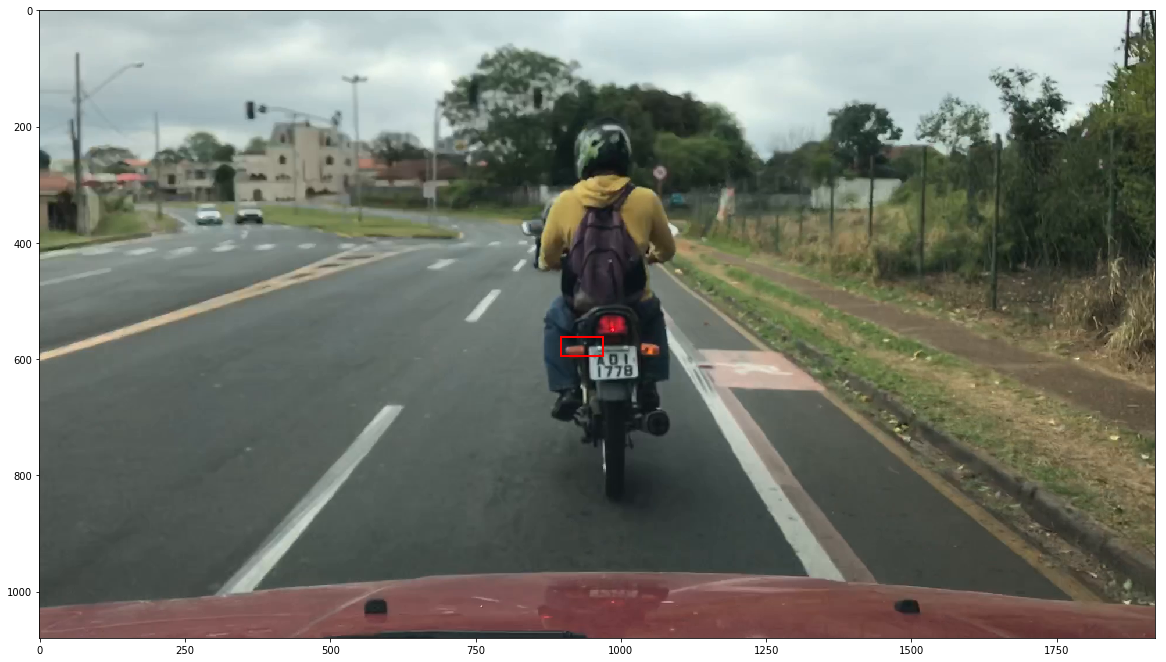

In [50]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
im = np.array(Image.open('C:/Users/kshruth/Documents/automated parking/UFPR-ALPR dataset/training/track0055/track0055[01].png'), dtype=np.uint8)
# Create figure and axes
fig,ax = plt.subplots(1,figsize=(20,20))
# Display the image
ax.imshow(im)
# Create a Rectangle patch
rect = patches.Rectangle((897.12946, 561.20465),72.30982, 32.975845,linewidth=2,edgecolor='r',facecolor='none')
#rect1 = patches.Rectangle((946, 576), 85, 60 ,linewidth=2,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)
#ax.add_patch(rect1)

plt.show()